<img src = "https://drive.google.com/uc?export=view&id=1qwLiiRwLcW04FUsVd7cC1vZ0MDjG3m2D" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento del Negocio y Carga de Datos**
---


## **1. Marco de Proyecto**
---

El presente proyecto tiene como objetivo principal construir un modelo CNN que clasificara si un paciente tiene un tumor cerebral o no basándose en una resonancia magnética. Para lograr esto, se utilizarán conjuntos de datos de imagenes de resonancias magneticas adecuadas para entrenar, validar y probar un modelo CNN que pueda clasificar las imagenes de los pacientes. Se utilizara la arquitectura y los pesos del modelo VGG-16 para entrenar el modelo para este problema binario.

El lenguaje de programación Python se empleará como base para el desarrollo del modelo de CNN debido a su amplia gama de bibliotecas y herramientas especializadas en este ámbito. Se aprovecharán las capacidades que ofrece Tensorflow y Keras asi como su entorno de herramientas.

Se seguirá la metodología **CRISP-DM** *(Cross-Industry Standard Process for Data Mining)* para la ciencia de datos:

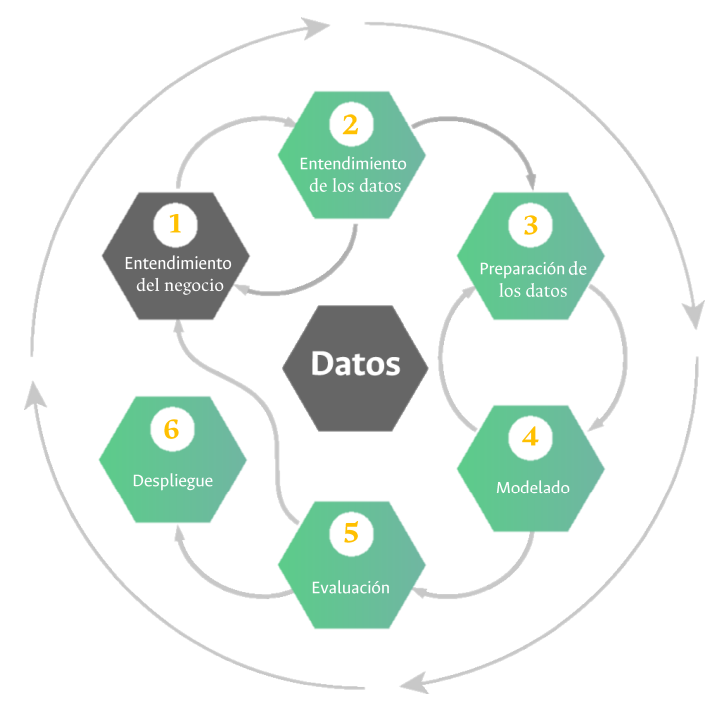

### **1.1. Trasfondo del Negocio**
---

Un tumor cerebral ocurre cuando se forman células anormales dentro del cerebro. Hay dos tipos principales de tumores: tumores cancerosos (malignos) y tumores benignos. Los tumores cancerosos se pueden dividir en tumores primarios, que comienzan dentro del cerebro, y tumores secundarios, que se han diseminado desde otros lugares, conocidos como tumores de metástasis cerebral. Todos los tipos de tumores cerebrales pueden producir síntomas que varían según la parte del cerebro involucrada. Estos síntomas pueden incluir dolores de cabeza, convulsiones, problemas de visión, vómitos y cambios mentales. El dolor de cabeza suele empeorar por la mañana y desaparece con los vómitos. Otros síntomas pueden incluir dificultad para caminar, hablar o con las sensaciones. A medida que avanza la enfermedad, puede producirse pérdida del conocimiento.

### **1.2. Alcance**
---

Se utilizara una solución basada en redes neuronales convolucionales para visión por computador, buscando clasificar de manera correcta las imagenes de resonancia magnetica de los pacientes, evaluando el modelo con varias capas de neuronas y segun varias metricas de desempeño, usando transfer learning y fine tunning utilizando la arquitectura y los pesos del modelo VGG-16 para entrenar el modelo para este problema binario.

### **1.3. Plan**
---

El plan estimado para la ejecución del proyecto es desde el 02 de Octubre al 27 de Octubre del 2.023, contemplando 25 dias de trabajo en los cuales las actividades estaran distribuidas equitativamente para su ejecución segun la metodología CRISP-DM.

## **2. Datos**
---


### **2.1. Origen**
---

Se utiliza un conjunto de datos de imagenes tomado de [*kaggle* - Brain MRI Images for Brain Tumor Detection](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection), el cual se descarga directamente desde la pagina en un archivo .zip llamado *brain_tumor_dataset.zip* hacia el sistema local, este conjunto de datos se compone de dos directorios nombrados segun las etiquetas de clasificación *yes/no*, en total son 253 archivos de imagenes, de las cuales 245 son formato .jpg, 2 son .png y 6 son .jpeg. La distribución de las imagenes por etiquetas las veremos mas adelante.

### **2.2. Carga o Adquisición de Datos**
---

Para la carga de los datos, se utiliza la biblioteca google.colab para cargar archivos desde el sistema local al entorno de trabajo en Google Colab como se muestra a continuación:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


Las imagenes se alojan comprimidas en un archivo .zip llamado *brain_tumor_dataset.zip* en el sistema local, se cargó el archivo .zip en Google Colab, a continuación se descomprime y coloca su contenido en el directorio actual */content* para poder trabajar con los archivos e imagenes que contiene:

In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['brain_tumor_dataset.zip']),'r')
data.extractall()

A continuación una imagen de como se ve el contenido de la carpeta descomprimida en Google Colab:

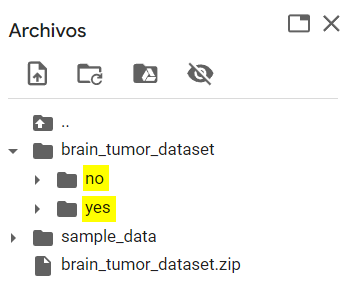

Se importan demas librerias requeridas como *cv2* que es la libreria OpenCV (Open Source Computer Vision Library) en Python, la cual es ampliamente utilizada para tareas de procesamiento de imágenes y visión por computadora, como la carga, manipulación y análisis de imágenes, detección de objetos, seguimiento de movimiento y más. *os* que proporciona funciones para interactuar con el sistema operativo, como manipular directorios y archivos. *shutil* que se utiliza para realizar operaciones de alto nivel en archivos y directorios, como copiar, mover, renombrar y eliminar archivos o directorios. *tqdm* que es una librería de Python que proporciona una barra de progreso (progress bar) y otros indicadores visuales para mostrar el progreso de bucles iterativos, como ciclos for o while, especialmente cuando se trabaja con tareas que pueden llevar tiempo, como procesamiento de datos extenso, bucles largos, descargas de archivos, entre otros. Y las demas que se utilizaron en modulos pasados:

In [3]:
import cv2
import os
import shutil
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 123

Se importa la función *clear_output* que se utiliza para borrar la salida actual en una celda del notebook, incluyendo cualquier resultado, gráfico o texto que se haya generado previamente en esa celda. Adicional la libreria *imutils* que proporciona utilidades útiles para trabajar con imágenes en Python, como redimensionar imágenes, rotarlas y realizar otras operaciones comunes:

In [4]:
from IPython.display import clear_output
!pip install imutils
clear_output()
import imutils

Se define la siguiente función para validar la cantidad de imagenes por cada etiqueta de clasificación del archivo *brain_tumor_dataset.zip* extraido:

In [5]:
#Función para validar cantidad de imagenes por cada etiqueta de clasificación
def count_images_in_tags(img_path):
  result = ""
  for tag in os.listdir(img_path):
    if not tag.startswith('.'):
      img_number = len(os.listdir(img_path + tag))
      result += f"La etiqueta {tag} tiene {img_number} imagenes cargadas\n"
  return result

In [6]:
img_path = '/content/brain_tumor_dataset/'
result_text = count_images_in_tags(img_path)
print(result_text)

La etiqueta no tiene 98 imagenes cargadas
La etiqueta yes tiene 155 imagenes cargadas



Se busca particionar de una vez el conjunto de datos de imagenes, con lo cual se crean nuevos directorios para train/val/test con etiquetas de clasificación incluidas y se visualizan con ayuda del paquete *tree* el cual es una utilidad de línea de comandos que muestra la estructura de directorios de manera jerárquica en forma de árbol.:

In [7]:
!apt-get install tree
clear_output()
#Crear nuevos directorios para train/val/test con etiquetas de clasificación incluidas
!mkdir Train Test Val Train/Yes Train/No Test/Yes Test/No Val/Yes Val/No
!tree -d

.
├── brain_tumor_dataset
│   ├── no
│   └── yes
├── sample_data
├── Test
│   ├── No
│   └── Yes
├── Train
│   ├── No
│   └── Yes
└── Val
    ├── No
    └── Yes

13 directories


Asi se visualiza en Google Colab:

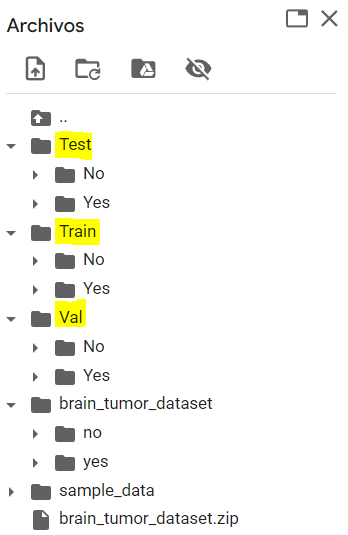

Se toma el conjunto de datos de imágenes de resonancia magnética cerebral, se divide en tres conjuntos: entrenamiento (80% de las imágenes), validación (15% de las imágenes) y prueba (5% de las imágenes), y se organizan las imágenes en los directorios previamente creados separados según su clasificación de etiqueta Yes/No:

In [8]:
#Dividir los datos en train/val/test
for tag in os.listdir(img_path):
  if not tag.startswith('.'):
        img_number = len(os.listdir(img_path + tag))
        for (n, file_name) in enumerate(os.listdir(img_path + tag)):
            img = img_path + tag + '/' + file_name
            if n < 5:
                shutil.copy(img, 'Test/' + tag.capitalize() + '/' + file_name)
            elif n < 0.8*img_number:
                shutil.copy(img, 'Train/'+ tag.capitalize() + '/' + file_name)
            else:
                shutil.copy(img, 'Val/'+ tag.capitalize() + '/' + file_name)

Asi se visualiza en Google Colab que ya se encuentran particionados los conjuntos de imagenes:

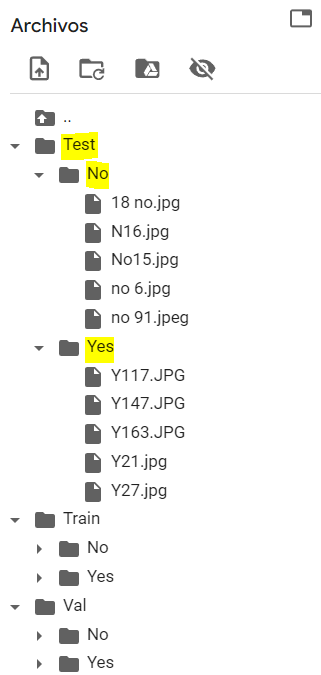

Se valida por cada directorio train/val/test con etiquetas de clasificación incluidas su distribución:

In [9]:
img_path = '/content/Train/'
result_text = count_images_in_tags(img_path)
print(result_text)

La etiqueta No tiene 74 imagenes cargadas
La etiqueta Yes tiene 119 imagenes cargadas



In [10]:
img_path = '/content/Val/'
result_text = count_images_in_tags(img_path)
print(result_text)

La etiqueta No tiene 19 imagenes cargadas
La etiqueta Yes tiene 31 imagenes cargadas



In [11]:
img_path = '/content/Test/'
result_text = count_images_in_tags(img_path)
print(result_text)

La etiqueta No tiene 5 imagenes cargadas
La etiqueta Yes tiene 5 imagenes cargadas



A continuación se validan ejemplos de tamaños y de visualización para una imagen con etiqueta *no* y otra con *yes*:

In [13]:
from numpy.core.fromnumeric import shape
img_no = cv2.imread('/content/Test/No/10 no.jpg')
print(len(img_no))
print(shape(img_no))
print(img_no)

201
(201, 173, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


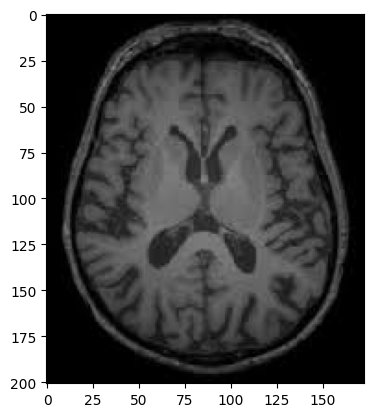

In [14]:
plt.figure()
plt.imshow(np.squeeze(img_no))
plt.grid(False)
plt.show()

In [17]:
img_yes = cv2.imread('/content/Test/Yes/Y252.jpg')
print(len(img_yes))
print(shape(img_yes))
print(img_yes)

256
(256, 197, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


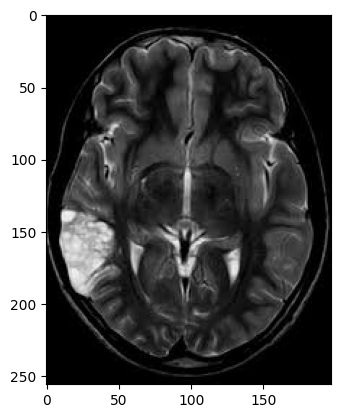

In [18]:
plt.figure()
plt.imshow(np.squeeze(img_yes))
plt.grid(False)
plt.show()

<img src = "https://drive.google.com/uc?export=view&id=1sxzZUMO3YZmqYi0xR6vSxG9hZZYrLJIQ" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y Preparación de los Datos**
---

## **1. Análisis Exploratorio de los Datos**
---

### **1.1. Resumen General**
---

Segun lo observado en el capitulo *2.2. Carga o Adquisición de Datos* con las imagenes de ejemplo visualizadas con etiquetas no y yes, se identifica que las imagenes no tienen la misma dimensión en pixeles en ancho y alto, con lo cual para realizar un análisis exploratorio inicial de los datos, primero se define la función *load_data* que permitira cargar las imágenes redimensionadas a 224x224 y las etiquetas como np.arrays en un formato útil para explorar las clases en cada conjunto, entrenar y evaluar los modelos en los siguientes capitulos:

In [19]:
def load_data(dir_path, img_size=(100,100)):
    """
    Función para cargar imágenes redimensionadas como np.arrays
    """
    #Inicializar listas X y y para almacenar imágenes y etiquetas
    X = []
    y = []

    #Inicializar un contador i para llevar un registro de las etiquetas
    i = 0

    #Inicializar un diccionario labels que se utilizará para mapear índices a etiquetas
    labels = dict()

    #Iterar a través de los archivos y subdirectorios en el directorio especificado por dir_path.
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels


In [20]:
train_dir = '/content/Train/'
test_dir = '/content/Test/'
val_dir = '/content/Val/'
img_size = (224,224)

#Se usa la función load_data para cargar imágenes redimensionadas y etiquetas como np.arrays en conjuntos de train/val/test
X_train, y_train, labels = load_data(train_dir, img_size)
X_test, y_test, _ = load_data(test_dir, img_size)
X_val, y_val, _ = load_data(val_dir, img_size)

100%|██████████| 2/2 [00:00<00:00,  4.85it/s]
<ipython-input-19-062c417a3ee3>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


193 images loaded from /content/Train/ directory.


100%|██████████| 2/2 [00:00<00:00, 105.47it/s]


10 images loaded from /content/Test/ directory.


100%|██████████| 2/2 [00:00<00:00, 19.51it/s]

50 images loaded from /content/Val/ directory.


Se observan en total 193 imagenes cargadas para conjunto de entrenamiento, 50 imagenes cargadas para validación y 10 imagenes cargadas para pruebas. Adicional se valida la distribución de clases entre cada conjunto, para esto se define la función *calculate_class_distribution*, la cual guarda en forma de diccionario la distribución de las clases:

In [21]:
def calculate_class_distribution(y):
    # Calcular la distribución de clases en un conjunto de etiquetas (y)
    unique_classes, class_counts = np.unique(y, return_counts=True)
    class_distribution = dict(zip(unique_classes, class_counts))
    return class_distribution

# Calcular la distribución de clases en cada conjunto
train_class_distribution = calculate_class_distribution(y_train)
test_class_distribution = calculate_class_distribution(y_test)
val_class_distribution = calculate_class_distribution(y_val)

# Imprimir la distribución de clases en cada conjunto
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_distribution)

print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_distribution)

print("\nDistribución de clases en el conjunto de validación:")
print(val_class_distribution)


Distribución de clases en el conjunto de entrenamiento:
{0: 74, 1: 119}

Distribución de clases en el conjunto de prueba:
{0: 5, 1: 5}

Distribución de clases en el conjunto de validación:
{0: 19, 1: 31}


Se observa la distribución para cada conjunto de clases, adicional se valida el tamaño del conjunto de datos en MB, para esto se construye la función *calculate_total_size_in_mb* que calcula el tamaño total en MB de todos los archivos de fotos en el directorio y sub folders:

In [22]:
def calculate_total_size_in_mb(directory_path):
    """
    Calcula el tamaño total en MB de todas las fotos en un directorio
    """
    total_size_bytes = 0

    #Iterar a través de los archivos y subdirectorios en el directorio especificado por directory_path.
    for path in os.listdir(directory_path):
        if not path.startswith('.'):
            # Iterar sobre los archivos y calcular el tamaño total
            for file_name in os.listdir(directory_path + path):
                # Verificar si es una imagen según el formato de las imagenes
                if not file_name.startswith('.') and file_name.endswith('.jpg') or file_name.endswith('.png') or file_name.endswith('.jpeg'):
                    file_path = os.path.join(os.path.join(directory_path, path), file_name)
                    file_size_bytes = os.path.getsize(file_path)
                    total_size_bytes += file_size_bytes

    # Calcular el tamaño en MB
    total_size_mb = total_size_bytes / (1024 * 1024)

    return total_size_mb

directory_path = '/content/brain_tumor_dataset/'

# Calcular el tamaño total en MB
total_size_mb = calculate_total_size_in_mb(directory_path)
print(f"El tamaño total de todas las imagenes en el directorio es de {total_size_mb:.2f} MB")


El tamaño total de todas las imagenes en el directorio es de 6.73 MB


Se observa que el tamaño total de todas las imagenes en el directorio es de 6.73 MB.


Se explora como es la visualización de las imagenes por cada clase, para esto se construye la función *plot_samples*, donde se crea una gridplot para ver ejemplos de varias imágenes por cada clase:

In [23]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Crear una gridplot para varias imágenes por cada clase
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

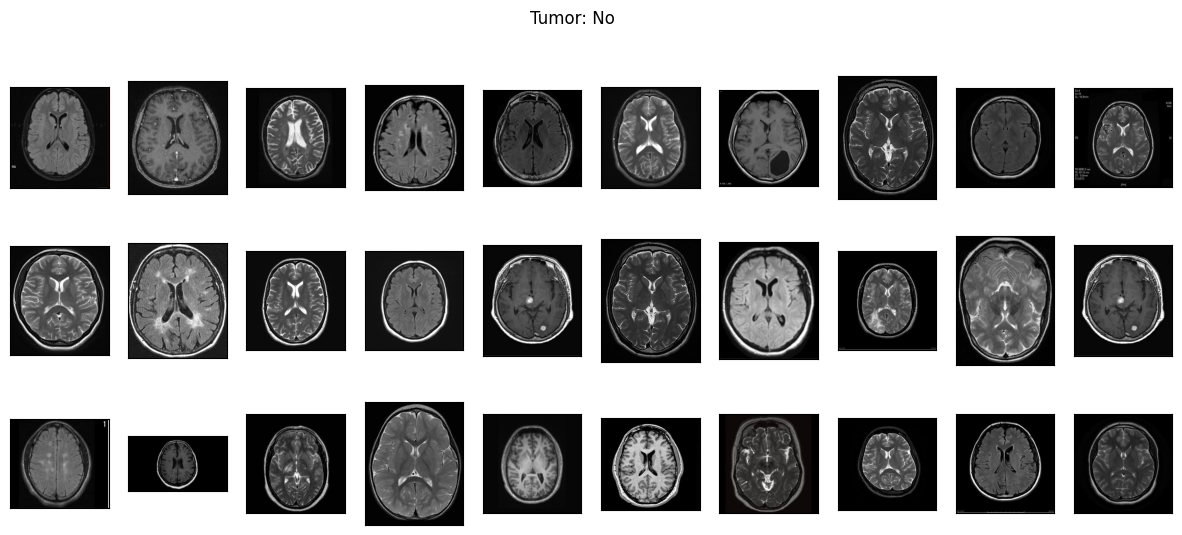

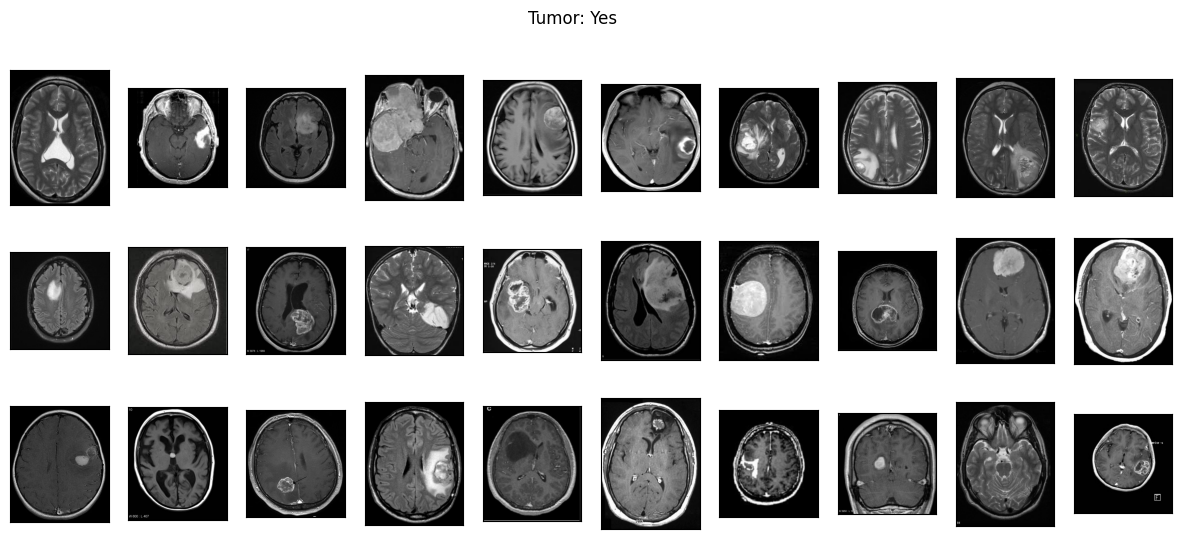

In [24]:
plot_samples(X_train, y_train, labels, 30)

En resumen a simple vista se logra evidenciar que las imagenes en clase *Yes* si evidencian diferencia visual de las imagenes en clase *No* presentando alguna forma distintiva de tumor cerebral en la  resonancia magnética, adicional se puede evidenciar que las imágenes tienen diferente ancho y alto y diferentes tamaños de "esquinas negras" las cuales se deberan corregir en la limpieza de datos previo iniciar el modelamiento.

### **1.2. Resumen de la Calidad de los datos**
---

Para observar si en el conjunto de imagenes para clasificación de si existe o no un tumor cerebral, hay datos faltantes, imagenes de mala calidad o mezcla de formatos, se crea la función *analyze_images* que permite evaluar esto en el conjunto de datos:

In [25]:
def analyze_images(directory_path):
    missing_data = 0
    poor_quality = 0
    mixed_formats = False

    for subdirectory in os.listdir(directory_path):
        if not subdirectory.startswith('.'):
            subdirectory_path = os.path.join(directory_path, subdirectory)

            for file_name in os.listdir(subdirectory_path):
                if not file_name.startswith('.'):
                    file_path = os.path.join(subdirectory_path, file_name)

                    # Verificar si el archivo es una imagen según el formato
                    if not (file_name.endswith('.jpg') or file_name.endswith('.png') or file_name.endswith('.jpeg')):
                        mixed_formats = True

                    # Verificar si el archivo tiene un tamaño inusualmente pequeño (posible imagen de mala calidad)
                    file_size = os.path.getsize(file_path)
                    if file_size < 1024:  # Se establece el umbral
                        poor_quality += 1

                    # Verificar si el archivo no se puede abrir con OpenCV (datos faltantes)
                    try:
                        img = cv2.imread(file_path)
                        if img is None:
                            missing_data += 1
                    except Exception as e:
                        missing_data += 1

    return {
        "missing_data": missing_data,
        "poor_quality": poor_quality,
        "mixed_formats": mixed_formats
    }

directory_path = '/content/brain_tumor_dataset/'

result = analyze_images(directory_path)
print("Datos faltantes:", result["missing_data"])
print("Imágenes de mala calidad:", result["poor_quality"])
print("Mezcla de formatos:", result["mixed_formats"])


Datos faltantes: 0
Imágenes de mala calidad: 0
Mezcla de formatos: True


Se puede observar que sobre el conjunto de datos no hay datos faltantes, ni imagenes de mala calidad, pero si hay mezcla de formatos, con lo cual se define la función *count_image_formats* que permite contar cuantas imagenes hay por cada formato de imagen encontrado:

In [26]:
def count_image_formats(directory_path):
    format_counts = {}  # Un diccionario para almacenar el recuento de formatos

    for subdirectory in os.listdir(directory_path):
        if not subdirectory.startswith('.'):
            subdirectory_path = os.path.join(directory_path, subdirectory)

            for file_name in os.listdir(subdirectory_path):
                if not file_name.startswith('.'):
                    file_path = os.path.join(subdirectory_path, file_name)
                    _, file_extension = os.path.splitext(file_name)

                    # Verificar si el archivo es una imagen según las extensiones
                    if file_extension.lower() in ['.jpg', '.jpeg', '.png']:
                        if file_extension in format_counts:
                            format_counts[file_extension] += 1
                        else:
                            format_counts[file_extension] = 1

    return format_counts

directory_path = '/content/brain_tumor_dataset/'

# Obtener el recuento de formatos de imágenes
format_counts = count_image_formats(directory_path)

# Mostrar el recuento de formatos
for format, count in format_counts.items():
    print(f"Formato {format}: {count} imágenes")


Formato .jpg: 171 imágenes
Formato .JPG: 74 imágenes
Formato .jpeg: 6 imágenes
Formato .png: 2 imágenes


Como ya se habia mencionado en un inicio, en total son 253 archivos de imagenes, de las cuales 245 son formato .jpg, 2 son .png y 6 son .jpeg.

### **1.3. Tipos de variables**
---

Para este conjunto de imagenes se tiene como variable objetivo a estimar la clasificación de si es o no una imagen con tumor, es una clasificación binaria donde la clase es *Yes/No*, a continuación se visualizaran las clases por cada conjunto train/val/test para observar mejor la distribución de las mismas y validar si hay desbalanceo de datos entre clases, para esto se crea la función *plot_combined_class_distribution* como se vera a continuación:

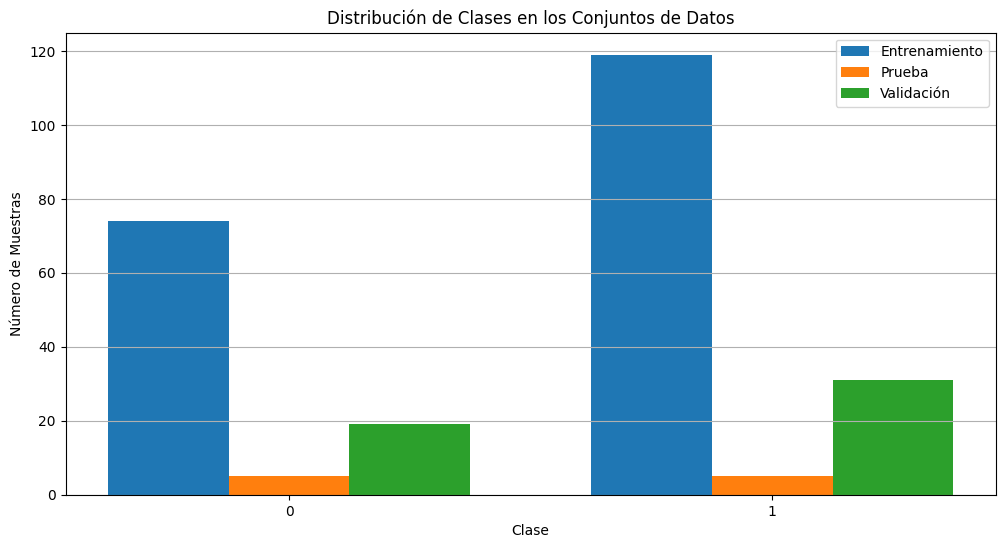

In [27]:
import matplotlib.pyplot as plt

def plot_combined_class_distribution(train_dist, test_dist, val_dist):
    # Unir las distribuciones de clases en un solo diccionario
    combined_dist = {}
    for key in set(train_dist.keys()) | set(test_dist.keys()) | set(val_dist.keys()):
        combined_dist[key] = {
            'Entrenamiento': train_dist.get(key, 0),
            'Prueba': test_dist.get(key, 0),
            'Validación': val_dist.get(key, 0)
        }

    # Crear una gráfica de barras para mostrar la distribución de clases combinada
    plt.figure(figsize=(12, 6))
    classes = list(combined_dist.keys())
    width = 0.25
    x = np.arange(len(classes))

    for i, dataset in enumerate(['Entrenamiento', 'Prueba', 'Validación']):
        counts = [combined_dist[key][dataset] for key in classes]
        plt.bar(x + i * width, counts, width, label=dataset)

    plt.title('Distribución de Clases en los Conjuntos de Datos')
    plt.xlabel('Clase')
    plt.ylabel('Número de Muestras')
    plt.xticks(x + width, classes)
    plt.legend()
    plt.grid(axis='y')
    plt.show()

# Mostrar una gráfica de barras combinada de los conjuntos de datos
plot_combined_class_distribution(train_class_distribution, test_class_distribution, val_class_distribution)


En la grafica de barras se observa que en conjunto de prueba las clases estan balanceadas con 5 imagenes cada una, en cambio en entrenamiento y validación las clases estan desbalanceadas teniendo la clase 0 **No** menor cantidad de imagenes que la clase 1 **Yes**, en entrenamiento con 74 imagenes cargadas de la etiqueta No y 119 imagenes cargadas de la etiqueta Yes y en validación con 19 imagenes cargadas de la etiqueta No y 31 imagenes cargadas de la etiqueta Yes. En total son 253 archivos de imagenes, se observan en total 193 imagenes cargadas para conjunto de entrenamiento, 50 imagenes cargadas para validación y 10 imagenes cargadas para pruebas.

## **2. Limpieza de los Datos**
---

Como se pudo observar en el analisis exploratorio de los datos en el capitulo *1.1. Resumen General*, las imágenes tienen diferente ancho y alto y diferentes tamaños de "esquinas negras". Para modelos de CNN es mejor trabajar con las imagenes preprocesadas con el mismo tamaño en ancho y alto por ejemplo (224,224), con lo cual se valida que para las imagenes de este conjunto como se observa en el siguiente histograma de distribuciones de proporciones (relación = ancho/alto) no estan normalizadas:

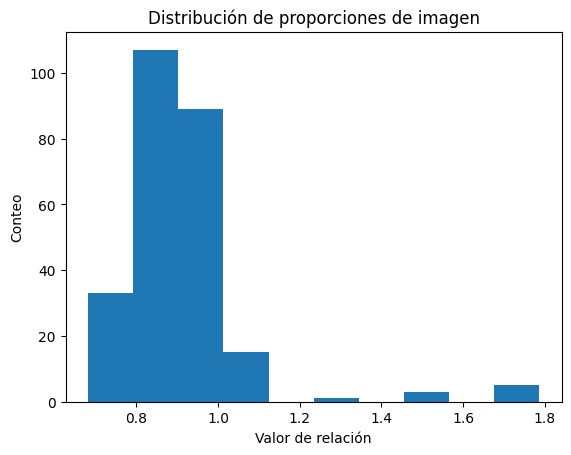

In [28]:
RATIO_LIST = []
for set in (X_train, X_test, X_val):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])

plt.hist(RATIO_LIST)
plt.title('Distribución de proporciones de imagen')
plt.xlabel('Valor de relación')
plt.ylabel('Conteo')
plt.show()

Para realizar este preprocesamiento, se tomo como guia la explicación del notebook tomado de kaggle [*kaggle* - Brain Tumor Detection v1.0 || CNN, VGG-16](https://www.kaggle.com/code/ruslankl/brain-tumor-detection-v1-0-cnn-vgg-16/notebook), donde el primer paso de la "normalización" sería eliminar el cerebro de las imágenes, a su vez utilizaron una técnica que se describió perfectamente en el blog [pyimagesearch](https://pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/):

In [29]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Encuentra los puntos extremos de la imagen y recorta el rectángulo de ellos.
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # umbral de la imagen, luego realizar una serie de erosiones +
        # dilataciones para eliminar cualquier pequeña región de ruido
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # busque contornos en una imagen con umbral, luego tome el más grande
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # encontrar los puntos extremos
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

Veamos un ejemplo de lo que hará esta función con las exploraciones por resonancia magnética:

In [30]:
img = cv2.imread('/content/brain_tumor_dataset/yes/Y108.jpg')
img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# umbral de la imagen, luego realizar una serie de erosiones +
# dilataciones para eliminar cualquier pequeña región de ruido
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# busque contornos en una imagen con umbral, luego tome el más grande
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# encontrar los puntos extremos
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# agregar contorno en la imagen
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# agregar puntos extremos
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# cortar
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

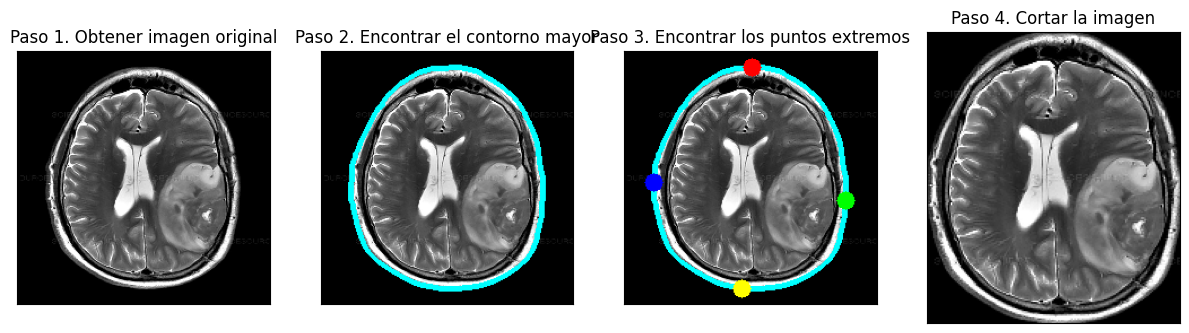

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Paso 1. Obtener imagen original')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Paso 2. Encontrar el contorno mayor')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Paso 3. Encontrar los puntos extremos')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Paso 4. Cortar la imagen')
plt.show()

In [32]:
#Aplicar la función para cada conjunto
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

<ipython-input-29-0e3820b18a6e>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(set_new)


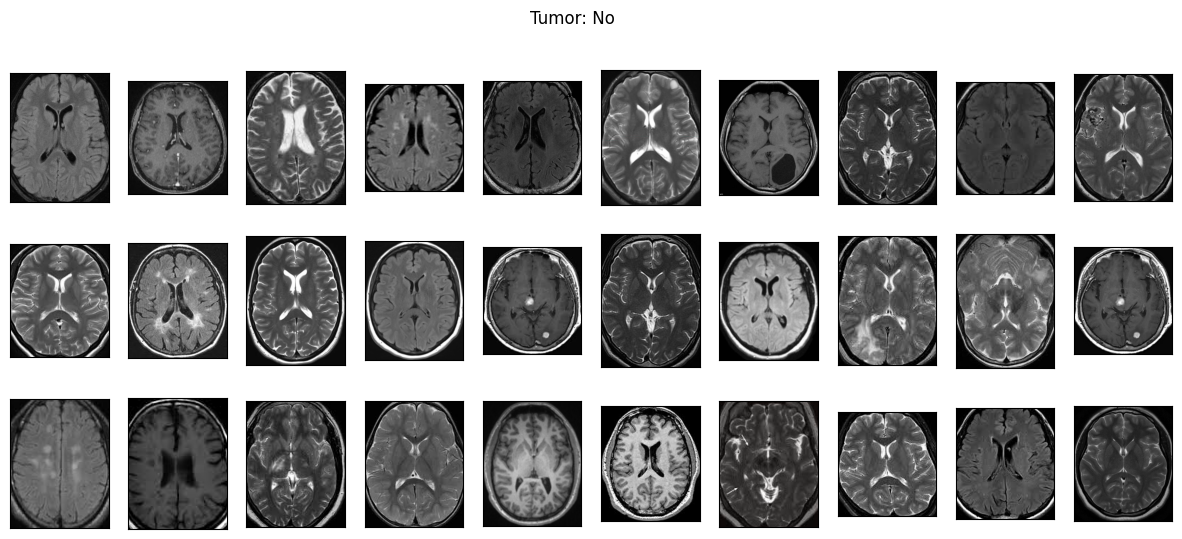

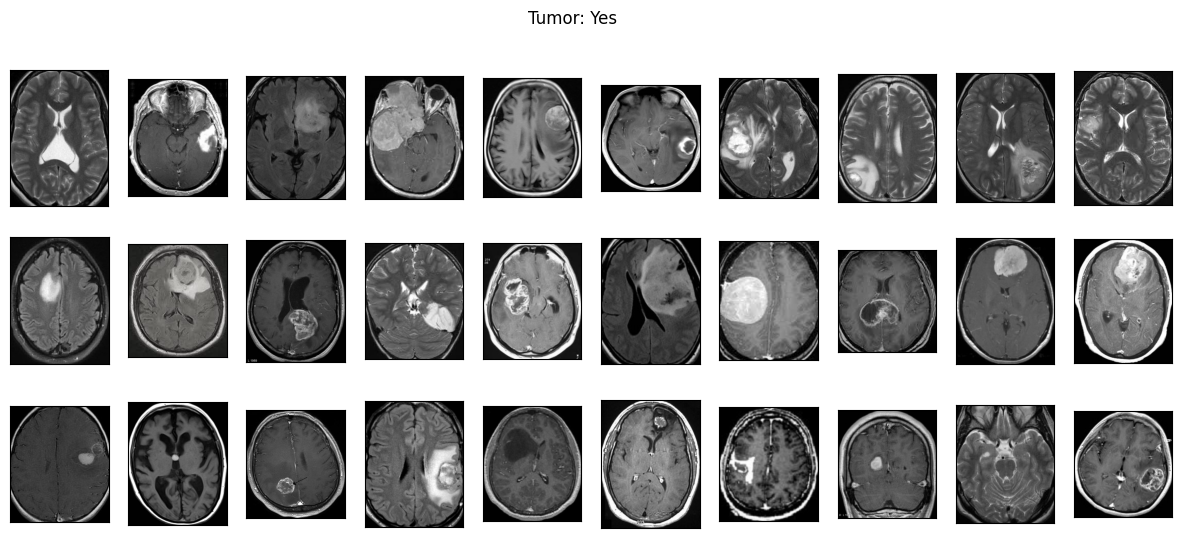

In [33]:
plot_samples(X_train_crop, y_train, labels, 30)

Luego las imagenes debidamente procesadas se guardan de nuevo en nuevos folders, con ayuda de la función definida *save_new_images*:

In [34]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [35]:
# saving new images to the folder
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

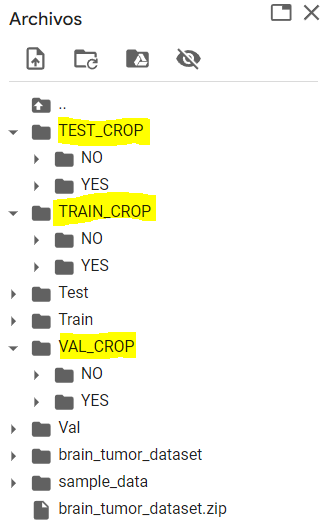

El siguiente paso sería cambiar el tamaño de las imágenes a (224,224) y aplicar el preprocesamiento necesario para la entrada del modelo VGG-16:

In [36]:
from keras.applications.vgg16 import VGG16, preprocess_input
def preprocess_imgs(set_name, img_size):
    """
    Cambiar el tamaño y aplicar el preprocesamiento VGG-15
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [37]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=img_size)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=img_size)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=img_size)

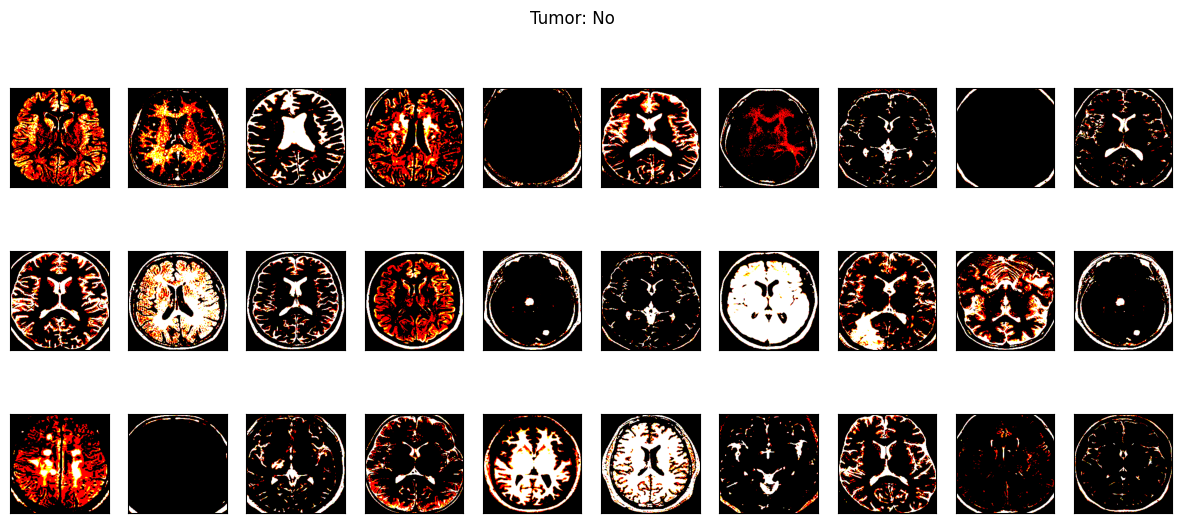

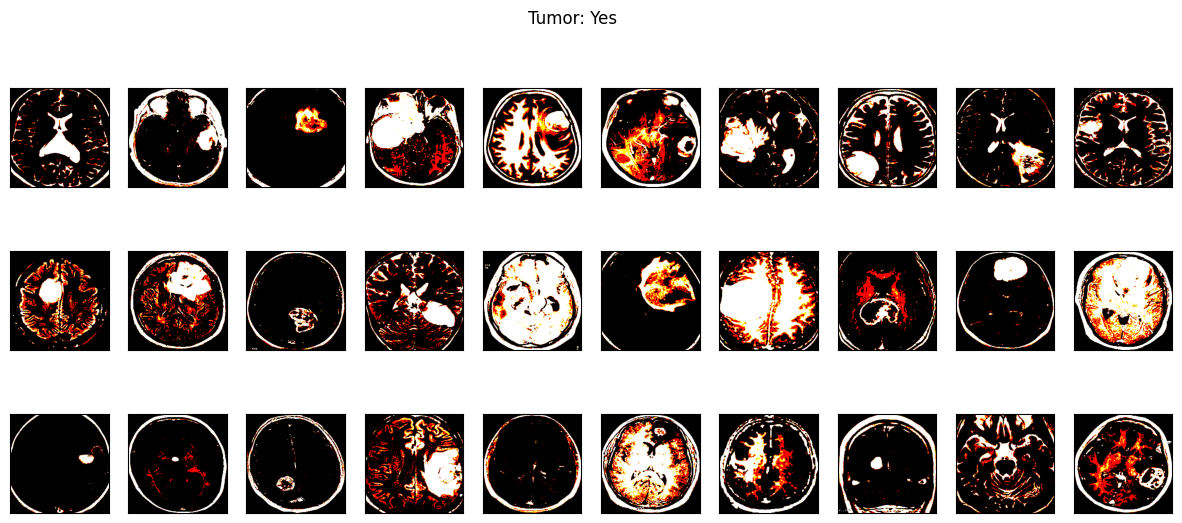

In [38]:
plot_samples(X_train_prep, y_train, labels, 30)

<img src = "https://drive.google.com/uc?export=view&id=1XCFjEoG1OLaFbuntEH_PC7vtsII9wNfh" alt = "Encabezado MLDS" width = "100%">  </img>

# **Diseño e implementación experimental**
---


## **1. Particion del conjunto de datos**
---

Como se observo desde capitulos anteriores ya se realizo la partición del conjunto de datos en train/val/test, quedando en nuevos folders llamados *TRAIN_CROP / TEST_CROP / VAL_CROP* despues del preprocesamiento realizado para la entrada del modelo VGG-16.

## **2. Selección y diseño de modelos**
---


Para resolver este problema de vision por computador se utilizara la arquitectura y los pesos del modelo VGG-16 para entrenar el modelo para resolver este problema de clasificación binaria. Se utilizaran las técnicas de **_Transfer Learning_** y **_Fine Tuning_**, las cuales son técnicas comúnmente usadas para entrenar redes neuronales de forma más rápida y con resultados más precisos, basándose en modelos previamente construidos y entrenados en tareas similares.  El modelo VGG-16 utiliza una arquitectura de redes convolucionales muy profundas para el reconocimiento de imágenes a gran escala, se usa para casos de uso de clasificación de imágenes, asi como para casos de uso de **_Transfer Learning_** y **_Fine Tuning_**.

Adicional se debe tener en cuenta que el tamaño de entrada predeterminado para este modelo es 224x224. Cada aplicación Keras espera un tipo específico de preprocesamiento de entrada. Para VGG16, como se observo en el capitulo pasado *2. Limpieza de los datos* se llamo a *tf.keras.applications.vgg16.preprocess_input* en sus entradas antes de pasarlas al modelo. *vgg16.preprocess_input* convierte las imágenes de entrada de RGB a BGR, luego centra en cero cada canal de color con respecto al conjunto de datos de ImageNet, sin escalar, fuente [Keras: vgg16-function](https://keras.io/api/applications/vgg/#vgg16-function).

A continuación, un ejemplo de la arquitectura del modelo VGG-16 que se espera replicar en el proyecto usando las técnicas de **_Transfer Learning_** y **_Fine Tuning_**:

![VGG16-model.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAA1IAAAGICAMAAAB8wiFVAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAMAUExURf///7y3sb25sbu2r/v8/P///cK/uP39/f/9/QAAAImJiVtbW7i0rr+7tOzr6/r6+bKvqL25s2JiYre3t7m3sLm1rElJScG8tbezrMC9tNzc3P3//7Wxqbu7u7+6sru4s/Hw8LWyrMG+twYGBrGtpj08PBMTE7+8t5SUk7m1r8TBubm5uff490VERE1MS3FxccXCvdPT08O+tr27tgwMDMHBwbayrLOzs3V1dea4mHh4eGloZ8O/uiQkJP349Kysq+7OuMPAu/P08+rq6f76+ZGQkHt7eygoKMjEvNeMV2pra42NjaOjo8FNAV9eXZiYmDAwMK+rpMzLyeXl5O3u7GVlZdfX1oWEhMbBu1VVVeDg4PTg0M7OzK2poqmpqYGBgcXEw/PaytmRX8jEvr27s9uab6mno1BQUBkZGcbCufzz7rGwrduZasdcF725tduWZtnZ2eSwjv/9+/X19fbn3OnBp1lYWP39/x4eHkFBQKWlpb+/v8vHv56ak9WGT8HStb69u5ycnM3Kw8RUCtvl1a7S7MLe8Zaygi0tLefo6EOS0Pjp3/f39TMzM5SQiH9+fIyLid/t+MljHrizqLSzseKqhKainPnt5O3KsuGmfgBguUJ2Ijc2NliFOqCfni6Fyfbk192cb8nFwMxrK8zLwHNuaFWg1m2WU8/Pz1hUUKimnMfHx8BJAFFTUf8xMYyIgem/odF7Qjw5OIiocqKfmWpkXiKDyTiPzm5ubur0++7ErPL5/AVxwc9zNv9XV7m4tGut2/HUwfv+/1CAMeXr4P/s64m944iDe9fTyf9vb/8bG/+IiF2KQPTVxxF3xP/Kys/k89Dcx8nHv6PM6X13cf9ERMDCtP8AAP/g4JbE5ni13/rb1bjY7tzGsr/a7sC5tf9jY/8PD/X48wBlvLvIr1lLQv+1tf+WlhV7xuDd1N+jeHugY6vCnIG44KK7kv+mpqW+lT0uJP+env+uru2Zfd+hdq/FoTeErhx4xTccETlvFp5gOZc/Cf+rq6/Fn4G13/oy1EQAACAASURBVHgB7P0LVFPn3i8KP5kJCYFEEkxIYtIEYiAkcomBBpVQBStEVCAigtR4gwpIxVvLRcGNuNuNbRUriu3aHmu99AjU1+qGtezFz9rv+6rjnL3W6La+7tN+ay3O3ut0fH37jXXGWWOcjrH2ZYz9/Z45ExJuISh2eZmPLZmXZ97+8/nN//O/E8I3ngI8BXgK8BTgKcBTgKcATwGeAjwFeArwFOApwFOApwBPAZ4CPAV4CvAU4CnAU4CnAE8BngI8BXgK8BTgKcBTgKcATwGeAjwFeArwFOApwFOApwBPAZ4CPAV4CvAU4CnAU4CnAE8BngI8BXgK8BTgKcBTgKcATwGeAjwFeArwFOApwFOApwBPAZ4CPAV4CvAU4CnAU4CnAE8BngI8BXgK8BTgKcBTgKcATwGeAjwFIqWARCRCV/yVsEdIuJ/Qo/37uI7oOrEHPZ7d6j9J6NH8Mk+B548CfozQn0nxMrqZ7ejvPYZMIWcYs51f4SnwD6cAxjQd1vjcc6N74hiXgKtwu6fqETx6+seRDG4axPXSDuxfSHBNsn43/vgxxJ5fQnYvzSnAlo2bDlB+RuZcZs/K7eSwJCFHctbRGx6cwx7NduD/8BR4QiiQxg5cSRp7OxxqAmyCG8AkLo7dl8au+reNRaCIO3q6J8KxGcVbjhaS5UdjcvL2ExGRtFYS9uy4MHttEdl8ZjC+LY1c2TDYVoEJHolN9sMmgHqsHloE1InIbukg/vKNp8CTQwEJ2XijsvksIfszezaAbYhIzCL/IMXwp+iRkDlLNucuiiODxTEbVrOcYUMcN8ZpD9qFSEoLl1SUcxuneTZR5RGyv4iUV4pIZh1JI6X1MYCUhFQO4ifnEL2DQwtIdf1CUrmezM3bR8iBo7HYLyGNpegxrweLIpK6gb25tMyULTykpqE4v/vXpYCI3FhEXkgplyQfIDeuY3hW15ewQ7y6HLM5yWUJNm1KJomtZ0n8IkljyhGAKKEojUIpcTed761PxGhffmYeyYiNcHDHkc0ZOCaOXCkkZMHm4iXs9ZbmXSYvnLmMHZhlksE8nDaOlF4nZF3u2SvYKiHV3aXkSDIL6jl56+PS0G3Voba5EV711yUrf7XnmQLr4sic+nnkiIicLQNGCuNjMcSBozNzCKkEf5CQfYmEtKWSOWlkd2s1Iak36rCBDvEXwELalmNRtE5CcpsjG9zgNGW7KV7mXgcyYxMBaUz8wITOLC3biF8gSkTSwa7iMDvcQkjP0i0Ugfiv/OihhFJcRESWtu6vrNtI5sWSowsiuypOyzeeAr8SBcA1NgA5ItJ2CHhJXZ1AB6mErCpLi0nnZngisqUbyoA4UthMyML4y8mJ2C8ha1sH13avxwLakdQSMLAI7lhCCtJzKFDXJ+8GXnJJ8421iTgujaRKG/WcVEVu9NAeorr9hLzQJjqbMTgP546D5HSDwg/SVt4REnNdn3GWdJ8djOCifBeeAr8iBUTkQDLUZiJSmEtIdTNJpRIOHbeHWusKWJRAmmo7QHvMTU8kpGJ9dVsBBjx2XS7r5vgK1AUJGyLSveG42NV0wrgugSoWVmwuPZO8CtcDQDMqk6vp9bD1BhAlIcWpAFDOktKS7p7dFGIFzZVtjeghIpUJhLxYVNATs6IVcmAkSP4VCcpf6jmngIQsTAangcRfh1FbmLG07mgxBjDGbWP9BjqwsRwHdgAUXG6bB+Gne/WiotxG7MfU72gRZR9oOL4kgVsMT0/IP8VkeeYRUpFKFi4iwEwFJ0ttPPoiKT2DWSQU4+nrJDELyKFYkrhkHi40t66FMsWCulVkYxGwjR5F60hMOr3q0RfQgW88BZ4cCkhIWsVlsnAeGcyVkBf3FcybU5lBVebgO8lpi9LpUJaQzWfJkUGyL34hWVgtKa9+IXk322N92cYDeSymRPtEpDSZHjVNw+XK6vPqu0Xz6vPysutInKigrQ28UEIyc8AcV0FUEpHi7KK87C2krT6vtfUIthbWQ2shIqsrsfwix8BW5B6Pr8bq+vpF0190mnvid/MUmE0KiEhP/aLcvLnk6PVFG85QU8/m63qWR0FgIjdYu9CWlIrM7kKS2boot/4F8JUXoc0ACMrPHCCkMZk1D51ZsDshNSJ+IUpMXLduH4nD30Q6wUybA/0IGgdedqkA+zC1LFhHf7BnzhwYfvGLa7Jsk3ZeXs0ehT7TwpgeyzeeAr8WBSRkac+SJZXL01b1LFl0CIN236EYSDTQHtApVwFkf0yzNhcuWTRINrEdsXVuzxbaYw6EIexMRA/RghWpg/h9hIYT0muFa2wPrgv+sgeE687v4ynwZFGADllu/E51X+N6hO88ehIwGvZA7mcyaEzfI3gUD6xRwvILTwoFRHFoYDT4ywr6IqygsWOVG7AS7PH3YPeF9vCjThTwK39Snoq/D54CzwcFEK8x2ihyx68/H1Tgn5KnwGxRYPzccPz6bF2HPw9PgeeDAlB6FC5asghtyaLCwrNQbixcElxfzQPs+RgG/FPOGgVgG46tPFtKW+rqHmk8gZNezCH/+mZp8TTakFm7D/5EPAWeEApIyllb0MPeDdTusfCG5Q6PK5EWkvLm1bCBocHgVCzdHJFd62Gvzh/HU+BJowBsu+cjizOc/M7hOBHbA+cItDhJ2gYpIHWlklsXSeIq6DrvWjQ56fitzyQFwGOspkeAFPTxi3JbWCYFjX2FNHZ+ZmUx5U+svr4H60t4SD2TI4d/qMkpgIjDfJsKMbYP2yRkRYXfsV1Clkibq1tTCvcFEJUqjS3PDkQTP+wV+ON4CjxFFIAfeI3pZNPDcykJ2RTvD6iSkFJp8vLEFAQy+gWp1dK2xDk8l3qKxgN/q49KAbj+OU66bdaHhpSEzG1mfdZpONRS6ZndZGk6XAnpfcFnMBtx9key+Ynfo74m/vinhgLQLHQlmdxND82l4F1bt5ATlRAhnJ23seXAlfXcOvLJpOQtJGQ5P/F7asYDf6OPToG4ru2yps7Gh4UUTLzp/rQrIrK+NXsB2Zh+IICo6u6UF7G8nOdSj/6e+DM8LRQQLVRsbxI3NdoebuIH9XsCwoLp04rIvCLpflKdgGB5ug49YsL8pdRHl+dSlB58ez4oEL3bZFG5TFbVUk5FN8OnhmojflVAE7E8WbqKJMauCKwXxEpTsUwhxctSMyQs3/2ppcA8WZJlkyLpluqhlOjQQSzZTEFDedK6DGkMEWVW+mNHiOiGFOjiIMUr0Z/aEcLf+EwogFmbwpdk226xNC699RATP+AlBqlqOUTBxFuMxLKFNBcMa+ItlGay6OK51EzeCd/3aaYATLzyvu0u1XbLyca+h4IUKc0dNelulpYUkBXFSIlJaUINVPH+fbws9TSPEv7eI6cAEOWx9G2XJW1far2VdOvdyI/09xSR/VfKOQQhiZI0Yzk5G0j4h7Rm868kBtDFy1Izpi1/wFNIAQg/+S6vxWuwNfpuNTZmzdghCXbcNr9BCimapTDpNrbtDqBoS8oZP9qwhdf4PYXjg7/lmVKAOvb1+SxehcV00qta3ZE/U0ghnWb6CwEelZNdtJsMtm0JIGp9XrffoYLOAXkuNdO3w/d/+iggIe86DH1eVZJ3tULReNK7n5mhegKqjQ004zIainHUpwySeRtyAoiqPoqMl4FwDp5LPX3Dg7/jGVMgmojW+hQDBrlrwJukSjrZmGR5l0TN4DSYNlb4M5YjJD4vJYcsj18dQFRieraff9Ez8lxqBnTluz61FACifJY+rcXis9261Sg7aUmaEZeCr+0N1uhEEVNdNr+RJBaXBhAVd2W+n1+x5OG51FM7Svgbj5gCUXsX+ga8WovMq/CZsm6pGr1LVTPR+GG+t6QwYNJNq6Mm3czN/nUJuSH1o4u7H55LRfxe+I5PKwXg6jpgUGm1LgVmfaYms7nzlmJGDkmoThDPGaDgHFEhrSSotjNq4l0lPc6hy08enks9reOEv+9IKYCYiw6tTSCXKSxJcqVNlZ/feevkTBySYIXK4GIO4T9RKC2OIyvq/BWoJGT/fFqAI+ReeC4VQgx+8dmkQLmiwyZQugUWplYFLlX7IP/W9pORZ0gSkZw6TkUO6BynThNL/evQ8s1NiY/jhKoA7XguFaAE//tsUkASVS6Xy7TiGqVCpatVyG5l1ea/aC3dHjGkUNRww+WAKuKQNGEd2YJ69f74jrX1CVwWiiDxeC4VpAW/9AxSQEKO6Bg5I/bIGYVRrjQkWa1ZZy1Z2ze9O5a3TPnoErK7GeUK6X4JyZl/tJosbN4SWN/dWhZwmhg9Ac+lRknBLzyDFIA9Se61aewepVapkEFFYet8sOV+ZVbjyQi9J2DijaWlR9FEpDMbJbKrm3O4dWCnLFCNNIR0PJcKIQa/+KxRIJqk3bNYbB6nXeASyJQyr1ZmdaxddfWkrzOyiR/8mGJTA4ha35qyhcxpPhRA1L6EFP+MMJRuPJcKpQa//GxRALlb7qkZg0FuFAoMSptAoPVZbjk6HzQqlqoighQyX8YvCRikyq+nzCX7kGaWVfBBnZ5b38mhawzVeC41hhz8yrNEgSgiuQstn0LBqA1JBoHCJehIVTRmWTu3exURxUtRnXkFp9BDiHyCdBNMvlChU8EKu3pSGrk06GNpNpZLoaQH7U1/2AJUY/ty+9htbEeaEnqKHvRo/0nYU07sxm/hKfCYKRBFRHfVjFCltQgfqL1er8+iOHbM0njrXqfXtxR2qel9/BBYGJ/IIYgUNMNpIjTNbGo2zTQxsYVyKZafsfgb0487jP07RY+A/oMeNuYiY1bGnJRf4Snw2CkgWa/WKhQql69XLfT1bbcoFF6fQpa15ZZloHHpeN33JHeDsKgSTqGHCWAudZrYFL+cG+Eismn+5rEm3sAJxnAp0aYXaa85h8oJ2bc/ZtHcIFYC4BgE78P5N9Ga2weOF5Zy56FQ4+AGp8JSlKFPPBSDut2koLSycj13ksAF+V+eAr8SBVr+hVErLD6fQqHuOOYb8slUQsbrFWdlJfm2+2TTcykROdC8mx29GNs90op9oWlmX5gfz7kkTXiYIJeCz3pP9goSR3Lis5Exs7R731z8AisFbFVs4AR9U4syIJBt3JwNLC0sWlveuoLKZ2n7AChJIoWdaFNdSoGEZGZIDqUcIXWLyOo8v+vGhEvzG3gKPEYKSMg8nVDd6zX4DNreO1e9fX0WtcEw0HHylkNVOeSdXpbCOK9by6ofMLBTpc2JSDPrj4pCOGL9Bgz6SW8/yKUAqX0ZlajGvbC6G5DajaS0RTmomUPgcxtHYlg9R/W6FRk40WVJG6aVc9bqSXwFQe3unDpU516wgaK2YP3CVqDvcjWZ07owsR4nad0yxaUnvR9+I0+BWaEADFI6nU7t83kNWoPhWMfA0JBPnWQZ6Bjo7FR0+JaenM4THZBMx/inN4NZnjRhuX40zSxsVd3piVMN6yCXolwoHZDCFuR1luA8g0VgMFDMn9lMYhJYTIrIqgR213XKnSSSuG56UQkpTicvHmVZGoBZT2epcWRTmYQcPUsul/mLHMwKofiT8BSIiAJAVJdNbhZ4kxQGi0/hHRroG/L2uhRDfbc6tytUSdNq/ACDjFIMZDQReTEbThPlCf66hzh3wmimiYl3E+RS9FAOUkcopESSfW1sYDBOULchYx179jgOUnEkeRWwF0cyM9nNKLKT4Y/Dp5BKpKdangxZ6oW8mLJSrPCNp8CvSgGJfkdVlUNjVnhVNotvwNfX0THQZ/F5fR0Kq6FRlZQkm8YTHTGHFTEBRF2uL1pPEoNpZvc1l41mmpj4WJNxKRZSEhKwGseRs4ixYi1jQS4FSInI8WbuhMgOLd3AIYeDFLhU+ibAMn01OdAa5uoT74ffwlPg0SmAmZmuwaIQm3pShc7e3iHfUMfQwBDien1DKtVSVaPP1KSYShRirw7u1BNIeklQPGCQiJb4FXyYtxXT9SnvciyXSmAnfnMgS4lIzApSsBw4FZGz6buPck4YIgSKsJuSKcYOVBBRNc6MCK8zg/HxLKbhZAhZCvqJ1eTIvvX12F20Kczlp7wvfgdPgYemANTOuUN3h46b5Hf6GGOvd6C3b8DXMWDoHfD5kmTaxiGf0toYTokO2KzIDMQclp+Zv4CMppnF2O7JnsuO9SnuL5RLiURHMwkUDZeRnIIcyNufcwUSk4ScTZ5Dqo+yk0DoKsqgjhBJuuGlUZBXObcQQKKIOkBEV7CJwmtB9jwJ9HyNjagZ0n2cLCgqD3f9KW6L38xT4KEpgElbcffQn3zbBUkGo7F3oMPS2+eDXsKb1OdLUnht3j6F1ZoUFlLkUDy3H6qEBOlZKMChQmcFK5pW1l+6Y4obDHIpQGnJhpKY5WRpcUbxarK6Lb0tGUgBPNaDI11eSrGzLqbkyqKNZCPtmLYwIb3tDJvjYksOeswpZS+5OrfuRiM5nt7WlryezCvcvJnVWkxxdX4zT4FZpwCkjpN13VcbTLVJlqFephczPkNHx9CxIbV2+4C30XIrq0lmtTaF0fihuGFdNYsgnKsC5TnI/jo/Y4B6G5amqWd9eJpQLjXVwwFL+C9cm6SHfrR/+ENHu/ELPAVmgwJAgaejuPu+sVebpOjzqi0DAxbLUJ/3WIfHZFBYRlTWGrO163zW1BmSEMSRvJGFDaythdIeVBJNHo05HGztmQYNQS4FeMEzD+MfPxQi1IOPRQMLJz+maA8KMLqL7cHilevBQdffgzsaZ+LOMRu04s/BUyASCkRt7PBtLrqvMyhlll5vr9fX1zuiHoALujnfJjCZTFawqCyrbUouBUEmwS8s0VleRRrSzHYGZn3ru/15XKa+k0i41NRH83t4CjxpFJDsHjhGIWU01igtvRZvb6/PUOW9OlDrdtVYTWJ5U5b4vMl3SzUVl0IYcDO01fSxoJmTbkgMppmFIjF5QzgZjKVFkEtFs35H+BMtiaa7Aqv0l+3K/+Ep8MRTAJkm+o75fPHdd/7kZMw6odEpdFkENu8xhdt9q+a8ye3Iv5XftSW/aSouBX1EbmkAUTnzr88JTTNbkH4U3g/TEGGUS7EwCuk8/kA6kwu08ftCDuMXeQr8AykAPlLb1+Ez1BVdvei0e+wMY9cKRhxuq7tpu8Oany+zbvc6ah2OLBNSY04W3AFJLHMV2AmeQUK2pKB4AJtmlj4S7EkbIjGyBrhUNDl329+2bn2HHr7xhQNse2FwC7QfPIr+gQOFv3SEFACiFL6+Aa8wNq/jbtVFj7hWIbC6xTUOl3z7VXt+/q0sU2qf3eWzZimEk078MM57FlH00P831rciDn7JEv86jK31fi1F2NvxcykJWbZy2y7232sH17yBWeT+9Nhm2jbEJyOYUUQWxKxYxbXS1bvDnpLfyVPgH0MBiEHbtyfBScIYWzR019Pru1fL2M1Wq1wut20fuHcgP+lk7YBPZnKdtKonl6VQOTQ2YJAqP0rts5tL/CZfCVmVAqPS9E/Gcak4cnvX6/oWoict5KWVa26TkNgrmLrgrbd0Q0wl11YkSP36kOnPzvfgKfDrUQB2U0WH12rxqZXNZR13u7y+LrtQacq/J7a3u/Pv1WY5GpNuadVaWWOHqnZSJTqMsAmcAQq4SM/OgYnXn2aWMpm8HJZ9TfdAHJfSv7JtK5FER0fvJS+v/OTwMtLZPA9WXijLSUGGVPpiMPYKvh5t2RsjOvV0l+b38xSYTQpAsbC04+wtcRLDJNUdvWr8k6PhXpc43+G4d+9egzhftb12bW2tylCbNXS/R1crnmTiJyIv1HGeCXDAuCJdTcjcut3cWEda2dbVkQ17jkudW7msZS8eLzpq72uHb655ZWEG5xeIDDOx0iLpwoUZlxEXBWNUHJlXFlu3IBL+N5vU4s/FU2B6CsQ5OrwKa75AblYmXL909YHH0yBuMuUz8ganSiVTKVRrH6hkSSqj785V+cl81g98zEnhP7TBP+4lohvSGBHSzPq5Bxbz/G6zYw6ZbIVCqlBy8FMWgNEk6oNPXv38cO+VRhY0UFIUS4vPSg+h3htn0yXLE9ILbvjXJjsfv42nwD+IApKFliSTOMuqlIvNCWX3j3ka7A/ueSupKl0nU6HtX2sHm9Iamrb75LbOCZBCzGHsAhYH0E4skcIRfXfziy3+cT8vLzdSFR2FVOapPdHR0ChGRZPFaw6+e/uTv62GXAU9h4RUStPTGqV5cPCjdELQbjMiDeN5SP2DRg1/2SkpEBU1T9jk1lltKkbpcKcX3e+92GBk7JarSjtTa6/V6VRJA/fMZiUjsInlMrNqAqSAhFi/iVeCuHgUvylvZn3F6bhfdyaDhtpG1CT68pT//unLhJqlJOSNw9fORf3pv8AXlh5M3TGu7yb7pYcC63HFCHsnFTykKHn49kRRoFpnVMoZm01lctU4mvMyexseGB8wYrlGzpgZVa2g1rc/XyWTuVzWJpsi69b4iR/YRQkMUvSREHwhrSugaWa5NH0QfzK4qPaIHhh6xx9fiwJ/ImQvWbbzwivk5cweOFJgXUQa5yOaUVTs9xPExsyUBfA5Hw+pcBxxemSHOzqiR+A78RSA04TdrTQhKj4pS2xVOiqK7j/wNHgbzBqznRGLbfD3q1UMWFU2oU2WJTcw+Z3WseoJuKzmZuIPSAkv2fnXl5O0+EUBky+pSF7OoS0SSke3LN72kp9HbT2x8/eEVC7Zyx6OlEspKUhCtrmQuxI2Vs5HpIhoLKQC/kqTICOwi0aIjG/YRLcGukxy9Pgj+HWeAlNRgEbxatxKuXZA4ZVZxab8+KKei+3GAUaoa9CZxQKfxaatRTjvLbWc0eTbDGbzOC6F8VcZv48d9xIy2IpiAqQnd9Qg1XNmd+SIwlzvtR0t3Kzv9QuH39eT1OJ3/Yi63Ioqv2TVjTjudPAhRKQIMEDi547V+NHgX2zmYMGih1ukBCjHfY3u4vZxdIF+njbMYJHWgoKL28z/5SkwYwpEk+VVcrnV5DJYBEqVSSV2VLTev3vxgU6tMzvlNWJBn0KnEyRZGuUymUBuNSN9c+PYiR/meiVcehWo/VpbadI9f5pZDMzUokmKCUx1kxLy/krqfURH9OlraxbrydnYwJmry6SpIWem9d7YGaAkhEthlpnefbR+KWaD81atCKCcAxeK8RQdLUqGLVqytGeQuwiFDosdSeqSRRXLSXUyjqa50QYr97M9prpRfjtPgSkpAO1BPuOADJUkkymtVpXVoYxvvXTxYoPnQYMOFii72DWgkhuSFCpGy2jMLnvfkBlK9GBEH4ZeTmwg5vBIN3WaaCzxJ/aSkE2tnP57yuuH7pCQ2we3siJYNNlxcM0eCVmaMY8b/HBjl65CIdIM7krYONhdzCo9QrkUHqZsbueLSNw3WDfI8ZndlKmtw1Eiktq8di7wToo3o4N/KzSV1OGjPG8eOVNMBs8MLtiCSW1pfDV3dOjd8cs8BSKhAMyyjgHFPVejzKQymGwyrUsmK2zN/FN7g7PBY9d5zDUOxidQeW0qq1pdpWFsntqkpSrHu8FzI6tYM5cUGZOmtvk5SBPhTzOLr/2Bei7vSrB7mCUJOXdwGcY3TLxwQ/rkAxrNuJZdhyE6QwoZam6yn+UhLKtsdK4ZVE8g2XMCO7Mr6AYfwpkkZEMhss8m7Kcy14oY3BHywlzBLiqPLSy7TMiCtkQsxi0Hs4sHELEMHtUNzPGYCvOq+F1TUgCIWutU21QGGbiUQqXa7vX5TKtaM9sb2p3Oew2AlLvGZTALVUrGrrO4BFpFkqNTkZUfVE9gZNa9iGFIx2BcM3Wa2JjBpZnFhoV50ANGOjajyelt78OpjyLq5V/W7NpBFiZwfhG4ywop5pIbEw6wV8KZq5PT/UqP8VxqfylkubPX16ceYO+pIHkzaYvBEZRLLV1dQETd++eW0tkkuGvrvBe7d2OB3nxB9wEyeD2nFEmU4nMvr+BTp4MqfJsxBTDQ7grF9lqtzWRTZTUmCSwK5D1Prb900eOx2xvsQrndLFZZnTa5Ry5n+nya2u19Q0kPbgUhhcGdwBmkcK5MaQxBmtlGdpDiz5GjhTNB1Euvfsrq+qKio0+tWblDX77B7zQhkSyRbkBapKDTxJz0bv8MEJcJcikwpNK1m/K2kNyiFwfLaOIYag1uPU5vSKJfu3p9RQKZl31895JkiigJeaH7DMf2MC0sOY4c0KULUxGSUnZl4aYiPu3LjIcTfwAdVQstNhnDMAKxw2xK8rq0MpfXk1qf2+B0Qj3xwGjQmMU6OFSYxRp5LVOrYQyNlw45FKPqCYgpyATGfuapawNCOebUlbbQdWxcl5E5E0S9/MtiOPXhyGjy6Zpr7+gT48+yZ8afFdLr5WRO/OrA+r4MVonAvsJQLkU3iEhzM0mogPa9jUIKiQOzaTAIbZiZplxen72cJOZR/QQ8PPLKuKhI5KfFvbJdkntI/X5CEnqg4+AbT4EZUQAztbVKr0+u0oi1SrHKltSn0NoY7/nU1mEoJ4xCu13nMuvMjLDK40ZEYm0tk8WoTJVDZlONf7ThDDc2c7Chrg0lcWRfLp1koWGy1hzL6g8iuqdosveDUxyi9ka9f/jm66TgBlWR42ARWS1FgtoCGi/MjXpJRUondxX2QkEuhTAtTPdim8mieCQPTGeR1NyTWESxCVXJEbIuZe2++nKyjqohoZ4sW7+/iM4fYUVeROIGyYsQrtoKSdshQKqSPTqim+c78RQIUGCtN987oBJoxEqVW6byDUE5ITfkr8DEr92ofqBrsDNm+FRoPHBFqrLrGKFGoOzMSrLqznOQwqisXMLBBpEd0oxEmmaWiv5AlITcaPNLO4GrhfmFu8SeXzg3pL3k9s4Tr7TE0QS19AhkKpuPaMZ9mZXcOs7cgxql7D66P5RLiUhp3votZYNk/dEXF7blUOstbM5IpPkC1fidyV3XU0dI7o1E+gNd39EtUO6l0weYkxdbmNFGyDDcAwAAIABJREFUeo5W5wC9q9uqG5OrOe8Pegm+8RSIjAKSk9ubTEk2g9hsU6TKGMFAH1TldoF5Vev9dmeD+oHR+aDWrFSZHSoDY5CboVLXKAWmLJVA7ubUE7A63djHDm7qNJGMwmqjaWYx7iGUjI776W4IDrLbdrCClES/9cSJZXrSUwzVHQ6DQjGlHggqDJh4cdF6/4yQPetYWUqUczyVahbWrzq+kT3+AL3BhdgETXlpzKZ9ELf2H4eWgq4P0hgstkN1T+aN4k2oC7cK6gkUf4tJLWePnu6++f08BYIUwLAb9rlNNqMYjAjRh4xOJWeE8iqNeQUgpXM2NDzwqHVVLpsZfui1ylrGwDC+WoT5amVKrrAoOJPfxIvwjRSozpBmNpEbiRJyiBVXgpcLuxRN3jh4mkMUeeXCTjhNHEdyJYooCVnbmpIDwaiZmo/YDZtSMLdkl9lzhnIpdgM9iN3P9cHfYGe6SNe44+nfkH3c0YFtE3b4T87/8BSYnAIQ1QWZlqYkm1IuYDQCncUg1ng8VX0Dbs+K1qsXG5gHjLNdd69LKBRipic3Cw0+ozqVETuUrlqbjXIpzMgydrNDEpUy8vIghiyt8zMm7CrqjFwWwVxv5Tn2TFCkXzsMp4lgfPC8MpTpIGfrRo3HB+pzqWA02sZyKdifWA8+Nlkm7cOBi+1Pc2fSBf9PAFdsrzg0zADHH0338Y2nQCQUgD7OUauwKRUWmVYjNsvNClmVvNZxL/OY53xl69W7RkCKeeD0tIs1apVZXMVYLANatcHpdihlQlfSuxRRW1CyiTNIHUnOhlrggN8wi42DZZz+O5Jbgcs5GxePvtRp4vAemHjrOLMQJmfp1GliND4YTCvPn88icOpJuFRgF//LU+BXowDcEcxCR76tVmtgbHK3wCSTI5BDbrdf6vM4VrUeu6hGeIeu/d69KhmjZvLdYhnSNzNKu/yew8HAE5DKObszclhuQV0WqNMENcxy3ICsT4a7QqQPE01e33WbPTKaxO365IM4sjEQH0z2bZBC/zEYjA/enZfgnwEGTj+OSxFkrEAyTWTUpD9ogX78L0+Bx0gB6oaktYnzFYwMEpKW8Vq0ThVmfgJZh1prTs3ruOh0euA70d7VblHr7A1mu9ls6dN5ahXmfLGmxk7LDKwr4cxEcFWNpw6tITGIR9r82rlIHgFzvdfeZ53PMfw/+GTXu4gHhoIOh2LOdkOKIiALmzn3DGw8UnZ0OYfb0VNPz6XodC60sbgfPZ5f4Cnw6BSAOem8RS5Xil1ymVemUdkUAjEN2BWqZAqbtza1aOCuruHig4b2hi6HQu1pMDPye0rBAOPQem0Os+yePetdJL1M9Y97OE1Uos57IM0s9ccbK+2EvWG4870GEy/tE0X2wGliNB4YiKqUXikg1c0cN8TlChKOTlAjjuFSUWTv66+cG22vnDu9YxwC/TczHmbsBDYUd1jmoRf2zfE7gxSIInFdCoNAycgYucIlN1PnCbPSwci0KleSSmvtKbLcfdDwoKHB025WGdQNOrvY7BELnFVmraW2y6qqEufHSRaBEWHM4f8eaaYIaWaPc2MXdtMSRPVGOhzhzvfaKe7WJNRp4rR+XWwpZxGiThNQzC9vDsbFV7CFsINPQpdCuRQ1bx3ctW207Vp5+FM4dKwuPRT4d6j07CZ4o092e5NtG3spfo2nwBQUeHmhzWbTyHUyoUzVUGWXi2VyjaamVmBT+RQCy72ebgtiO5zAVIP4Xq+xAf5IZrvbYNaolHJkRpfZlQ6y2W8monHx0BeQHsCKjklAbEnbukmH7GQ3ExVFfn6VqiXwv/7zwzfPkbQSv18g9PDSM+vhouc3+UpgmyriZoRjzhTKpWDeeg3mLS6nJvJqtvy85n2SWBy7KHO09WyABhHJaiuKgy23OBOl4cjynpCNuTcyD1G9Jt94CkxPAdFlY5bBJReoGLfLZpd7PBobisc7xIxQ1ucS2rpiunsvOpF8QqerctiFRt2DJJfMLnDVCm21do1iu6a96nyM32xE80GgHAeJCZqNVoCzRPzBB1d5NRAXz2aaiM7018tBrFQ2nCZEN26MYvU4Yq8mnjmES4HPwbxFotgGPQX54Nq1N/TF8DwMNJokQ9rYQhbUnV26KdD2L93UmldACooLc/aPbmtMlTZPcrXAifhfngJBCkRVq1QmQ5JNK9Q45AKNUuNRyoUdXqVAJWZ8Mpfy4qIzxnYwpwcNzqoaXa9OB12fyqwzyG3yWp3v2PEurbknvZodbrSYwPUjZNSMhM///uTdkY9EcCbEcFAeJSFbL+xchjj40SioLfVwOyKVudT7ge1wNoVz0KVrIS3IpZBI/eC50YsDUYsvLNvzeWVsGrVEsS1OUlDXdqWUbEnfMtqPnmpFfTKRZCKyKtCgc7mRnTumT2AX/8tTYDwF5iHPOZJdCuQym1kurBILNC6bbEBmsNjcQsYsU5n7M4y9FvWDBiQea3D2Pmgw2OQNSpXKbQOPGjh+7F7HcJ0/JAKuDQiHJQf8ZiQgKgdBghGrz4GBXe/oOUS9c5M6TayO5zzDqZN4diNMvAF3DBHZlM1Jb+MfZ5RLScgrK18JogAeGRcW6/f8t/h1nGiG46CWye2eV3loTjJC6QMwQ2ziqtYVVyRL4uNGoSeSpMUfjYkPnmz8Rfl1ngIBCiAbUpI136ZSyHQal0Xu1pwXK90qpYFBnLxBJauqUttV6cOeXnVvb28D0/uAQQlsrcKmYVwaD+LkxQ1KIXPpesDEuzsvZS0ZTTOLETiISu8zQNTvt3FchY2Lh9NESMT9dWTrI0tL/JNIWH+zMykmJrYAl5KQd7Zx5i22TzRZduEUiTp2/b0goiSkEKnZCyuL4dM+eiK4VbUeStwQ08yBmW7HziV5a1+MDek12p1f4CkwhgIwy6qS8ptcSiST0Im9tioh45ZrlA6XwGtQaeU2AWPw1Cbfv/vA2NurbgevgvPsgMxnEDMqnUeoVN3rsoqHkrmMRFxcvJ5NM8vCiPp2r4p8GIKrbNuq34v7Y+Pi9+jJgQ27WUBSbTmtm70AxQX8s77LeSX+GeCY58GKn0vBvLXrfThi+JuE/P7CLwBi879EB9CD3xVwuEUNkf0hNwnXjNbNJC0v4PFEz4g6I/WbSE5JSLfAeflfngJjKAAUmAyuJrcKcfEGo1jmsh8bqlIi+aVK5ksSuDUI7dA23Eo+dlf3oFftuSjs7RU61b4mlUJZa2DsApnZo7EOpAdMvOsy5i+lJl7/CIVBKh3aujEXDLMSTd5Z+T7bHbFSr37yEWKd6rb4EZVWIr0BllfH1dFGp+ozAf3HhDNyXAp8zh8TzHYAXC+sfJcMNodMQ6FCzIYtTVIBdcXoXcKtKg8FhV9I2B3cBi1m/QpUSeC51ARi8xvGUQCD3irLUpnyra4kr00uFCo9lzrMjFIslgt8SUq70qC19NqTkgfuMsZepqGhV23UGdVqVB5Qyb0qOy2L6DCnQ6TBeREWVUEdWgtKYrjBCEGluZh+4SNrwMDKxeycDJG8P6/ZtY/sTljKnZkWE4DTxPr0nMCZ52S0TalG9HOplz/aw0Uw0ssjZdlN6P7WbzjAnYFuo8rJRVjdvCQuuJFmSYM1eW3z2tHpITpuyt6Mv3N5LkXpxrewFCjoarLKURPeLZPZDElCm9s9ZBB7O+xmizcJSfrEcDc3iLenqx706rwMQqaEDxi12ui2a4zI6eJxyC2C9rpiGIjooJUsok4TotwbHIyApRslnL477C34d1KnCWAAa9Q8u+bg6egjCZyEgxMVSuuQaSJh1MRbEJs8LwiDcadnuZRk7y+/BP35qGh27R1SXRfiaUjjrnLjMKULqBDpacD+iqDzX998gGWP7JlR1CcbinxAiudS40jNr46jAHXsM2U1qZqUtvwkptbrsiPsEIpy7zGlWGgxasR2ucHYq2g4meFBmLwP0VK9Tp3NoIVfrSFJppW3m+WG2gpOpMG4j5EWw2VnNM0svCimrxc/ekfA0gen9JyJl3OaKIg/7scm5zSRWOJXmcMdIxeRI1NyPxZS+j27OPMWvQL1yLh5Tr+ubkUoUNbnYe5IDl0JaiFwzsRkBPFWb1ga7Ej5VjPENshYPJcafV/8wuQUSFtoakL4oFLWJLbYlBZG7tLqGLWw1iKT1ypljLhWphDaLJ6TPzY8eNDrMyJWXqcUMHZkoVUYNAKN3S62L/LrxWhcfHNBMAYRozM1YfnU437cDUURsueDQFz8sp1wmiBLegKIWjr/KLQUNC6ewgh/ltRP4jQxekZM/E6ST/0xwXRrNJH8cm0rnHn9bhh0G9hRG+6PLG3bHbxJOlVFIqQ5G0LsXQgnOYqAf8qJeS5FKce3MBSQrDdmiV0Kq1KW5FIkKZU1Zhu4ks9gUMi0QpfXolDJtTafTbwiAQnRB3rh22dUW+Vit9zEMDKxylFl7rpzpZodkRA3pOnrCJTefhEHuVKuLwwO1jB3we5CDqRfXmINUnsJ4uJf0ZOYRZyEQ+dnrWuJZDSnBRghDFRT8iiKlvgDr2w7zfqy05PDxLvnAiLtCxcFp6E0WxOkMfJiuj/FIO0I9pdZ9CKEwSUceLltRzI4MzbPpSg9+BaGAtBwMyaVw+o1Zdm8MpvL5vZ4nFq1xSLwuQxqRmFz+RizUTGktdxJvvgnr0+HAlM6l8fsUngcSq3B5jNXXUxN4IrCQ02WXYYRumXDem6wI61s9wvByVOY22B3SUKcJl6H00QLKS3mPG1FmHalIAX0ihs0IgsN2jeqpgtzRhHJPfZ/v8LOIf29Fp/4VE9WFGP25t9A3ZDAjsj6uhB1BdhfZSvMAUv8NUdoX3RsBoukx/Fcyk+8J/gHKjIaLsAlEAr8BO838PqDW2Z1CTMfQZLJJM6HLCXuWC33GZQag1rdKwCTEqgZndCiVQqEMm+fb+BO/8WLDyww9Brb1UKd0OWR+yxJAm1tV19yJwsbEdnYWrS+hVzO8McxiRBzuGl0AE9733CaWPl6CzduT988/DmcJmK5SSMi7rulUMwf8ue0wOUW1PtngFOdVkTun3gH7rf+tpe8sRMmrrMVQd9dTPCK67egakdsCLsDokpTYKVaEaKuoB1bB7kH4blUgKJP+i/eJH1l+KFL/iaJE0EXBfUZBzr8BPbM1i8QZXKZ8rNMYneW1XQ/1e61yVR9CqHCZjC4GKNAh0ApFGczKJRCdc+lhj+1Mwad8WK7nNGJNQ1an9ZWpfP4znAGKTgLFSEzJVRy+wOj70g6p62L6HbZYgLskazTxJ6vSaPfKoQQQ7aYwCZ/cQEgam3eIirXTN0k5PWDy4ImXtR5O/FLHFkamJHiQBB6CS2jsy6QWpM9GUoWwMMJHlAh0ENWW6SO4a42CZfC26H72Jc0/ob8GyfbRz2f2OO4P3wY1njaPex63Pq1C1fDH27fFuiDIQS/GHyV7CkLuJk/yE4pP8sNiJLZrB6zSWVVmhy25mMeKCksXrURQb1ag7HBoLZp4DArZ3xeQcPwpd6LF2HjNbZ7dGKnTpCvArAu3jO0rWJvjTpNZOcQkhiQ6iGobIiJ/K7ZYgKcQQqmqTV7RFEHkMOCHW6IuKd1sxe0+Q20SOJ0tCI4f5uMKHCaWPnG16MkoybeV+PICxmolhjoDsX5fBjQ9uWGaCGwNycb1uTGsdCLkdKkz2ybyKXYW+TwHfI5DPSm741DXOC64345KHHPOW4Xv/oQFEAquZSioqLdpCA+tTkVtVpiD6UHFMNIG5ee0NaG4JzVmceh550Ts2gGs6hIbgYIVqlsBocbslSSKst0dUCjFQgUWqNNo7HX9loYi5BRMiqZUt3Xq1AND/8ff9IZGxqMyDvWoKuym6FEF3fZr3AqOYgbGfNxf6IblYEhtC8+RMCf7n6io3Zs+5xFEDRzH635KC5q/WgxAThNZMaRy+nc/BKdypP9QSRTnRXmrW17WD0H2wMs69o2OE20hdiZwI6oC7socwkHB7Yj2F89rMkvXPELg3QjrQGHr4YfnhO4FO5mwSDVoVTPXcvCjptL+JFyeS6+lEhYO5fL5MSBiz1V3OALW0qp6qaA7hLRjnybBQrAu6aZEpQU5pLB+nXkTCNZkuD/IMITOmFT6gLM7ZtJSQkhzaVp3YEs3rNwafr5XI5aNo1DjTVKt7xRZTLZUPjGolAI3TYn0iIZ4CILjySUQWQEfb0WQyyKDOiAJqMOcYg6udAls3nl94a5GEM8Q7yU2nsq/SMUgycT1a79A3Ha+wUGXv1UTyUfmHhPrcH4L2/mHhai5iJpLOLig8UE1iUc9ecam+K8cGX6BeatgCBFWRacJnanLw3eDzQnrdCmkyWhiZWgqykCWAcTtvjfAc5Pa8BtDs4RxnMpFNG5PndDHQB6ZW7mBgotti/3k5a+ZFPRfupJsgk5btltozxrXnZZWRlCKXO6cRtxZwo35YXc3RTPxW+engIcpDD8kG47sfXA8qJqkpPnn9IAUnSMSsjRHMAtbn3rPrKojn0v0583kh4waJoUMrGlDxxKpXKpHCaXTaDogFOfUyOsMguZWkWt2GazuCyMwOfVXewfvnvRaDQik5+noZYRulQmucCZW8Gq5KBcKZRSb51AmlncZyVrx4nkTlgr7M+LESOI3ghngtMESczlnCRAm+NSmI5CiwnUFdFP/9SNOl78zJm3aCfKsq69To40nw0eBc/BMuStJSs2hEy0IbOlJ8Bpoi1kcCOdWdENDinsBcdzKbylRjKvfjfJQxQX1RSS6hjwPpJKb3Fd5jrS00Y2pxNyvI0yuk05KFKwG8wR05MMdJCQF3MSFmG2DD1k5my+3KmJ86zvgU2+LRXicVwRPsl5OetT5qCoLaflwss5XnGgM46sg8xfnVKdcxSJuouCg+JRSSMh7671JqlMScrzTVYkNM/Kt8qUST6LwiDUCgWMuOGBU602I1WSQSGHIr02v6Tfc1fndDYYPR6dsFYntisFd3vq2JvF+F4Fh1aYeP31PnHzSCAe8c1Gk+hTp/AHz7SXsMUE0kKLCSBXS0ExVOb+z3xFit9tdioSAJW/jHWauLBVX1DMjmTuGLCjsrpEmHg3lAdvEt+YDcnryfI6v8cT7Qqx7UxJYrAPliZ4T1ANf6KkFTr+PDo1jcvIJaTQX0ohjhTHspCKAWAQmZn3Amat+1lI0WoHdIJSkYk/JI2U5NJfvj0yBeJ2k93wAmjdhBeSsxCQWpvnhxRNwb2lrgKFjxaSxJR5gBPZlBfych/t0siNN2iTKc1NMmt+ltvmzVIiB7PJ5hIIkwQaBsmbPU6VmlHC9KRVCNW+WtW9+L8ZX+m62I4Ezs4HaiGCpJj8O22czEGdJmhcfE7AcRsOcTOIOQR32vNR0GniwiuwCvVwCIK6YH4edAohThObwzpNgCqICX6ViwmmJIJo9vOJ2yRuSSV3RrqNSmM0VTuNGhlld4jYrWgdbCmo4NQttB/XccwkczyXQh8RyVhByP4zOShdIKHnS+g5nsAugCVdhqGuIGHJWdY9A5OS7rltVNUBTF8vjcdnAgWsKKTikDV0zHXYy/N/Ho4CIpKeSY6WksSitdWtmPh1U4JzDTJvysJ9KZRLzdlUBqmqbHTXw10r5CjRRghD+VaxVSxuUm1X3DKb5SqvhWFUCCYU2+21Oh1Te08M/Z/MIheoH9R2FdcP/ctFQMoDy9QDyFfKrqEyzgCFCc38jESMl+Qt3P1htpTut02FXHHKRXCVQDEBOE3svK0nmyu4uRacJrKp6aiHq79Lx3hpyjRKGpi3tr3Dcjx6QSqaIS44msp4gQZ21Ia5I1JthrA7YCAT1mRRYSW9CtcwdUsYVxVhIpcS0RpUqA3SPFjIpucEMyqr38eeAzPJthdh+Ko7tIAz0MWRF6WV+jh6dlF5yxEkzYgj8TgaGG/bOHpZ/9X5n4ehACZ3mI6UlZL4EnzA4kjeJtJTgvfDtcFEFD7aQkD4wW5yub6AFMaP7nuYq4UeI1ooy1K6xcp8eKBbk4YaVdZal0lrkNnkYpdKbq9CxVDkxNTI4B5r9AjND1SDl4qGG+6ipHyDR2c0gk1d9PpFbjruy6pR57Auh7s9zJYS/Iuhl5xqea/+84Pv+IfgOThN6MmqOk7CgcTDFhMIZIlBp6V5/hng1Gf7/cFXQg1Sn7JOE5zMxx4EDdwGzB3J7tAYDwChBzXcoF4JCk5wKK5rHedPNYFLAUw0cn453KVIEa1ADLfG2A1gifRaIhRsTCO5zQjtpxMMYDk2E6YADrJppO0G9gJScSTuSo5/61TPxW+PjAJQ0JadLcQn+EjGily80JyMQ/4q7HSWcr0HUi2UaOmkAvOgtpiC634uENnJw/aapzTJmvLFjVZxU5PSsl0Ghz21NV8uMKgYi9xhFpsZnQKRvbUMakuJFTpT0gs3Wvt7G/50EaknPIiQUjtqMzhxn4oSRaiDm+hPM4uhccS/K+wdBHbCxLvyHGuQQkz7zcPINLE/gRPDkAy6iEYzrs7wSzwo+Zl3PDh/C5wh9DeavHJwGVvZl90KlnViMVhbXVBmAmFv1IN3VG+ATDN6KBQK82HFGOM0gdAv5HQPfOC4ruO5FKRhqGFKByX10DzkNVKGsyK9YN91fCnxDyxv+WZS2IYTJ9P7LshYRTbR2qd4qzGEdB/iuFQcWRJDjlQG72b0tviFh6DAnEEMRxB7EIQG/x/knNpwInyiN29eQQWrQ0tW472WV24+EAyIe4grhR5SnWVrtDnEWTKlQ2lSeZOsYp1B6xKo5Moqi88jN4rFAplAK7YJbNokF6N6oMp6kNk6fKfjP9z1eC42PKgV6sT9dNTQ2ywvwjdfwioQ6CXwLBs2s7tCLzjlMky827ay3anTxGEaF1/HcQY6baJx8SHFBDbmTRN7RfXln4/O+iBW/f4mKtCHOpqDyMcx/Ecrn3I3hkDEbIzxQxsovbmGjpuRjGksorB3rCc61AvZ3XnzDwD3ZzN76NPPgxIRbuzlOPJIfWtRShtZ11xYGgupE9rBSrClsxC5cE9HSwthbatObS07tK48JS8PHQOXnpJY/I4IKMCOSnzQ2P8CPyHH0R1Yxf/+n5B9D79YvuUkdHwOB0Qpm0WWZDkpc6t9qBOgQmYWS59HINaYzTIZ9e6TyVRymVic5RjMzYsdHsbMT6dz1sL7r6RHz93V8nQ4TUhEAfEfSqzcYr/HYgQ3CM60axn7bAhn2rbmFLTLKCbAPWvBFelmfFg2rGXX8WdeXl14UxdQ+Rpn3mIvDbhee/VdsiXBfwa6EQ63raXQsI2xQ0MX1woD29L03dyluI6HUlYHV9kT0sPHafwky6vnzSuPA0Yvc5xQkoanxx8ckFY+b948AEyyeyEU9mhxYGLYxy4XXKa8GH+rL6cFOrI7+D+PSAH/6AN0aBszFgNljThnMKxxfR7xgniP5Qdu3brlaBKL8x0uha1J2Wi9oxjoQNaWWuRA1/pq5Uqd46KGwQaXQaZy+YTGB/lri1v7hy9dvNveO9TnZRpKOLdSjIk6KbXJbi7mZBA8R2Wo9XSam4XTBLKt0OdC8MXPn7wWhywwc9l1nOiGNDcNxQU62XX8WV6WzMlYU50UqIR5K5qat2hDGotrB3dAZgrxhoezUStV6RWGOJpj9XJZbiJiPAaDTImKbSvGvA72nOO5FLuR/qEvkH0/7DHs62T/YBd9b1imq9Qd0L/G7mCPYPfQc/Dt6aQA5lOdt25ZrfnWrhpHvtImtrqtpgqFYUDoUrrvqeRIdVklrvEgVlcjUyRpVWJVko1h8h3FZemXLv3pX3QDx652CIcz2MENSb9CehzjcAWsPOzwoHLLHG4xAvLQuHiumAA1z8JpIvpI7FJ2WGPo9bBOEygmwM69AN4EhNpyY3DyU8OudeoURRLXMAk8iGTq1SWQcAIHwLbaSg1oqSGO5jhn9Zkr6xDjsSB4epgwWnvY4R84lPudwKXG7p64RoEEzITeN7fMbfLvQIcxXSaeh98yEwroW0LauANZWgf+BD6/4/rMaBVDM79xwa3tKxzm8458s0lszbI6ko7JGIPKVFPjqVLK5DqNqqZKoFSJNQNysVaOJJnyJFlXfHfy8CXmX+71Dh3z3ffH41FnoUIIBpv8CgUMyU11dD4TWaM5kPz14lmniR3QcUChh4MxvlZJE+YQFBfgzobRHY8apeHOzDpN7A1B1EsrL7xD5lSEzN4Qf1JfAqaxuiIE9mB/6WeqEeOxNHh6dBxfA457pIlcag4md7vxQTmyvpy983nVcevmzYOVroDuWA4t3266Bvlqd0HcvHnLsbRuNz2AdqgW7aO9kJmXb08rBeA0MXjrhdrOFZdqmmwmpTjJl6UwWZOsMrMbhQLsnhqN12B2mz01brn7nlyhtNfWVoltCq334obuov773rt3kdPlavpGqijBuEemCcSfbPErFMAN5qaP0zqHIRQw8MGrHAb2EhQTeF3ybkDCocZj6jQR28PNioCowtYtwSE/2VmByl0vBaN4ieS1C6/o9+VimhcAIq10CtsRdTQPKnoo+8vbPRZ60DW21u2b7HITuVTcPjQRiY7bx8pPkjQkht6XBr4oojsgZOGXcklJ3D6RhN1AcAjdgm6Qu/y92ItNqMUTzH0bWGJhG1gJ8zsZhZ6fbSLR16PtizGPLSH/x78LtP/fv/t3/2HUE3RMrxmswEVgMGtB1gtZV1fk224pYZLqsCqtZpfSZfdkYX5nrxEbxB6kk6hymLViAerieIT2doOPUeXHtrX+eMd3t0t815fAqZbpuKe5UNYHaqfh2x7q7D3dfUm4ghroJtGzmSYki/wmXmo87qZOE1zeJZZpFeVMNsSD1wjWyqbboiX6Dy7c1sfdgHotgCiwo+Tr1GkCiaVDpoKiWGgs9431VyovOxPCx4IXwS2M1fhFc5Ibl4aJVlfEtJNu4pbojbDzUHae4f86sFM8bgP7WUInrLFclwp1AAAgAElEQVQCV8iFwiyOPlCYPs/1rpaWr/4ebB++FTpwJFH/5r/+e3/7n//9f/1XofsejmhxC1WdjludWUOmpqXba2QuW6ODcitTliMfafwEZrOY6WrP14BPiQVynR1V2SzyGoWa0TTGpre2XTp28e5FBTy6IWZjvjd3fnqinq2dRtexYV5bSD6v6W4wmny+67Se9kIxgRMn4DSxwp/qnGaaoKajmEBUFNR0k2jfxlwAtbIPnmsJoAcMcPGJP1Ffu6CKEJbbDZjgkbWhsMfwpGlhRCgmMDpS0TEDLDJwrjGXGcelIpmKRwfPPOZU41ao5iIxtTKmMlyLWVG6DvaUVdN1K13BuYqNu8ZzstpC3v7Lx4H29m/+TL4OPriE/Jt/j6kD26L/9b99dEi9u7Bmi7Wz81and1OTwmtWmJqs593Aksta01VVq4XUJJbf87jlVRqdkqHBu2aFJcmtFevEHRngUpfuD/xLQ+wmdrRBvZ0CqyV8xrl1bBwNPww+wdRLyE6+i3McQjgTW0xgfwlnFRKRhXkIo0UxAT+nEOkbU2LCD0xaTIAzb3HEIm/c/DSKpIY4mkO7f6N7LZw80qmG0t8wjFfUNwJ6IYEo6FgBFjkporA1lEtR56fXdoVtH7GZPs82l4RvFSW5y0naoniAJWxLyYNLTe6NVWE7rVqSEgyaDDzqc/TbEv327+hkAf/2Rv/xL2+Ng9T/5IeUhDw6pKA+l3d1HlBl5Wf1DTWZTtoQIA/LlMmNhC7nwZB0zIDSxTjkcoHYXouSA3KxWAs1utXiU9fEJCTUp9+/f8yTnnF5EG3L2rl5cJqQJMbnHoGETVt1buUUA3GS1wnOtO0cy6NgTLp2+A09xiqn2MBdHoViPhhai9im7CXhz4w8sttuh8pHyy4shp0pxNEc4OkpOoDE0htKQ06FOCd4OEFhGZzmoWNhUWdInzE3P4ZLgTNue/922LZ1zye/tJD9JXM7XwjTFgwWS7PnIePtKNbHXDSwAnWq9Lp+H/XSD2ya/LcyLwgpPA/bJjvEvy/QJeRkVEqjR7C7uGlpyN4nfBFc6kM6Bce/FvLmbyZAyj9zmRVIRZe7Bw/cy3d0NtpO2qDqyzLnW2HgbXLXuN2Ih5dbclUehRKG3qoqWKhqBXY7UlDIbX19svz7bVdar1+6NHCsNT62ORatpE26H/40OdJAmz8fIeaTvbjJXgBbTIB1xYMxCXHxeuRVCjhNJCZIV0Diad7NnQ1MqxVudOHODH05zFsB7TkO23rhF6jBm4O8Boez7CgNcfHBm5QgPO04PPxDtJToeBx1PKa6WiiXgvPTNi4Hk55M/k8iOX3tk1P4OHAfi8kIQbfBzTg5O+UIDTYLo3AQxSE7qDSZLNkMy3rYVpkiHYVUgG6TPBBm6mwLdOHWxvxlYcUSY5Ljx/R8klbApT4keCVoEsljhhQ54l7r6HQgiiM/35XlUGapsqyIkHcprXK5xi639/Xr5KlqpGzWeMTwTBcwGlmS3OISyhSq4vT+vITh4d6O4Sj2TYB1SBcAUluSS2NWoR1PrZBG7n3OFhNgXyW+JK+tQQju5dFiAqJYaSXc2v3reJ/VZVCChHul4HMffRoaF3/uAozGyGgePAoBXClgRyI6HkdPhavASoUYjyD0cMTZlEPB48aPlBAuFU1eR5mdvVSKnKLtRQ72w58svoy4e3zzp2qAysbk+dKUyuLwhmyqDUpuPRoTGhE5/vboGCKlrdl1o5AiaZicU9QuhCIJjQVJAClH6BUxK5jHPjBLGI46cS/mvLCC+ukXUJcQ0doceM09PY3lUn5IPW4uFZVYM3ivs3ZE1tjUdFLsdjchj0uS0mRCUV6zoErOCIc8Oq9SyYjNKBwAlNkEAnmSV2aUKfqa69rq04fvN3Q0s7oJSRyZK50LSC3I5SQTKCuknCIwAtIDAys5Ey+muz9/8urLocUEcqGYD/qy0wCLhPBjDXzul5BiAmBZN+E0QYsJjM6jaDGBGAyOQBw/e48YZrSWzuWAxxPdCKeJsGJbkEvhMttCcjBN8tRwDbl2+IML/y32ADtiJ+nBboLGvk7aViINOAdP0Y9mmqlf3ywNVKubohudykoXXUYZLvbh4164HktBgbkzhxv6iOw3BfrPFawPo4Sc8b9DuovuA8iyj545uhBh/EWZ2HRmSSOc7Ee/RFNc+cnZ3BIVnkvFBSjw6LJUFNnXNTcrq9G2tCm/yeZwW2XyfEz7mpqsYpXGLrDYEMzLyO+54Ygut7urdIzMJjBrVYxNlrX6SsbRvDM/HtsKSLG0pRBiIRXPVQ6MI40RQ4pmmuCyrWDCi0wTO8hyRPGxL5NG3DevI+UJpS3sZWA1im0LDIbJXxrmez+jZk5g2ge4UqeJchQTGB0ESNqZQlO1r8gNYXdgf0XpBfB4CvFXmlZsG+VSuMyuTyV7J78ldiuecuWaUzsO/5e5X49Ce5LuGL8b5tdXV6bsDt7vpN0G67PnkrZpIhUxlS2SbpAs5LgUPhpzK65QnCQ2w/aG3/LNNHcd1Qfi4/Fiaw7YJ9mELBwiXHzTJnwid8N7GN6UCbgFMPGcDcVEsi8zkfSkh727SW74H7iJcqnAxG8yLvUud2+zIkuRxLW3lmY1Drkc+eet4iylSZllsirdSVaER1X5vG6B1qxS3WuXK90axmzWiOVmyqc0SuWtyoqEM+nXz3T8yzH60UMLgZR/IpgTKaQw1zt1KorFAOs0cZq8Gx8TeGMx0nTEwZbAQEuvAo+nXHwtR7FBt41vcGUaW0xgFzJNrKvzn4H2pvVIS2CIPcvF9XMnwDBLhk69ekOIApCKbbH+b9j4ywSO4jR+iIre5Xf8mLwjHu/lj9a8FlX9t9Jg8rNJuqJaXok0ZcvuthCeOmm3hXnZ+8ncjPDEQDh1HmV3GwMTP0SRAFLwwTyUcJnCSNLcDP1mM/uMEgSSgzYLMyuLWUhdLloaCOOf1waLNWVuN1gGlkYqZi9Ub5Knm+VNv6osNcdx61anbbWiyXHe4RCbrSa5SWlrVJgQdYi86CgoqlLVwiTlMLvtOhVmfw0Cl8rm0lk3lZQkJPdfvz5w91gJN8AfCVKLkaaSchUJm2miJaqwkC7T//fPh0VItGgzff1Yh/YNBqpwH3moON7YtkMS5FF7f762VZ8WWoAN3+Zkmmmi0R/XjxPTS8U1Q1U+pzlEfYaORwPOimyniX/8XIo6fqCaYuCqE/shN000+O9LaRUxej0rKE/SB5vAheOl2Tlz6payBJi8E+1Wfl1aStZeGZym28Zu6fV5KOoahNTmOtBvMFd0hhUYJaQ5c5U/jJ9CCmiLX7iCxQ1YWvfSdC6Ksjy5FF85HJhLd9EwfipTPS3t15SlyPLOW42qHFfjrfMOmKOsKpk8ydW43WKyChrMyHjp8aCcvNjWofE4HIzM0+Bxuwxyl8ttXpFRUnc9tu1vA//S8chcCsUEPuKyrewlv2fLcxxH4BB9YUh/mU2jGQPFBbBxFQxUYRHFxcUHXjf187sJo3GP/4x0EEBoqAPnQ734kPGI73Vm3lrEeIzxrliX0MaZxqYcPJwsRS3JrwYzxkzWm+O/+sIeegNTNgB7Ufb80rRA+OYUHcFRM6SFZB7mqGFOhn3z0uejQhBSXgQhVVkHwra9mHh0LtgUZVjXU/yzX5ZLkdJYsqhiIX1saHRwkTh6D5IjLQV5SDPEQooGroVoeqa4xydoc1hZSv9vYJdiqTg7E791+Z1Lb+V3Np1P6ui0mawKb6fJkiRzYZZX02D3dAFSco/dMqy6Z5cpXPIqk00hy7czAvGqK7nNGf3J14cefeIXTd7fxXGVvQTFBLbqSalfwkEO9daUQViJ/MUFgKXVmOyEG0TgEzBvBbkF4HoCccGpgTPQ0UH2xdIP9/orITIT2N/m7gWYAvk9nuh4AMNoDi2KM+kY4biUhLwRkjFmso6s0+I5/ejHYbI+uCS+GfXSQhHN/zR5D3YrRnusNHds8vZJuuPbETufJrtBsEoAUnF04keqc1f1tMZTkzzkyZJYfEbo4SKCMGRSuiQ1/UwP7HLAbeySti3+O0kjGfE0yD8XuHrawvink6X+M0e82YFUYuetF/Nv5TscqcfOO6y2pEalGF4UJmuVpwoFQqvsYqVcoLTcd9vFMp/LZrT4vIxHLlTlb49tLunvP5re8S9XH5FLgausPIevPB3Cp2/uXIbcQsFiAkUQwMnZYDGBF8Jq39hzoFZ2EFGo/XFi8biM5nCaaN1IyBEUEwiyO4R3tC4lJDXg8cSeSpTbTT/kYRvLpURw/DgdvOokB+zV3955YitiSELUIZN0g0ogT1pBFlXSAT1lw75F0rrExJLwWjd8EjKzs6nffQikIEXVsVtEyVQKw3OnF0jSMa/G1ThZKhriFs1Hg8MRxj8XpUzAyWIwE0eKIZZLIYy/kpT3sNxrynt8onb8qlwqEVaprJPu81lDvk6xVdlkQlbM7V5Zfr5AbIYSXa6UwwtJZevyqBiB3J1k8flUGo27Kmt7fH9JSX8eIPWI6gkUjjr4e3+9+B3X1nyqH81UhunFGelq5NYLFhMYzFsSdqxhVL8TqsiGN8POU8jg0Ryc+GM4Lkk5ALepirPsMOJePYYysjejmAA+zv7BgI6F9QdCUDf5IGG5FJwmXh89cLJ+rNPi+/rVzeGnkThZmfRKWmV4EzmA0CPNmJNWAiAE7naSi8IjuidlPvuUo5CC7uPsmdbju8FutmRDaISSE8X1oESdR5fX9qTUbUqDw+6VMlgpkJeGhvEvzaSLc8+sKFyURspXFHWnLp9T35qXkjzJJZ/UTdNxqbQo9s5nh0ut68x/0d10y5Fv3X5MZbW6adrmJJdSzLjtbrMAJQ0Zm73W3F4l1wqUNrPC6/XKlLUuZ/6h3OF+QOpvx+4+mizFFdSgA4OqmA/vQWAIphqUe8D+lC49Drsrpu0sN6HFBHL9s94p3h01b30aHNus0wTU4Ag1GeVHUBjTVO37ileFjEcMGVqeY7SyHD09AlUQ8D963BRXRDdo/LaGuhNO0hMB+heQ6awxNO5+0m5bzkgT0lZNY8gGZ5EerYbujTKZKRuchmJSUCaZom4UUojVX19+ZGEitqwrZ4OyJHHU4syZepevnzNvN7rHlZfvo+elLkgSGBxp27eefpb2LSwvX7gvbnl5eXkiu/kJ+hOGFmG5FPk3/9NsOiSR5fn5t9xZilud4sZjt6wmkzW/KQk/bnsXzd0nt3vkjNgl81DduUKp9CoMCq9NKXRaj+eW9A/3Xz9z52JHcxT7MA+l8QMGtr2BV8UiatcaZFrZjfRkdB0T+Q3SHmh00xcEEFWdPCbP68S3CVTu2tMyGhdPEyztenesozmMLnCamFBMYGNKBcA7tpjA6vml4ZiA//KAVMWOg+8H3Qkn3hae5fS1NYu/DnwsJunBbsLAT5Z2z9mPnNFhhgf27c8u2oj0A/vCdcMZUlOki7hPUAik/FcK/gBQwM1kF6RYQ0NX7se/Qt/Nr9MkcWjjP2oiunH8HdCN7I2y3wbqnDXmDqflUtwjzRKX2uKwnty+yXpSYVWhrECS9V6Tye0GpO7VuKsYVZVHbGQESJ0kFzMWxoUCUpY+xHg481P7czHzSz8D74lHkKWoifdTVgaBMHVqDXRmR5o59QNe8yIpkpSXNy8NPG5ienpwWjaGYv4VxAT//AFn3qJbaFw8nCbmJYApBbqDZdHSbqQwdDxCL1YUW0A2+qO+2L74QEwntnHnlOgX/PgR5/gRuMj4XzhNHFyzB0nPJ6RXGtMTThPJ0qJ5BxJCvKHGdOBWaCV72BHO+r30J+nBbqJ+VNKAZBgKqQB6Ar/jTsCRapRgo3s5bI3CKbA6uv/xLkx6V+zG4J0CU1M8EwnLpWZd44cpn2CpuGuowypvkjVZTUolklBkmYfEDXYx7Ls0x6xAIFCa4UxrZpIMLsN2m01nP789OX64v/l62X3jI3ApGD8/gNMEncgi+hBOE/rEilJ2/IM2MdLYRBQTYGUBuj9uw7g8r+NfItWX//zyqGcf9WZYebplTnOIDI/4k6Ib+JCljq0XvzwZHk5jYzzIYF5mRMMGo/W/fzr+Vsas4yl3ffKL/og/BmbMvpAVWJrSpSkbF9aFZLwN2R1YpFkSs5dG4HibAxNv4BMUCimo+9avX04pug6B/JgMLDwiql4/j6oj1q1fP4+ytX3V9G/a7nmi5et3wxMwbt5CbGcPPEKOrF+/EDPHh2+U2U3T2JNTN2cEwHAfRIoc7v+cDdg4l65QALEggmtWc3xdCbbNWY2s16KcVYU5bO/ATU7HpWZV43fEJrsFR9ms1A53vjg/P9+SZEqSZ4ndVw1wlfAo5Q1MbZXbrLLZBQrG4XD5vBqfQiU2i29dyij5saTob5d6H55LRRP9B6f2SvbSRt5fA47ybqZfwoG2nJbnKAgUFwDlKlpDQm8DtAr9peat0NTnolcvnGt5d2xw7u4zxfvgeLOhOkhxqipPriZzrnBgZs9IiwmEBEyFXmXcMvsMwRxM4/bS1eho/c+fbHu5oCIE2pN0w23EZ2fPLW8+ELy1SbqxJVVX60e98ifpQjehLtZRadvoBHIspNLeTWPlI1Ec/ZiJ9sVJ4t5lY/pFaWnc9In7m7ZPlFZQEIdZ1L7RnzTRuwVodCMaHeRcm8YVnjoJB3oGDpnuFxWhrsSsOsr6Ju6jGBRBwJOQ3NiYmG6qrJXQjQROHdBD3khetaSRSHJi4bhI9heVH0BS5sAFcZ1flUsttzV1Oko7shSNZjM8+1D7Jj8pyVrT6ZXdU7rkqMFb226Xm1VMLWJ67bUKr0JgEKhQqGNLYwnsUnlFw96OkoeXpRbD45y2aGjmkGli75Il3OeLeoRCABdlbsY3h91ENk+nfZOQz1/bod9LA9LZRn5GXLykcDN9DVyDCjE5Gfqt0WrcdDPYX/zR3ah96Aczt608uTmspMKdkOKF7Pnga+4hAtvG/oI4e9YcfCntRsj5x/Zg13AbS7Lnb0oMLRM8abc5ychAtbFucPSpJumFfbsTpEh2E5AoQiAF2uCIKI5E3F/WgkEXKcLY3ZOdM+y2AInDdmJ34tbmLgjbOger/aeDr3xBCawOEhJP9fdLSukDXd5HyuNb8IgFGYBNHP0EiUgmO5lJu7ybprafd5mQ5FJ94OFx2em41Kxq/OY0Wa0HfEmdt/JNYqVNcagjyZrkdYubbPJ2sRwKdPigM0K5ilFYBGKtVyFk5CjjAQdA673M/pKMvOslvUOx3Nt9CPXE4gt7Pl386WL634kLW1FAZwn3SpCXORu5x1ljiP89nEUi+LDvDajcFmIaQu0PmLiiKzPj/JjER44UpHeX02ICg6Njjb6uRTCGxoU6NWAylICc7mEvx90ovgWhZXb8G8f8gHeuuXaaLCnk5ihj9gVX8NlYUS9dFRd7Nnhrwb2jS5ibUaeJ3RnhVZFQjW+YXxSCuiCkOG3x6AknWwg4VUHx0hMuRn9z5YpSzAppgzQarmdl5eYVUNxTgsIVKgHTudip/8Uj/2mA9mmkcjMOocLuIbKkmc5TKU/KpNjC7cHbJYP2BZcqvMw6/pbnwRqAnbtb6e9oC8ulZl3j1wnDlOPF/Kx8t1LVNHQnCSVFkSHJyuiq3IxD7LQzKptGYDO7fDJkQ2dsNrvQoNHp5LfOF2b093f/OAxIPSSXiibbPjm8hmuHP/lITw7Nz6iIpeHjsfHUx5qUzq+L59ZLSrJvgFBhGpwmDt6O2zHaXmaLCRwa44YUt4HidP0VRHVx8xb6l1TS3LgxS+JGXwEmE1emm2T67wQZY3btGJXeJrs95NM4fPNcy+b4sEwPb/9Qq3RzXHxleOCRfc3STOqVP3qzk10TThPx81HfJEiwUUhBZfNL2DD+XR/BCsGCCjOFusrjYeLvV1Vmn+GoBjEwNjNsqH7qGSmLcPCoDZ1hbx6FHeC7yN06PoLc5BWYSmjewJFQhKImrL0cmEqoY/0+UElgc2NbKo6qppDCxxOz+ODTR8CluFuaHY3fkSzHiw4rMrdYrVmyJu+QyZplciiVDru9qkasUgsYRu5QGoTtjIJRCrWMWCO3KGxqtdpqHmru/7E7YXjgoWWpaPLq4tPn2Pb6KztfpRVu1i84cOBA54HOwe4zIMmiGwux3nngwAtbGvFtDqXR+JEEXcS1C9tWHsQ/7r+DOxeTlrNFjRu3DG7h2ovrMzF3JMtzQ93iEJ4HYyibNgYxDlyD2JbiN4WNv8y4dTj5rnydnTaN2zG6CteQnSiPtWJUUTC6Z8wCLM2t0hukeBpLE9WCXinYFzsd8ApypfDbCqFXAFJUw7pna7hA/lc++GQPG1uNQI4NYV1HqAKpjh2KVAwMKyjS/KPZlO1T7EEM4mb3k/3FLkQgr/DfO4zNFdxiHLI45oAboeEjuIjdCIPZlfmQDlhKiloOpCRCgcJCihQv4TDC7sKfsFxqtjV+c1QLHOetjvysLJThVXUqlfkyk8OdZJPb7WazCnU75FobIxSKbQZkIJPZNE7ZdptWyDBMUmdmf11Z27Bvkngp9inxlQsf3BFNXlvGPTneNIXUqhjQh8olEpJeRknHkVaP9TnINREyRAKkGv3FGVae23F6B/6jf06LFn/yCvI7J1SwIfw0jL85Plm6lEiWJ3SXHj9Oo45pizkUA1U52TQ21exmeOaGzBpGLzJ+ASVGDm6dxiC1lZp4N2XQ8TR1Q0xT6/wrBTHhE11jjloJnY0ksyfcuXAh0Q1p9tgh7ocUdI8/76F+8Pg3+Z+WV25+8in1ZYEXejP43NQtjmyWShPoY4GrUy1SuK4HUmgmDTwAysGGIxh6nG2VjkKKkOvc7BWOiHUbi+ZyV9sH0ZejQEVPI616ApitR4wqQEvKoRUGEJeQfWPq3U0nS82qxm/OLWu+25ovttJqHTaFQgxwYSXJZK8S2ARyGTR9WoFWUSsT2oxOgdDAyNRmu1EnrlXZky4ld19/BI0fuNT7XFj5Xg5SMTGEM+WLSDKFVM9xbh2MfPn86SAVt/IdOlDYBiq/seYVFIPCawwMZBHZL4XYuqV7Vc9oK4wpkwJRc1PaiuNHW0VJhHWn4RKxEnHxgQtM8gvXkAs7P9ePJgqdpAvdhJRqeXCa2A+jwejtTtIV0xspMlbHcPXFJ+nAbqLAm+93mhjtE+BSklMIdmYj+VuiwSTG/UH85LkLh9csxjNhptUc7ruCq6RK0+vT0REQXtJDgTVVg9q/vrVtPh3rBVQJNFU/bIcytnV+XQBSInKIxSw2r0hHEfKyjVjClxZh5Ow5couJ/hCbFb8AcV6IiUTayOxBghC3/QcqYvyd2J6/Lpc6mZV/yLtFfN5hE7tdSJVkgqk3S5XEmB1mxqZilC6LXOVDXheN02geYRghgwptjF2tVokdpWe6k+87H9ouNYFLxcQAPLRJOEhtXuUnC75u00Lq5ZWvkxaoq6jmioZMrXml5d2M3cFJRhzU8nCWXdgM9Q/lhLRBU0RnC6VXLufMHW2d9XiP4d47eyhUYzRjTEu4jnQ2CqeJy6HqEP/BoT9gCGek3evmxpbjwadu4Po0TiPUp36yzvjO10sXjXuAAKRC7XYTD6beJjtPrfkU3zmY3Km77ZSNGjmKqs8kg1KAMEzyU/eF+FQkzVkhxedNVJxJIThlg3RUJM1dH4AUvPI5WAO/1Zj1zaVsChEDW+g5MNtcgWQ35OxCura0eHMMdLn7c9OL95OlycnJZY3/MI3fcle++1KqVynOV1o7Fa58s9wEwSoL3rP3uoAplxDFrlVeG+MVdNGi8g0yo+eBWmdnDIas82evl7VdgkMSfSY6PkcD5R9y4gcu9fCQemllsHgoBynybsDflrs9DlJ1IRMU+FVTSG3i5ua0F32UMvrtnbYBL6++wQnyU/Slk1E4TcxrXhD2fJAv6ubnVQ9uCGGpk5wRlqYUqBxWlwTMt5P0wSZ2VMYHdS1cLw5SNJ91mDvmvgDvgEu9DFNdZbibRhxbSv0g6aaQIqtQkWFqguHx2jAViAGXIj2xnIZh8lvHSbYUSTP2zQtAin0cf19cZ/QzMXoxLIwuT3FObnNYLjXrGj/TFutZxfaqfFWSOR/V5N0yqCPyz5+3Ir+sTYC8Yyoto1UKBFrGU8UI1UZ5Q0OtQWfO6tXWdq1OLrv+CG6zk3CpcZA6ProeGZcKqH9DuNQoyel3lXKpuhDaI0Y1OxH+5zdCVIASSVEkkAJefgkpsxNy0sAiLZnAOk3sD/veoRevmJ9yeR6cJkbvNXCKkF8asU+dJqaVyl6E423i+FNRSB0ibxw8PZohPuTU/kUgatuaD/Tn1nzasldSfCM4gid2heqiHolfSFkyXtB+rsLExF7sFhgk6qSIA6kEl0ptnnBjoUdhgtgtxclGuRQAEyAJa1T2rwU30qM5czPUGlwX+pcV6wJHsleYTpbyc9nZ0fgtN424zje6u2hcR741SSlXmMQyU5NYpdXa5S6VXUm1EkKoz2UyuVHYa1QbnbUqeY2bMTg3nm07ky68+9DBHRMghdKavwKXCnmLgBTlUqsz/dfFLryJSCAVTSQfINPEKIZDTupfxK4PEBefGAvJfeLe0S2YvyCmaW41nIW5Zx/dM2YB7hxF81ezXvnhzwbHWwQsj+9DIbXpFZQsHr8jeBE80UdrfnkJkFpMoipRx2vqrhC0uufTDwUgRTrDJr/ASM+V5sL1NUa6bm5IXtLgdUeXYExrkx5FCPfuEC41uvfRFsJyqdnW+C1HTkx3Yd/aEdRrE2e5mmwWhcKcr0hSWRDRgcwt7io5oKSwaAV2MCmLxaDWWbw2k1Cgsnc1JlzvvzuLkKLqCZZ0AVlqZlzqnaCBKChLjQ6McFxqxpCiTr4fBcvsTPK+aY81K3fEhcbdT9INZsqe7PlL5yT4U4JN0oVuwuzpOmZPl9umdbxto04Tow8dOB2F1FbtqpcAACAASURBVJ3/+/bEHYEOcKegmaneJQSQ0pdWJIbpCrNXMuq7glkAUuEFRdxIoTSjAK+1cv7++PVhTopdibHzWwfRdQykwny0Ru99dGHKztNxqdnV+FkEnTUlfV3WLLEjy6ZSKRSKju1in0tjlg+gxIBNbmY8YqHX5QKk1L29PoNWbkhC0jFGpatprCsbvtj1CHapcUr0X0eWGn0BVPx7SC4FJ18kRpvyDeISrNPEO/pCf+WRkIuGLmJYxmRLV4maY8KNNjrcrsAwR3M3TUBLyOkAvHQpnCYmsjuJfu38/7Y1nAWNui3DyQM6vzWfzy0Zo4EOuQJdpJ5A0iX0l3QnrAsrKOLxVkiTwTRF5Lg0gdUjjDvZ6Cp8dTPnw3iBiVsopMKRePTYwMLUnWeNS41OOgPXnPALVZqpU2A67mqCAi9fCW2fZXvf0HaV5aTgXur9KrNGg5hep5xxOYUCo9AoUHsNQoENfko2m0pgbsxovTTLXGrsxG9mXOr14Bh/zFwK7oQrTwd54gSyUkS9j7w0+tT46eLiU+dLewjKZId7V5g9FUtvxE1jT6XA2yBtPTAJorDr7n9/PyqMvp8r50WQV+rc4f9WPC+M7Qhq7AopfSxA6mjeDZj6Jnl8/yZquCii9mJM/OZvmezGAseCW29GFht0HQMpWP5WrtwW6X/brmHOGjjjmN/puFSEPn70mcO9KHpNyMbiEdPI+S0mmRspx85f7Usa6tuuSEKIx71jx7rMcoeY0akBKaGQcRrVjNrrFTAGLaNMkjFM/tL0vPt3796JxWnQHl3j97TIUnjRyBgTZijhY78VmSZaNoX93FPyb0qRFsMbgI6kKRte4mZpXQFrTw3Xjey7kT3WaSJwyujod1+l1qYpGy3ndeH3uInoqHf+e9vCUP3zuGMAjxs06gY3guk58hhMZImjR8DKND+Pal3APhPC9wQ7S5mfSsdrKKSQY37lsnfOvf56RP+dXux3/Bi9gdGFsFxqBho/UfW05SkBKWvTrc7OfJsP1TryrSUdSUNe1JZym8wNFlmXW2wX6+xCjaBviBGojWqhWm0wMCg0r7CgME7XoTNlx+52XaVxKmiPDqkJE7+ZcalfS5ZiCyKE+Y4TOn26sHOZfi7N6DD6WicuIB6yW1onKi0Oq1oGYWFVnSNaBFY26jQVYgngFqlzcEzK/LFOE/5Lwmnil1Nf6yf/gNM+EvJ7Ws4LHUSk/b8c0H898V79WzDmK6VcHjZM1boXhftoww0pJZsmoaLz1sCrnPzM8AtLwcyWcoAQSCGRyK5lARvi5AcGt8LJ89oFzpcquDGwNC2X4t5TeI0fXldGanNF4JxT/ELShPtRlqpJ5oVnn9jSPCTrU4itUPghbbPHbr53r8HJCAV2tVcOHuV54BRaaESid8CgYrLuXT1z5tjdu8dnjUtNgNRMTL0R26VCSPFQshRcInbdZvPPhJxpzCItJrDmc/2BOiTQmzD2gxviyMJkaXLaauSDCteN6lWgclhVGJaVYUwcQrayyYY4RKgPQvJZj7lVdoXNjPEGHVXQumWE1fnT6jucPxCG/6IbFC5TNahE8rKp8AfGVjzpjY0eSUP/pf4PSxBS0ZIdqL4C830kDV+xmz8vPjUFKw7LpSLV+GH2uoiUjw3EGn2E0QVwZF/+gc4sBB9a8+XKvkyFrM/V5LC6aTXRGodGZ1cLhUKtXYcAD42xweNkDDKhXGDxal1auTUz/UzHxfaHTjo2QYkeU4lPGm0Pp/H7dWQpWkzgff1eydTveS8tj7X464XxYeVxPOS8DGl39YGKcIZSSovG+QhiKC1bsPZFvwPwZD8vDh7Kk4b43Y++YirX7dkWzsQLp4lrhz/VQwwBOylZAe+SKRsqdFEPDoojmHjDZgIBOo/CpRyIwrw1vA8VDMetUmQqYOE5CilqS4cjx5T3MmYH3sq1bZLFH0zRfzou9Z+5k4XnUnhmEAj56qb+jLB0Wb5UdaupyZ2vdJ9vUmzvQKZZm7ipSSwHpDwogNgrVFEDr07DGIXCBw1C7YjQJkakBzKQ3dOVbACkZleJPhZSTyCXoibez4N6kDHvlVuJ1u9AMQFkfm47tGpF2FYnzbs8WB8fvltqZUp9J0ZyoGjXlL/zpTRab+INIQAlrHYSQ/fgJ3v04GXwf82spGCZqtHiDClcPlEU4vFnW5y8M0SKBChe6FRuOh8qmHhDIpADkKKz1ZDqK5NfJbCV0vzaO+TxcilcLI70bAhDH3o7VON3KytL427Ksna5+rZv3+7rhQstPM7NyntVYrF8wFmrbmAeOBGNqDOqdepeMaNiZHBOV2o87itX0jHxe4xK9MAEPDIfv19Dlooie3cdRghJuLby2ppfRJI66fQoQOzjigi6wbO34sbc/Us3hWtz01MmVX3vhS4lhDKBQTj6SzNjrPn5ZXwlMPo3F7aEGTHUg2N+DtsBgnPYqnNAZ7N0EZ0XAnshyRFHLxtcALdOl56pDlzXD6noKPLzL8HqK8Huky3hO7cN+lVAaooJ+XRcKkKNH546YdLPVshNYayqECplVmZVHfKZYJPyDsk91iaXQK40aNw1VTpDLaOGGt2pkQkbdL2MQe0QC2QCzT2XAiUJekrKoPGbPe+Jp0CW2ks+3XntwjRt585zZE76YPVurrzq5H93z9tdHwuX3eI54buVd0pTCcnN8c+JQ17emEUqFk7m8cCWaw0M1zFHcCvIjPHLJ7tYRGEqh6qLk0UxcdsQ4FcGtybKd+A7jxKVYeKeJAR6Qap14RJ9ILR6ygYPXWleMNFiAFLTzFZDHwWuX6+d2Ao0PRyXiljjB+mwbRT6oTcQukwhhXRIjEFgyvVZLY1JiqT8rnylTKDUGOQXazwenVr9QIc/brPFAm2fqlajERg09nxGo7OJu2KKLmHiN3savydfltpLTi1uEbVQZ/YWWrBo4h/sW7zmdf2cjOVhBjLeASwxrYDUip7wWOFGGKlApacpByXdEUfiJ4MULXW6VTJ1Yca9ELSQR4fa2KDfqAj3CYbc7XeaQNeFoVXtQkcUuwwk9UjZOkPIclRS3kJROEXDBDGeGtNGu3APHEc+Rb6sqW23oWeDW9gH0K9GU0i1TC57TculuOuHl6Wg4iy5TAa3BO819C4Cy9D4nRQ7zjMGm/uOQlDYl2SyavLzazUqo1xbdc8sV9fCrc9o7FWYHSp1rdqQJNfIlVoGZeZrj8mF573dwxcfPoHzRPXEk+/jt5fsCZ+zD9oAPSBF5iC/ZbivOBwK9lEulYrKGFMzBhrzvZtyqfil4ZGHvZNBClL7q7fDSX7+cl4sojalry84MmeqtnzdkQyaFAJjn07VVqdN3XXO8jQUBaPTULgm5hXFN4drsQnZEM9GEYUl6j2hX7YrJLAgMFwn/8UznKAxAQ/LpWag8ctOaMsOnx0E979cdt58LytJJj7ZZMtYMZKvrOpqZwT2KrG8ylzLaIW9PovB0CtzuplahtHVit1KpU2GkjlDuUZL1qbr/RdfT318SvQnT5YCpGD7mNrCg5eON8tCalLJJjgoIG3Ul7CQCmMspcOXhVRFBJCqnzDxi0Jy0NfO/X7rlO32uU8P33yd41Hr88qupCeEaXlSLg8blOLN9VfCdEzIOCNFcQL6XJK4mPmt9eFa6/yxxjT6wKuoLT1cEa4gGSmFPr/AxgQ8ApeKSOOHeV/jpk2Nc3DFMA1KQUe72H0rCdXka2zDCuR0Udo1Nq3cKaw1K+Vmda/ah0QTPoXDbnaieJtAjkrYLq3RJld0MApV3/UfL/6/njNZClxq8slFgMwRQyrOz6VmC1ITJ374fl/4iM3esg1/J/n/tYOHWacJlvMkrFs+dTuSuDs7IJqjylvOviNh+u7LyPbn90SIYCbZlzZ124dEH2OmmxRSpae3QTSa2kwRsgeRyMtu7kHkKfste6x2qcALDv9LvSeQesJ2CxUGrCfPomib2ITkLR63gPrxuRQGr1qtc8r6thsZeYPYroG2T6xT1NrFNm/vA3XX0uvp7Xdn0XviaZClwKXCfqWeJC4FZcopItFLqAcC/b9l3P8i8v4nsLHRMYLJXN0ELkd3+BtVugYy6khIbOhULdBl9FdC6oroGdGQByLEzX+0R3BBNBFS66V3Ti0L9gi/BKeJm/4Kmo/ApSLU+E0MxJp4cxA5r1q25J9UIWuzKQv1r1XKLLtTqbEL7WKVytLX6xU2wKlvwGdWijWOdrnKLmZsGrHdY1Q/eNDQdejoj867s2jqfUpkqWm4VEuEE7/Hz6UAKRg/Q77p4xaxH1lv2LFPDc/h1X3B9B+A1IJwgqKIZBRROQqNg1QYYZHKgOO41PqU/37q3JRz1fE7bl8L2LEppKaYQYT1nohY4xeRtgSE7LG4FyD68LzY1HTyvNvlVXrcjNxt1sjtQh/qdPSKVYa+7Uq7zWVwmw2M2C4Qu933qmSMDqJVz/UrD2ZT4zceUk+oLMUOlonfJ/+WiCd+j1+W4iA15Z1i/L0RhFR1RnguNQ5SYYggGQ+pqe+AVauMgRR0lBdW7toWaXvt5s53/P6Wj8KlAt+Vf/1v/xW3GOaWw++iDkmmW9Zb+Vm34NkX05TvtTk0crnSfD6pVmzwai1wklUphhrdtVqLpapGKLcjgKqj73zSsV6qXO9J+NH5HGr8puFSkaonfi0uNfUQGAOpeU8KpH6/K5yOcuzT7NWfOhwIXHtYLhWpxm/sladagyx13mQ5OYgUs6pO8QobGJXVZDabKapkPp/X0is323x9SUol0pHBj9ZhNdiHhnOv5t5Xw6VCt+lKhmc2uRQvS014UY+k8aNcagp/AvZCTyaktm4jUZE22AkPB9J2PwKX+s8c3cPbpf73f/K3f/7fwmJ+XVWT4FZnk+qk6mRWjcmi6nJUyTQCpsEOSPX5UKLNLu/zyRR2rQLBUw1dJq3t0qXh4eQ7Dwwok9PZn/E82qWm4VJPmiw1AaajG8ZA6kmZ+EkAKbgjRdb2tvx6XOqf/tM///M//fM///P/8p/+P2EgBT2OQGB1bN5+S/UgKb8mq1F5/nyV0KiFUQqVrrcrfDZxu9trMSfBx0+l0EEveO9Yyf3h4fQOD/yUPC9u6O+aTS7Fy1ITBtLTz6VCMrpNeDqqvxinnoAKD5CapOekm/aSDw4HvCwegUtFpPH7p3+m9/Uy+f/+x/8tXB4fstylzMqK79iS/2C7zGGymvO7xHKFxW4W6Fxag9fQ3n7PY1W5lGax2OWSm1Rdd++XXLrU3++76NQydzvrhp87H7+nyS41I/XEkyJLsVxqUvxMspHKUqETv8eo8YumkIqOfpn8r/8x3MQPXEoosFqHNqludaWm3hPni31JVUjfJ9bKPbVKgcLlkcutJm0SarTZ3XIVcj1vz70ELnVJ0dUgZ+5uuj7s+ZfnzMfvKbNLfRAu/PiJnPhRLhVxo7LUbHCpSDR+//TPsEcAs4BUGC4liZqjhd7BkWW9ZRsYypK7z3cctzNVVW5bQ41LK5OpjEKTyWtg3FqL1u5wO853DA/3lPTH31d4xFkdF8/+7WpXF+89MXYA7H1KZamnkktJ9Jj4+eeJj1njx3IpGtA5HZdax8gaHFscL9Z4xWaZK39tx3GxSma2+DxigUsp14odSgGyIckVXq0VOWjP36hr629r7u9paDe7L/VWXvc91okfb5fC1/MRfPyeiInfY5alMPHze6w/giwVkcbvn/6Jfjv3TiNL0YlflT3rXmeN1eYwmVARMctmZ7SeY6ldGnetnFHWOKCYgHeSSydAlUTrUPLfivLO9Lfdb7+r83h7m/vV9uctXuqZlaWeFI2ffkZ2qV9P4+fnUuzEL4z+BBUaDOZaXW2t1ap0JyEY0eaosWuUNanH7mY57G6ByiEQ2m02ea1NWGs9772xJOPHZngrp/endnXZ7/ZeH77ovMj7+I2b+EVq6v11vCeeRrtUhIFSlGdQU++jc6kINX5UhJpeljriYlS1piaXssmd1WQ1n+9yiOViu8Jmd6NkW0OTZkRslgvRR1N1vqs0o67/Tp/vfvKG4eGrDQBTW08708X7+I2DFC9LPZJD0sw0fuBSv6bGLxJZqtyntosdKq8V5eSRwvl8F6MUM1qdRuC+Zxe75fA5FwgEiJAyy9v7FjUfbfaat9wp6y8ZLrk/xAz/eKzdcPExQoqXpR5dloqYSz2uid9jlqVmxy4VkcYPshRVok9nlyr36RoYxGpYTV6r2OHOrxHDH0mmYQTIPsuWlLdo5XKZWJCk6Yqp6C+6c++Wta+tv6QfmLrf33+sq+FxQurJy5DERvVO4z0R6cSP9/EDe59o6p2ZLPXr+fhFLEstl4kZi9dqFav6TO7zZoR36MxioZ1B7VCNRsa4GK2MESrMGpvGVxib8GOf3VorLskYbvsRqOq/1HG3/eKd5yv3xDNrl3pSlOiwS81AlqI+fkFZ6rHm8YOp96WXX34pehq7FDki1Ak0KpnVbUoyUbWfWy72yBkzIzN22YUoIs8oZAaLQYUqBHdiEzIuGazm2vxLGSU/1g33/9h/9epFzwPeLvVsyFKPa+I3XQjieIekGclSY+1Sex4qXipCT/Tof/qP/wvb/tM0Pn7LXRpM9lRZNXA/t8oZxz2zqlbulEGCcpi1SheSy9oMLpnAK1bEt13vv6RBxVHHkrofY/uHM9oyrt5xtrfPosaP9/Ebi06s8XapCSQJ3RDiPYHiD7vOTaHdnjZDEuemG94T/X/9f/jb//7/Duc9QebIzA7X9iYEIdbkK1DcWi5Wyo1ucRU054zCJbBQTqXVyoTC3IS86xl3PLVyreZO2/WS4f7r169fum90zmYC5/GQ4mWpmUBqYu6JJ8LUO1MuNTNZalTjh4SFB7dOgSgyK1G9QV/e4FIovLllhCAOWLOGOsT5qYrzYgvD2JLYkF6NRy4UKhUWr0/rUjKGJItTkdBflDHsc4qbfKoV1/9W1t/cltF26b66/eIsTvz4eKkJr+iRudQ/XOM3U0jNTJYK2KVQGGvb7SllsGm5VCQav+i9e/dGs2kHJrylkA2SqCM+q9uSlK/qU9ZYLWoxgnhtzhp7lUZjE4zIbDaFwGaw+by9wo7r/XXDmQ0GmWtANnSm/0zK0fTh65euOht4u1QIPeki7+P3aIHy+t/PJLjD7+OHhIUrP4+aMng/LJeKUJYa95qnWkUeP5VKqcqy9nkdjiQUDbUh15hSI9DYxHLG4NKOaBVCrUHBMMyi7ozm4WNCxiTzCk4Ob8rMO3q9OfnSnd7ehlnkUuMnfrxdaiYTv4l5/J6IqN7HbJdiNX5Iir5rsb5lqmGO1FBvf8gliQJB3/zNW+TrYFcJ0rlE5OMXPCTcEnz8kmzwnUA90U6VzIY6bHKzUuAU2IxKFBNQG5B8wuBVaFFdIL67v/9Ok9BsVlqaamQbV2S0dWdcH77jMz5OSPGy1Ewg9Yiy1BOi8ZPob88k9wTr47eXrfIRNXUo8K/LpRRJSSqbymqq6coX2NwNDrsGEpXBJkQxUY3MaxF6Ufpa61NldF+6miVWCdrdWkG+o2soPuFMG/QTHX+62NHMTURnoQoiL0tN+P49uiw15WyI+quFZEh6MuxSEvLF/ZXcgJpAi0k2sD5+qDB86oOwVT6m41IR+fhNcvlJNkE9ochSIuYwHwXlz48wGoGZMdoUBpiiBEKhQGOQKSwCl1aQdOho3n2F3eqWKauUNpPKkZq7If3M9e7hOw9474lxdOVlqUeQpZByPWb+thlAitX4kcUfhKtJh5ygUcGJn2SSiZ8/3Vp4Jfq49zzFKjzR4TkhMCtNSlUSSl3LkGJCbrOoXRaZc0QuMNsUKCHvYhRJlXndx7pQVl4utMtNytrzQxvqMtK7i45eauBzT4yjLcJ2npSc6DNSoj+uid+MZCkROZT940wgRXNPtCx+NeCNPu5dBFan5VIciGcFUlFHwI8YpkmWbzW5NWaN1sDIlKgfL9TAw08okPlcBi1wZFqSl9zhFLpcHsYlT9KKs7bHn8m4f+Zo648N//IY3WZ5WQqvOuIQxEeUpZ6EiR+qUUmv/GkmshSU6C8t23Z6Gr4WlkvNtsbviEslYFTWJpsVxXrdDOp0KJQ2DfQTcD83Giw2i8yXajRYM1v7B4y9WmGV0KAcsggUWYrhnpFFyeltA3fvxHLKS16W4r6JTxiXitgu9bggNQMuJUHh0rIjr2wjsABF1l5Gaan3d50Ll2CDvpXpuNTsavxUcrlJlu/tkDnuVVUJZZCjXC4jA3cJoVZoMNgsxo47Db6TufXNRqHRqNH4DAafQitAzLy7S3W/H5VF7zy+YjhPJ5fi46VC46UORW7qFZHB+rzdM/Oe0O/55OC5aXjUNLLUbHOp5bVygcxVc9Lizs93VGlVCI4yoBiOAfkxhV7M/LQyi8/ovZXbOmzsNY6MMD6tXAZ9oMlW1e507+/vvjqblTt4u1Rg8j/6O4OJ3yPapaoz3g0zNGHBnL8EoRhoUCFsWBCmK3aFlBlIjRhSqEHfnT1IyNZry96PuN0+uPP21+EchFhKTselZlPjF3VE7UpS2MRI4JcvdkPDh3JsNqWAERhsIwof5VVeA2rJL43/2/2GXqNMptEK5UlqgWXAO1LlrDJtLrrE554YHf7cQsQTvycqXiqa3E2IsMyAhOxPGYwMUihjkRcooTOOTP7VYLwUtM/J2XOB2tO/vPrRq5G3qd2QglcMK0tFXLkjeL4wS/j2qBlGrrS5ENSrtBhtjFajSlIxLgHMUi7DCGZ/PsuIRbsi4/oxD6MxwhoshI5dyBiEGqOzoanx+nD7LHpP8HapCe/q0blURHapaP2Om9e/DoOTIJeSkJwU6eUwXYNcCnynTRp4qRMejd0wCimk58+Yv4k9LS2FFXmDVWraNi2X4h5nljR+QrkZcVI2ldKUBN2fwKCSy7QurUtmMAgBKZnQYhH2ui51X+/r0gnlGlTykHkNWqdGZzQ6dVZbRj/vPTHuhT6NdqlosmPbf28ThcHJKKRQXjPlzJkXw3TFLm7iJyEFdSnpkXEpCRFVoEYvLQVMpq7WPUmhKhTwnr6F5VKzLUsd6UX+c1OWSexudGlsMuQXkwuUNiF4lEIm0xoEcKBA25D3oxBl2mCi0qmhwfD2MsJeWg7nVnOG59jseU/wstSE0fHIXAouElO2gPcEcqi+uvOXiIrh4H7yWuflzo0AUkBJiXTT/ohkKUApE/wsDEed8iEi2TEdl5pNjV/UEaEmv0nlkJncJpSSR4lDjUwmsGgZgQDsSSsUWnwuhXd7Ql6s02lkFF6nWp3kcg0MoIjvQK/uAZOZ/oC3S419qU+fLBUVTT5Ys7iaVkEc+ygha34uBafQ5PmdpDkS9YSEbJYWTl9YlI3qlZBUaS54UMgVZ3PxV+VSc5xV8iyTPEmV73BZ7XKbRmWzUTW5QeZ1jRiENoHPp+091NZ66a5TzWiVTqEagb5I6awGl2ow2jLbdLwsNfblRwypJyWPH6ZOiw+/GhWJXSqOJGbMbyS0sGiY0R+Y+K2S3oiLDFKoki1tDofosSSe8dp0XGpWNX6JZmWSSS4zW80n7yjFcoHbBIUf3M8NIzKnwOJSWPp8WsHmsrI7HqPTKWCEOqPMIjT2qhn8e6AWlJx58BgnfrxdCiP3sXtPYPq3E/VuI4GUJK1EeghKuQggJSGrpc1pEhKRXYrkzE9PDIfSGYNo7AFhudSsa/wMioEkucZk7TqW6/YoZW6rQc64LMg9YRsxGLQ+L5R+zpKUjA4n1BEGmRoKP5lAoxY+6DX2MkZNSZ7vMUKKj5eaCaQe1i5Flu08uENPqiORpRZJN1MVwvSQEgElbXNIRFwqkTpNzHuMiJrWe2I23WajjiTdkqksKovlfF+huEqmVZpUcEDfrnTDt88GTAltFos5o76kQ9igaxAyUAkqhE6PzqiG8r3XkH+//tgsTvzGqyeeTi4Vqdvsk2GX2qrfeuImrSAdCZfqkd6AWjACSOWRzuyyaiLhKsqPZRlj1qgSPe5yfevCx4mo8J7os63xWy5HdQHvSeVJa5NXqZApk1xgWT6voAmes7UKr0Br8GlHkvPuHxtyOp1qASxSjNDtrIIo1atjLDXH6+/z9aXGjBFo2J4oT/Rw7m9U43fu9RMX4NEDE9K0XCqmURrLfc+n41IJZbtbWZREAqn6eUdTtnCOGWMpOXtr08lSs6nxI3NUMrf5ZP75GqVVqUKhQxt0f03bXU1CsVjDGAxQ/MEfqTv5zpC6oUGohTOtQWMUyI1qX28vo/M6U+svzSKkng0u9VT5+K25fe3EVnCI6bnUkeyy+oR1lJmwXIr1TZp80EtIXcrR+i20awSQqpifnBJWJz/5RWa0NawsNdtcao7lZH6+220WO2rylVaVMgv+SGbgyqyRi1UqgQmpJzyHivqHnA3GBiPjFFoEHoEC/rRqJ9Pb0avp6H6ckOJlKQzLiNUTU8lSU1dnB5dac+HEbaq7plyqgIimbqS8XppeTmGC/2Pnkripu8aRZmn9ApbvsJAK01UUR4ql2ZzTxIxAMrPO03Gp2dT4kTkumbnJZLKhTG+NWZkvbmqUCQRNCpuGEVehqKigt9dpzy0b9nmEjK4KNiutU2lR6AwKnVGnO6Y2rj46zHOpsa834onfryJLTZV/lb1nCqmd78MsRWEyry4M48H+dSlFu7npGSA1jfdEs3Q/1xWQWsItjSXS6JoIJt5UFqijmx7DQlguNdsav3WCk03Wk+amrCyV47w4v0nRCK1fky1JWWWXy2xVAuGArjK97b6wvcEodBpdBsGIwes1aoTCXiNU6Vpv8vAsZpsNuINJSHIZXsTmmXGp14OJEelYeaXl3YzdwZclglJ3IyEL60LemIjkZicSsjrEwI+vcFF68KiQzuwiygzsmXqvv8uTIktJyGf/bY/k5akjj16GLLVHH03ToMBptbuieOqWe6MCdlsOdIBUk2b36QAAIABJREFUemZumL6Z9WV+5yZQvWhRmK7FuYvylnBuSONJPZvr03Ip7p3Oio8fmXPL1IQcSWK3OD/Liolfo00gc0ONLhA3CCwGjZCxDCUM91/9U4NGLdPIBYaREYsCm31qoVoNVwpLWwnPpca+/CfGx08i0S/6L9e2rQzTtl3beS7whRAd2L8pXNt/Fho89lElZH34rpsObeF64oA5jdP0Pbs8cAdj6Tiba2G51GzLUsubRjrzt/edb7KeV5pVCtQWtZkEKhuDmjiCJBvTy5wvPjPcf6zdqAOXcguQHt0oGzFatFqhxatRG10JuY/RIWlmXOqdYLJRnktRviPpkWaefj1se+V1/9ifzQE8w3NRUe4xt+m41Oxq/DqbrPlD28GiVKZ8i8xsUso1ulql2CFQmWxGo6GqDwnQLw1cbICez+OUGwU0dZJiyKA19Fp8FmFS+qWOWO4rMwuB8s+Gxi9SJfpjlqXguCDdMBMnn6n1DdyekKEvmabvDLqKHj+gfuWo3jkjjSPWkwKravt2qCYcbqtGIJPfs2uqXK4ms05orMlsvT58nxp3nYxRzGjkBjipWzosAqFFBo90S1ulb/YgxctSE77WD63xE5FN8+vWETaHd3SYNuGKz+KG6bjU7Gr8TI35+VZxvvtYh1VlRbC82Vxrtpur5D5VvlWn9qSeaUWBjvYGGHptBrNS4TK4BFqE1rsEXp+wV21Iv8Tnnhg7CJ8MWUpEFmSfOfL4pZSxz/6kroWVpWZd4zfS5M53u5T5PkW+NR+1r+953HadtkqsyneLa3uV8Snpwz9e/ZPd2WC22wRGhcHiQ1TviMxnUfhcaqNhUUnG7HGp8RM/XpYCJh7KLoVAwdaix+vk86TCZ7L7mpZLcd+e2dH4LTc5VE02wEllrhJniWuqHGaV2c7cu8jkO2pQxDe5vm34x461Yp2nvYphXEDUkMWgBZfyWlyCXrVg/6W22SssOh5SvI/fTCAVksdPROYVta7leVQAXmG51Gxr/OaY8pvcNoVV3NSkgveE3W5GXK8ZzMpqEzuE+cfzWsGlLFXOBg8MVUqak8xi0Y4IhEjtAod0nVORmzx7kOJlqcAYGP19KC6FeMHr82lmFL5xFJiOS82uxk/pMFuTGq1Kq02rrPG4Pfc0YrNdI/PUHD9Wo8uqaz3643BHexXQo0GDFy1iqIRCp2ZkZKRpxCI77yy5Hs99DXmNH/f6/vGyFIxBdfOX8ogKflB+ZS6lROlrH6y9jFbuUWqqquRVjLxGw9RcypWLZde7Y4evdtU4BUK50wZrlM+AQh4WrUArHGlqcisMXdb+otnjUuMnfrwsNZOJX8DHT0LiYqWlj98lIThin/il6bjUrGr8ljc2iU1Z25Ngj9KZHUqPWGy364xmOVNzPzdft7ooOba573y7UQH1hMeg8A4hF63XKzSqtRqnS2PW3dsyXP/4IMXLUjOBlF+WQhaVJdKex5fH4YnHzyQ3GJZLzbbGb7n2vLWxSaayKrViufhee42nQSc2y/Pv2YeGshqutmYk/+hyVyG1i8bpRuJZZEtCoLyQUaNQYk2NVdPQtSh79iDFy1IThsOMZSlYWTdLM3nNxBhKTsulOHrNjsZvjvm8TGHKyodTn0YLjYTHKm9ACgqlx5wlS7q3KK//+v2RPpnCyxi9V1EYB5kyXRYvcvxpRoQep8HC1NyZP3uQGj/xezq51D82XmrGThNjxt4zuhKWS822xm+dNV+R5EawVL6OkZk1VXKt+J7TU6UQmBWNpnsl3cPDA75Yi0CNAqLDlhHNCGAFDUWvs6vKrXX29QwxS9P5PH5jBmLEwR2PJUMSLSeTwQYKjrmp53xlOi41uxo/r0mb1LRd6ci3MA7PvXsOVYPH47CpxILtje7tyemXfO0dPw5AaT5ydViILGRIOWbwuYQNGqHRwAzdGWLW9jw+U+/TyaX+kT5+EjKYfYYLFHzOUTTm8X9VLpU4lCRM6rshy883uOzi9vNNTTon43Yg2jDJVFNYn3HH2G5IpWnGRjruGwXekRGDzyITGoWoQyUUuOCffr5y9iDFy1JjBgJdmZksJSKX8/LW84LUeDJOx6VmVeO3zqLSujpKktxiRmA315zXiHVyxkzjd5OUnXVFJVcbPCNO4YjR0OszVI34kIvC69KqR4RapQBx80ah4Pzx2YPUcyhLrQjE9Y0fBf51P6TipzMz0UxDaYTM607ZyCNqAi3DcqlZ1/iZNALBsUyLzyqTa1RZYvu9dvG9rhGBnJFpGpPb7nc0NGhUI0LKnZznNQot3M9dvSNGhUIwYmSUWmGv4zEmHXsO7FKlkUEqd9M0lltAqn4fWZ6cvWCajhOG2/OwYTou9S6seGgi8q//7b96xC8S7OwmlUHl8zW6ztcKbVa5uOFiu6em3WP3CDztd6733+l1es6bbFqnwOAaGekbgiuSQaBmvH1qmU0tHFH3Ktw8lxo7KCNWT7DxUpk94SFAudQKEpfRGL4b9iIfXmKGdPUjjoixz/KsrLFcikXN16LHXlE+0YSKUrImq9VaI1falbKLDVBPVHnOn+/qsiS03b/zJ50uS4UkLiMI5zUM+aCgGBGqfR0WxMrDVoUCHp5ZhNQzI0udI8uuzwk/uCUkrT4W+TACKpgpRi838VsiPTA9pOr3VdDMKL9GSN8UN/vEbua4FHt7EvLmb94iXwdvVYKJX+J/xr+CgsS4/wAu1RLc9xBLyHuTr5TLXUqryWcVCKosV+06p8XbJbC5q3yX8vqH7xs1NpdVqB3RerW+XqFRgLpTvd6OIS0SU/QKoaYQeh5joHxguIGZBqpaTvGQ0eSlle+MS+dC3s2YFxzWU6RzSUmcaTqXxeHKy+D2qI/f6dd3/u2z4LUnu2kKqdzLKWBBYb1bKaTO7pdGAKmKlExpD4+oyWhNEzj//c9v/pH99+e//mUspCT/5r/+P0fbf330id86t5VRmtyO7UNCWVVXx1W75yKjaNeMVPVdSi7q//GOTmiwyrTwQLL4jglliOU1+AyWPnj5KWTeXjAsY9fzJEtJor7etjhc/lYKKSjRtx48PD2X2tfaXdR2Y/O0kJqfnhLfvDRc4jyErceRXKl0kT8v0aTD6nneCEj95i+/YdtffvOXv/w59BVKyH/4N//X/+lv/9f/+a/DfwkjoOIcq1UuF1sdPsWI++75+0N32y+2G53tXefvp5f1XxoeamAMKq3CN2LstQwhjleLmojeXmGvATkyfQIkSmK6nicuJdGX/vj5dFwKkLp54U8Z5eESTQIEksRuaVH12SXhsRJHFmZLE9Iyp5elMqUlXHblCN7689fl2z/++c/cf/j9jIyvXRpIH/rohJGQIwK5jXE4mkwqz8aRO8PH2tvbu5y97V2+5qIzd+4jJaa2xyIw+GiBAaGvD+n7elFaytirEMpGeo1qr5FpmEVIPemylIScLX51cdTewAuY9Bdc6pOd7yci70NYqQb+4t1Qz62YlkvNm4+qFvHFc8Pn7to/Nzm9IPwVH324PAtn0I9HE2x/Y9ojPqQk6kiTQ4ksE8ospeBYz3DzcAd8jRruVt2/VFKUfql/WNugPOYS2gxqHYNYKYNLbdFa1Opey8gIlOi9auScbZhF9cQTbpdCPoe6bxdPK0uBSy0miUcrliwK25bcSFlKSGnR5sxw3TILm2m+/pz44txpWiwfFx8GDWNQMxFVYY6c4S7I/U3ndboaq0rFxGbk3gemLt2/f9U4kN7ff72/rftSjVulyndZenstvSMyF8ofGlCzA4IVFBMCLQpMOdWeWcw2Ox5ST5ZdSkS2ZKzdu/jmrm3h22s3f9ZHS+aWTtMOpZ5Fwq3yQ9N1W5UTGfPBoJnh2+e7PwYKYOJnc8irPHZxl68+o7/kfv+l+8P9w5cu9f9Y8mN/eluPQ3zS1oTYeK9B4xyxYAqo7nXqensNqOTmUiOJs25WJ37jIfVEafyQY7XuAJG8dO6V6drvTwd1j2FfWoQYQLfpEudR2Sz8pSIH3GTYDH/06N7JDg17W8/eTnwlk6xa8Yjc0VWYktFWdH94+P6l4UvDPw6X/Njcf+fqUHunUqW1+LwWgdtpgy5djZqjvb02RZ9WoNb0WoxGITOLSceeZFkK2uySxoj4BTetiBAEEXZ7xKHHjfnRkT+jsz3cUTO6xLPUGSVQGrMEYoHggXU4Jb2ttW74bwmXSkqAqZLkH0u8fa7zPoXK4PP5UF5AaJOPuGS9YFjw8+uDecqp7kXKWeMsqieeYC6FKXLJWYqoKJpmElwo3D+at/9JasjlnFi+PC5Co9W6FSvGfjokZF/xuE1jnm5fYyVn15bs3vzC2EPH9HsuVjBQrFZzlcBqX5WQl3C9KK+sNS8940dWkPqxQ9jRZG6UyV1I3qcVaIxgUyjiRosLeNVCVJoXQsTyGmZT4zceUk+OLIVRdWPV0zpaUOimsC7hSmXj0kQ8QsjkjM4VudUQNhY3NzuD20p34cELCCloW0Qfftyh7NH4M3i0lcaToOtmrrANe7YJJ6aICj87pT2e9obsVCNut7xJvL0/eUP69TNnWutbU/KS0/uvX0q45BF2JDUpk5RCZD/XKo0yZCPTaC2M2tCrGFEYfF6fl4FC/bnwnoDG+8ZT65kgIQvy4hcWzMnJo2p2Fkbs2KYYCR3AdBcLojMJwR0oDJ/jh9LooRQ97Ino4RQ5i1pZLiUhC+v9HlGTnzh42tDrPlvLUE80CkZk9xqvHK3LTB/OPd5f1J1StCG3+cdF/R1dGq/LZrDY5DKDYsQp0NqUMqGa6UXWZq9LAEWFr1fNCC3Pg48fRk1l7tNqR0VUYkozC4GNS2hG57REzsdCAlM0Nu8TpaURUVpcHJYLwJDwrBsSyL59cRLJvjToPA50s1ZmCiISN3oonLbpBlEiDhORVfVsQRt8oI9SVs5ulaSJ0lDkIC2NPTFLPJx6DNSeLSz5nwZEcKGSaFbl9aLi+3VD3qYVCUdbixLu9yc33zfWaJwmrVAuEMosMqVcKFQJFagx36s2KiwW1zGvkVWn9158jA5JT4rGT0JS4xOf0uGAQZyQspCIKDfJmUfIgtz0hLlEsvtG5Zb4okNk+Ya8o4fI7ozuF8i61ObkXDqDq0sgqWeK1kqWtDaTtWXSo8Vxa+MhS4ly4hMyFhBSvWjR2ht5MYDb2vj0tkOAVEwAUuXdKwi5XJHelioR4cSbybrY+tVkXemG6zEFksH4s6l5S59SMkYMfwqpkRG3rCKhrPJ+yYCls3HDmTPdeYuGuxNsTicKXScJXC61ASmbFU4Bo/RqtdBOCL0+Q8ewQWdUg2epHyeknhBZCpOfK3SoPZUNmsqUo36+BLa0KXmwYFH2UtLYWla5KSHlMtmSkr6OkMoekSi+Yt36sqNHCIWUZIX0BZKYnAd/kexGUcGh+ZmwSrddTizOnksGW/Mq91dIOxHv2BO3JGUtAaT8E7/yslWk/OiitMqUA+TFlOs41/6EAlFuj2jp/EqSmp2+KuPZDz6JLheMyGss/en9d4bveFXW7c1n2rpb+yty79egorxMiOrXCoVLrRUKNUK50ufthQzViwDfY/d1Rth/FYbei8+8xg9OE1ee3uBzEcmRJgcnJWUxmKkldy+Pa0suIGtbNxHS01pN0iqryerW3YQcQPVQCikyF77vJLMbGMyGMU7UnUmq68Gp0sq600hGdzlZX19KBvMuk7Uphwg5PsqlAKnLeVvIwhRwq9Ts9UTUs4DMvZ4oibuSPac8rwTM8qn8Ls3gpqEL6uvy2CrT0zPvD3s1ZtXJG9eTy7ozKgcUHrnc6LUotS4L5CaLVjOiShJs7xNaLL1gWgaFBRwKDn9qQ/ssek88kXYpERls3vi08igq6TRK2/y3j4+DFLXgSar0gOh6rIisxzyMXE6JIS+sSCMb8iDwFCQXiVhI5VBIFXeDQWdTvXjZDbIp5QUceiN7LWlriyPVZaUkbd68xmYpIDXKpY6UrSBp1fNyShCzQo50x5Pq2HKyIqUuIeNoXvm81sqnl4wRgyo6+vKxru2X+q+nH8u9JDObZapF6Rk9x4+dlLuVMFcZtF5wpZHe3l6wKZtC29enxqTPYlEIqpy9DOIPe1GB6hnnUpg4ZeRgYD6tDfdff4ZVaNNA8KVSqmwolXZKrl+BkzsgJSIlraKYTkLSWxMJ2deWF+eHFDYVg0vtp5CSdN8gK7LpoUuyt5C25H2kuqiUkBc2bF6djd8QWWoVOF1z4abs44Bf5fzqUuzNPbOuvHz5PrI7r5DVEz6tlIzsvmHq9Y3AsQ8R8SV3qgQa2fYryT2GpFvwO2fkcq1NqJAJEXSoVTAjWq3NBZnK4vWi9qHAaNTRgm1aXW/DY1RPPAGyFPj4lU1P88cVM60r8zupRxPUCQWDkGnSSGrK7n3JGyikaEqLufXFq/YBPxCsRHHJG7iJX470xSCXEknApToRgJwGffk6ko45Y3V3KQ7MAY+jkGpdTkkEXxxM/A7AG3g3Jn4iUt1alztIyIo8Wjd7/b7debBDRDYun+pec6osJbklPw5fuup0Vt2DfSqjw64SGBQumKGEIzaZUIAARGBIABW6VquFdx94lkLtbIDvhNEITnXxmfZEh5VhA0wtT/MrxmiuL2JlwcHV+0QJEHtISTyJa4vF1yKP8l9Rwnz6Mzi/mJCF3TnQEGZQWaqR7E4umkMasw/ErSNlmaSg7Az0GAk38H86IeWAVOb8I2RpNuaMMWBwLI3Ku1NJ4fxykpNdSbXym6XUQjwvJb067nLPuvK8zU83JSMaBfCeEFT29w/nxg+PdLmFXnHj0DGfTmVhbDKb1qYVuuB67kIURy8jUKsUKC6F3GMDCqNB2KBD6JSOUQsb7j7LshR1mtjMuQFERM8nshMMU21HC0v3HzoLs9Plo22rV8VWk9L59fvX50qTL2OUlx5lI61S64uXFleSfauz6w/tW548f0NpbP1Z0byUhNXzKqXQOQy21u2PiT9CGlNSVs0rlHYPHkhJPhQzv3twQbd0MyxeyLpwQ3r0xcGUM6Wr5ue9SMFUhIklVRrO7247ELdI2prz9E6gI3210WTenZK29LpFw/fPu2t89/NvZQ0wMjWtGq8VAkBan0JmYJw6rcGlNIBLIbBjaGgAGdE9Ql1Dr1rIAFKPceL3j7ZL4cubCQ3YU82kMBRg3s0pvLF5Cyyt4LrHcw+tIwWblyxalVO8OTMHe5fPpeNFQrYsyjyAj2zMkkIgZGHhirQX5yI14ILC3eWFPYugG6yuvHE2kaSlLipc9MKSnhuHSM6NHEnpftGhRT2F6+kJdmNrKVmQuZQcWg3uR9YXU6wC0oXYX53Zk5kK1vWMN0yvb/R3p1/vz7jqtlYp7mTdkvlMBqHAZjO4ZF4XRCckRLKodTqZQmkWg0dpezt8XhQYaHAirkPtfNAr7DpWAqKhPYaSbf9gWQoD8HgFa/d/yocBHoRt+OGW/Oujj8WuB/+Mbh+zMOHQ8Wfheo9ulZD9Mez1pjvxmKs87SuSlrXxGf0J139MP7bW0eTWyFRZVpVCbXE5bTKNQGhD3RuB0WIQMEaBQCM0qOEoO+Qz2EagnFBoGcbIqI13n12NH4pgVEwT7v6UDAAo++A+wd6sf4n98UdZjSKOC7piNRnQZ7BMDSDEkVzH4KEibgvtQ7sForVCtorI7py5mGBycKInHu31lNDsIW8TzP5oRuaP8JO9s9YtUI3IbJ1KhUXoVTidNpQOhakXNa4N0KFrzFTZJzQwSN9n8NqqepHWxSJ0CpmG9mc2Xuqpdpp4yAExa4dJyAppUc6sne7pOZGk5UB9c3HGj225PVVWhatJZVE1WgwuhU2AEtcWlxq5ZRU0okMjR7pZ+PSpdb20atuIUysTKryI8+g1PrMaPzhw1/HpHB5+LB9pfC6pJyIH6ityS9IvWTrMSpvJ6nadTFIoFSjNJgBofEgrZrDAAMUInXK5Wqi2WAwDA17DiH1EPaJhXfyoj1/zMylLSciLCWv9osfDjyv+yOeNApKWBa2xJcP9Co0p392EPM5Kk1I2IoSmbwSZMrVaGdzNIUJp1UKlRmNkkINCgZj5EU2VUqh0MgYa6qGbxYnf+BDER9T47XuEbLOQBTLmQuXCt4elABW0nsMmIi+kpNf13/G4a8RWmTXfJjuZpBTIBCMGhcA5InCpjYxQbYBzrFrrgsOEmvH10lK9Qne7ExNCxHmoZ9UhqdI/hiUkuQyLm2em8Xs9mERlL3ljzSst+xImJnDeWBfymkUkNzuRkE2ZQexgGBSls8rm5qfaaSLkKR95MXpvNCHRe6OmOlGYXVMd8uxub2mpTijLQLThvfYqk8LqEOfLLQKNximHBzp8kIQCgxCxhxZGY+z1MjohQuQNI2qB2zgygroDQh3qSykep0PSI3GprWTx30JCMric6GmxARdS+lJFpJhCKmYCpERkX7w/PvUZePk0WQbX2LwZz8ATPcGPICGJ+5uv9w+0t9+zKmQjKrHZZBNo3CMG9YjNANAgYYvGpu3djgI48JHtVcO6q8W8UMCglocTU0EtbFOPUYk+My71jj4wcpBi+Y01525vu14dTH7NQqqlZ8OVkNcBLpWyjqzNWzKeS5GCRZxJJaTzc7soOff+aUJe+XQHmZxP7X3l/R3BCcJzSyb/g8Nyfut48qWRKo+5VjFilYnzlSaNWwmTFOVChl6B04Ycs7b7fUa1UajDP6NGhhLYCrnMNeKEa62FMXqeVO+JxR+du7I7qF+gkFqYmrlxQ8gMn0780hbGF0+AVNySQi5q7xkYIC/fPrXtFDvmo8k5pPVcNrPhH63//bUTvyfk1OGtkx4YTW7fPPHKpLueAeLN/BHgO6y1rHKdd1dpzLUjSqsjX24VVlVVmeVuo9MpUwuFIxqbYEW/z4hVTwPCDm0jjEAx4NIKxFqfVm1TK9pnkUs9qiy1l05sJJLoaHCpT66di6OyVKBRSBVnpi0cJ0vV796wJefGWC6VQGIq9gXBOHOyPlFH7N2xbOcny+jjRJOfPznxKTgOiESlIwlkJHYJ98vmUpNEUz5Eicjye0pMbHlp14lX9GTHKy/TzpS8XB/JXm6J7Nh24Rx7DNajounWKIkkip6RdmCPmZy9PVFkmq2bgUeX2jpS5a65Z1bJZTKT0rW9zwZE2eVVjNvpRAakkRrZ+fs/IheSscEDHZ/XK9OoUVUUzhQGi1Am11pmE1KPpvELyfEKSJ24rU8bq/HbL004Qi7XBTCG3zhSLG3eT1bfIEhewjW4ChRlLH1qM01MMjCi9Ttunjj4EpBCzl3b+VrLJF3GbGLRROd4HA6io/Wfntga5gMTrd9z4ZWJ+7mjnyMs+YkI52FjldltW9vlUdU2qqxZWX19VjmqX0MhYYPyQatRygxd99sgRzEeow8u6QIbnJAERiXCqWQCuUagfZyQilyWiiJ7r6189TW0jz7ahb+/3DxFotISLotQ245riWRFEbKZLGwOGT8isgiJ58j+RWO41HVpcYhaI6T707kYTd5Z+erh25TznPr55sqXCHnn1K6PlpGXft712qnTp1YuZidtOz5ffHrPtk/Bici5D3b9jJkcZnQf7Tp1GmBZfGKrfsfnp16Kev3Ustd/eZXO8nbs2bXr1V17XgLuogiFFNn6y64PXiGvvPrqrs/1W197dSt5afGuj7aSvbc/eH3xqyHV9J5OIkZ+15IoQKrGOqL01HQiU1KTUpylNLnkEJgEGi8Dl6MRS5/WefwSlH0PGnoHUAhHLjQIdUanUoGEYwqNxtDreSLsUnjkc8tou/3pj8d+TxcgTEuuJNdlBFpCHeJQEXWXfHntYODf4LyEYqBpdd28wbWBbWs35nHRRZFT8cnuCUjt2rpzJXDwzsrf31z5Mjl9cOWygxe2gpF/soccvAkRKYqIPr954pfXbh4+tZdsvXZq2bULywhZfO2NNy4cxDxx8YWt+ts3D+/YsefwtQ9W7ry2g+xYefD9lZ+sxFwQM7soCqlXbv78/oWbL5/e9snB09EvXbu24+Vtvyy7duKVd7Z98uq2w7cncrEnm2gPf3fgUg1O50jTVU1XPgy9MqtJhXh4uU0m1hoN0OgJGYEFjrOMrkHnbBBaBtRCr1aos5vFTi2UfQalHJbg+7EcvWbBE/3hZSk/CfTk60WbXx61oBSUHwm28jnUc3ROSd2GkHZlHiB1eeymZhpD9Ow0CiWybedtQvb8vOMCILXs8Of6ZTsX4yN0Ytuyj3awetK9+lM735fsAAb23nyNkNMXbr70+gl0WXYYa5RLkQ9O7NCf3nlwh37xmnNk8c73yY4TOBcVliiX0i8+/DpZfPgV8tLNlS1k76u/1+9ZKSGnd27Tv//JqZfO7Xh2yDntk0QlOtud1o5h671bTfCcsLpcCOQVymDHFTJGNeKi3E6hUcUoGCeDOog+HWNALK/GrMGUjxGaEeDhM/TMHqQeXpbCg0Iw3ishPZn7yF4qFnEiwbQECHhhj+n4LCGK5U6Axi5wp1d2XNj2sv705++88trhxeRl/aeHr72i30sfHZC6gHG/eM375w6/QV4mPx++vQcS1F5y7cRpCimiX3wCzGnnLyT6/Z3nyAc7t0a/exDsikJKQrnUufd3LDu4cxlp+fTw+/rPt71Etl345aNXd958adkn4QSxMWR/JlbApZwNI1XHm93nT5qVSUkylRUCEiOEjCRsYJCnzykUAk0I8tCgBg5U5rBOOeWQo2xISSZwQiOo1cxiVO94SEUuS3FvA+7PuaGqOr/KIfDDdgqs+H/ptnGbJkUZd4Gn8S/lUpK9B3e+/ulr+tMXViII8J1XV766cw9Y8cvXAA32+7GXAFJ68sonn7+/5g0gac/h938GY9sL9gaTOSZ+ZM+J0/odh38h5HNA6n1wsB0XUEYLBAGXOnFOT7au/GglIEV23Dwo+flTMLyDdBp+DlyKnuY5atHr2p2Crksjc1GHAAAgAElEQVTD52vyZUqBTSW2C8xKhkFkrxp6c4YZ0SmMDXavwtzg0VkGeh/AP8kJu5VaiyS0WNYxwvNPhF2KfWWIxkCOq2eKxczCUKSQelny/uFXV94GpMA/tl744N3bgBQqoP588ybVPwS4lH7r4WVbIWC9jGng1lOH3we7WnniJZZLATccl9K/AUjpP7iweNe1c5RJkShWlnrjwmKyh4IQh55aeY6QgyuBNv3p6GWA1PP0SmDqFY44uio7zlOPWbdVJVSKzUKl0OBz6lA1FKpzo0Vtd2pVVW6kP+/zwp1CrdHIzRaDWSbQoodAOJsav0eTpZAEsjnEqW8WRuMzcYpocnobVHTXDu/aCxlpm4h8cPg0eZ/KUst+kSw78SrV2QFep3aCS31w4fSOCzcxA3ztWtzWw6+CgV/bRdUTsEth4qfHxE8PDvUO2XFqz57FfqMFlaVej7t27SVAahmdZkLJAfb1weHFUWTrqZdvf7I16MLyTBB0uoco1+ZnucSmpqwsh9ghkxmZKqNLa0By2QbEwsPdCEo+ncfQVCUQGnuHkBupFxYps8vrMsptBsaucSlnE1LjJ36R+/jhMRFOmYG0WdM98HO3f++OxSc+3wG56TbZsXjNhdvQIrz2xquHby57/8Ib5KVrn3xAJaK9+j1rPnjn0wuf6vWf79z1+rKb7xPRL4ehY7/2jn7HysN7Xjp9cM0bkIsOvrPjg09ORb1x4tSnn34O1Tmd952+dvjTl149/MEbBw+v/D1lU1QI02PrtW0Hl4l+/uSj50k5gWFYLnAobA6r2zSwoGlExog1cqFMqzCOqHUjTohPkJ2MRnFfkpVKVQicQlZMrY2xCRDcYbNpzGK5uesJkaUk5PIVmpWHb2MoAOeHPdcOHvxU//qeHVCLH7y2ctlLH1w79c6u197ZdfPU3t9jy/ugGrjUiZ+3rfxcoo/WLzu48tXbUdEwLB1c+cHrYFLXrh18f8+1a7ve2Hbt4Ed7DmLt9ZsnTuw8cWIPCyl6/tunt1174/bKUy9B2/H+NglcJ8jrr0KcIm8cPHiNs3yNua1neWW5vKnJIa5pT11kQ7oJOcNAOaE1aGmJNqOxAcEbBp25arvNJkAgByM0GpCKzMho3HKb3A2rVFW75nGWGZgBl8LHoS6H51GTDdVoovdrXDhtAtGP9ooCk6H/Ud4C9YSE7qFb6Cba8AsjOrbSPXpMEPV6Pc6mv73n9a3v395z0O86CCBy/dErWv/zp+wpuS3RLS30pM9Pg8bPLLbmZ7lrLm0+/2JWO9yQzMaqPq9AA6dYo0HtMVqQqBkBH1qtQod4KVpRSq3RAXfiKrlG4xK7mYuzyKUeXpbCg8Qf4nnUFCMXWGDhwf0BBwFoQlCDnVTjx/os+TvSvbQfBw72ePqHXYC96cJivSRK//kpEbcFm9m+OOnp01tXckJWdHRU8Aw49jlpMH2a8q1iZYdpqLFzS5VdrDELbFU+g6fqPNWR9xoZn1bgogHzjBCAQhivRt431AAFBaMRwNfWqTM+EZU7JKTgxrMT3zTbg49VQLAnZSEx5vT+fZLbN9dgZujH2Wg3bmF0lTsSuDl44tquV7f9PHpA4JTR5ODhm28EThPY+lz9QuMnM9fU2IZG3A5vYw0jVMpkarFAeb7KjjB4MCWjRSFEtWuBXGCk6ZF6jW7bnWNOxml3whPQqYEG43GWGYjULoWMVksK8ee5enez+LBR5OU9r/788yuB+ds0p44iOz79+dUPPo+Dv/n49sZHy8Zver7WwaVOWjtrGq1bFLWFQxvNYpQ5lCHA0K1UGhVa9QBKXCugADSguKgQ1ioIU3JZh0IgdJurqpx2o0b3wNj+j7dLAUqVS56FFJb/0MEHKSnyRkUrPTfri/yg56InRBB30618m8Ll8iakeuxVMqFWJpNrXHdkVRaLUOGzuIQCJJ31MW44KPUaHziViKPXOd1OOCRVCdRqp3E2udRDylLUaSKR51GPNGIle/fSDBMRNoRaoftEHgU9xgzOEuHFnq5u4FKdjU01JpfLur1/qN3plitHhIKRmu0lfTYFFBNaF2MbUfcN9QnkWEO9Do9SxsBNSS5mZEanQKGuFd6bxRDEh7NLScimEt5pYmYDr6UF/dk/Mzsust760TOPLkR24DPQC5ByL73a6TYKxYo7A10CWZXGZoACfXt/h8FghH+fT4GioopjHQbkRgeiGpwjqIMt1DFmj9k4wtgYRvc4Tb0RyVKo6ryhmudRU4/Gr7+WfE0bqyIP6UZRNaFB3/61pOX5Q8IEQjz8hjlb+uJH5DabydS33YmabBokmdW09/3o07rgOGE4ZpF5R0aO+WRm2HmZhga72A2VBDPi9LgNqDzglpsfJ6QisUtJyMY6PoXlTAfAZ+99Qchn703wNXk4LI03PYne+8x/Q++9NylwZ3q7T1F/ZEgaTM0ckSkMis7tQ27nsauM0KWUe4aGLTKZlnGqj8kMMqO2bwQKCWSbRay8XKNDDZwGT5XdIHDLjQLbbELqIWQpEVlYt4DnUWHGnOjNb777/hu07z7zG3n15Nu3P/xW/9bbH76nHzviW4jkre+/+f7bL94TzUBZMfYcevLFN7/9CjekJ6Lvf/uVaEZqjzDP8dTsmrfJ22fVDriUwtQ+T82dOwIBo1EKXT6BACmQDMgv5tWqacZmKCVoShdoJnRQSiDdSxUj1wi1SuX5f6gshcqoG5byiAo33L548+O//P2v33zz8R/+SMtstEgkLfr3fveHb/Xf/u6n97BF0sJuo6doIe99/Nuvvvnq49999QXRo+fXVLOHeSDtRFq+9i9ACcFuIPqv6a9E/+23OBSd2KllC/ni+5++YtH79XdffixiTyTB4ex+nJNdpGdG/2cskAY0hKvpcYfNLPOpmiwrBFU19++45ZoamcDtrhmRM72+7ZYRVG9zIXBezDidDb3C9vYRnfFBg1oA5yUbo0S90ccJqWllKciCFbzTRDhA0X1f/OFtuDlIvnsLA59tEvLNT9/q9d/84bMxXAqI+t1vvwV/+vZ3QALbN7g/hGtxG+GZ5D/ZZx+/qf+aOzXdCEx9yEKqhXz2u4+/nvjBY2eXLPMKOSl3Z0//X+TSr9ziytKqlCpLx4jGfT9VzBirZAbTSJXCAC+kPotmBD5ISoNAjrKHiPdo9+icaIIqjQFBVTZt06xO/Gaq8UPdzwreaWKaYdgS9dnff/cZqslHffbd93/84r3vv/u2hfz1p28JAaTe++67779twbb3qJ1J9PGXfyRfg4G89xWEofe+++aPXwCQf/72i+/exPpnf/72M7rQQr7+4zfs7xdv0t9vP/7yqze/Jl989/2fv8BOXOU7TPyAFhZSgNq333//lqjlz7jUe+SP37/5Be3yZ1RJ/Patz958a5q7f+p2S8jCFe4RG6rf2GwjLiNwAicJm0DoMo2oEeGhGBCivGivEMxIK2AadIyzt6/B2YBE6UMGjYzRuLwC2/q5s1cFcYayFO80EcmAA9P4w9tfENEfv/jshy9/+957b//mBxKE1G9/8+Fb5L3f/h1Ttxby1pe/o4iBDvytL8hbb3/11R+++uKLH/7w9lcfYgL3xQ9ffvzVh3/5CiD74eMffnr7M/LFxx//j58+fO/bt7/8+HvJex9/9fEffhCR995Gry9xCT+kROTND7HnO/L9l7/56j38/Yrr+lfJm7/97TdffijxMzt6wLPQolH+urHRpWxUmGwKqCDEbkzzZEjh7IILkkDgs9jUCOhwMYzAplM7nWrnwH2o/XrVhksdYkasM8hs7r0H/lG5J4CozYviJs4rnoUXM4vPQLnUh2+99z0wEPX2b9+TvPf3H4geEz/Kpd6L+vYPX6E+4Vdvkq8xtL/5C1b8l8acjUi++8sP0W/+4Xdvffbxl29Ff/fl22998fEfviXfvP2Z5I9f/lXyw4efRX3/03f677/8M4n6+CtCvgKT+xio/G4UUh9+LCEf/k7/xd8/1ku+/wu6vffxZ+RjAO6rL9/64u0vv/vjm9yE0X/RZ+AHssjISd9JpUuRJFNoqlQqjdIIexMYV5NBaEdxKS9cZZF4QmZwItgDkb4M8s5i/qfuGRoZEQssgqxy0vn4IBVeloLTROyzUffzsY4kcKm//+Hjj3/39hfRBJCK+va3P0RRLhVFJ35RdGyTP378GVUzkB9+8xWXigJRMt8BJ5CFfvri25++kpDvoNv49ssfoqkQRj5++83v//qX37330zd60ddfxOn/+uUfW7797V+/++6r33zz3pffR4HrBSd+X5O/fhf91m8x9fzsw7e/Jj/8EI29tOsPkrc/jB5F8GMlwa978uWukzJvY2MjJn7me9A3yGRK4YjSZRMYXE5M9gwWtdBH9ely4QMGpeUb2j1OBCNqe53QDAos2nkS8o/iUnCaaOadJqYfLS3RdOIX9d4P7xEKKfLeT8GJ33tgG2BTP/yPKOjhoLT4zVfgVmj6r/X/4y/fEr3o47+8R/kYmNEfMS38gdVrfP3h73746ocf3nzry+8wS6TMDczpzz99TDd++80f3oQU5odUFFgdoPrWxx//4XefRenRT/T2t+TPf6Bd/8efcTePz4Fjero8ph4I3Fsqs2z3em1NAtOI2wahyTZiR1S8zeAeUQq1COQVGn0GrcwtV2Da1+DxwIGiAaZeNRSCAoFid9SsQmomshScJjJ2P4sfudl+1VASYECD40DVAEtUFB3vAS71HsY0Zmsff0uVcH5ZCjNAMLbov/7lTVZf8RkgJSLfg0sBUi3gbN9+/dsfkCpdgnVME1tEXwBSbwInfybImB79P4CzUUhRjZ+IfPPb7977kN7Bez99/A3sVH/+wx9ptnQR+fjvURSTz1YDpCxN3qUW18kml82yXeaygUdpbFBYuBggSkDL3yCkQ2kWIDIKXKqhywPnCWODhpW1mHkkCqVJH9/Eb5U/TBfz0/lL/Mv+FyAigxmDPKIiGI4tUV/8HeqJlij0pRO/t376K4n65rffQpb66TPydfRbP/30FTuy9ST64798zy6+983XbwIw+q/f/p2ecin9dz/9mU78cOBP30qoPNXy2TfvfQieR/74Hfkr5ojf/vZ3gOybb/75L18BO1CiU4xSLkXe+sMPetHv6N4oqEeA089+wu2QP38f/faHlMc9Y01CjshuGZIsJ20mgeN+h1IhswlkqQNCi8wotNmgN2eQBglWKLdG12BsEBox60PxgV64+QnlUPaBGrPKpcYr0aeWpSRkfckLY0H2jL2aWXucFmDhQ8hK1Gvoqy+/efOrP7z9FvmY1Sh8+S2d8H31lz9yzILapb785j39F3/861vki7cxhfvjb98EM/oY6APzAVogGIEj/fHLn775/uPv9N/85Xff//Xtb/Vv/uWbP773zV/e/v6vH3/7NT3DN1/+7i0gGFf+6W09jv/2uz/89hvA6L2fPqQaxR+4ruTtv4NLztpzPiknii5vdLtcJ10uX1PXfZ/bIkP8bp9QY4G6T4DkY4iJ96IOIoQo8CiqRHcadQiYNws0YnnvQvrde6yQmpJL0UwTfN3PSAYRdQ/68O8/vY3pGNq3v/vDx2++/fG33/z9Dx9++9e//+HtP0N2+o7yMO5cUZ/99cPf/f/bu/bgpq4zf/S4lgxXtW5yHduxo2sZB+USkxKpUTsbhaxt2DBthsTBBcrEXXbJOIBmtYy7k6RNvG4z3njCUFJqxv8Qb7ckQUy662wrGsLQEUwsZytZg6pphNV6ZyQ8XrsdmceYrae7szD7O1eS32A9bAL2OaD7OK977nfPz993vvOd75w48XtwIXLmxMcnTvwWKLvwh8uffXzhJ5cPXvj4/O9w8Rb3258AVJ8S7eU//Or0f5brzhz8+LL27OULuMEjDl44+PvTQC3ExzMHL1w4f+byrw7+7vyfP4NlEnfiM4iK3Nnf/+FXP3mr6PyfL5ymD1pegQp+qqd5udnotMe6SoRqOHSxluy02mNwN6uGp77OzqbOMnAojXUfdBPWfRfV2E3USh04q3+t2FwuKqQyHUthmdfW55jUl1lf1B05cuTMbzCUoeHskbPc2U8JYo6cwX+Yt+rI5c8mxS8YP5w98hsY+GFyipQfoaW0KE5rSP2UMuTsGegKy4nuDAZoShmYXNAbapGEAtqzSXtcpaxWe+YId/YMTKGA0reUr6al5ZCoGO8mG7aMjm9XY8vrpq7qWJNz585SU0lMcFh3xqgnP5WgEsqqsVpevU/dabVetJouvrGPmvnxhnXrHKo3DykuBhYVUrMFv1twKRj73rcDFmLL6DMs8atQeYIGuhA3yRa4co6DSxZytvzIiWmsQrEVoiJb8kdeTRm9cnQPNri45HCBKl7FAVCiA6E0l8ENRc2MQNM56lRJCWe5355XGgIRVGkGh1qWXYDvCbtDUmGfNr7rlEpVatUYrHtk7MbLYySlVmHxlEnd2blFVQH3zSZrJ+Q/MKzSinVW9fG6JJdYUkjNP5YClv7ik2Wz7+fS9ymsfkJIPode0EEVDCTwX0fOnj998PIMJNC8KQykoAWrvRkBqbhX6kudkyXSN+W06tTj6JXy00GCPHj6LZ2SgBiccUhlW3oa3MEn6Otdtbyz4ZGYvbm1y15hNcV27qwwxeDUpcpgwF7yWMih6dwH5+imMqglOiH7QXUhqEurKlONXFJIzculgKgdn0zfTOAOkmuZPQoDrfN/vkxltyUPr+qOnD79TzPAu+TP/EIeAC6l+r6Rb/hla6zrkVOd2CvUFIsJgloo5Y/vtMaowryzVF0GU9kt71vVZXCRXqaGMUVF6duYl1DCokIqo7GUjvzglcoki/xCaMYemhsFXs3ctUVuD7g7SmHCR7Dw/KmHNztaD7fCYR/dPkql4WNW1RYsMLSWCAVGbHqosV7E1tcUX9CfVzs01fWTXXpRIZXJWApGE6vZuvhF7D7poc4iVnmrqpajnDf7XcGlJJd89NQrXarWU62nDndVNPCximrZtCcGHV8J9hYwaDqLoZ4o3gd/ziZTZwX2mlIbtqV51BIr0ecZS2GvxW9tnwT07Pdh91lTIBOhb3G0CHcQu1lTYfEKQIlul7qcTZtV8qmuw61dDV1N1pKYqkKAIV9snwnukNQN1Z3YqA2LPkzWiyZTscNUWj19x5k7zKV05IUHdrMp3qx6AFbTJkNWpaYyLw6gpupb3lfgUpZap90e4492tR4+1VTd1ISte1WyKbZlj0ptwnxvRRO2F4BiAjt4YJJXXewQVMoUb5ouiwqpBcdS2J6DeZpIkz7r8zzOYW9Xx9QsRZYFb1fpsk9LCn72p4/yfHPr4cNN1Q32WBVcjxXEjh/HPgKygK0GykzwjdSpaYDSz1QqG+RfzxhmLiqkZo2l3pmt8aNGE99jUl9W3ZLjGtt9vvb29nr4482J4fg6OtgamoxpDki5JNlZLavszV2tj1So7DthfW6o2hNraobLcx5WSaZi8CaTlW40VbauRF3x5kxPyUsJqR2zIEWneLEuPuO3YxlBAR0Ju7uDng6PO9FWhClWDIMp++EgC1L6YOY2xY2SMUo0PcBCxYfsyBEOuhsxw6uk0COtg5ZVItL10bpYAAWg8fu+S+KdsuRsMDZ1NeyE95aKCsdHpW9s/dobMQCqoQl7icK+7yLdX96ksjY4ZiIKNSyVJToh39o8yxK96BNmNJF1v9Vx9b2JOq4mnDh2hWJKCQqcgI1UbTgnATZZO0e0V9qUSJ2uww0uRbOms9NciuXDVA2TBVf6BbgU7zoqq562YzkHmJUD3ptL5YpXWjXvvvJmEyz9NNWa4uKLcDtbbC2Ga4pqR92snU4WEVItv5zS8D38PCGrCp+dCSndjq8xo4msu6yODAUBKY7UJXqHCampK6oc4kiNzzdEq6o7pK1vVKAy5PMdIqTe11ik9fnquEM3g8M+BWcEkOI4ra+9DlX5GpFW56tH4fp2WkNRpbaucjrWsm7g8iqAwclRh/2oymlXOasb5OMxrDy0q1r/q6t5/Qfi56Ul6hKY+KnLTHQr7GIYTrwxi0fRP26LxKV+yv33/zw3CSFAavOa2ZBa9eU5j19en2NJ3gY46E4MwcEEF+5NkHZPYiLoLqrv8CTcYa5uwj12xR0cg3+/do8nkWjnhoPdYa6jO6Ftd/cmrg0pjIlCqu5KwuMeJuFgt7sdR7dPO9aRQITvinsiEWxPMrklaf89VilVosecPBiUEz9wJXtMbYzt+K6qdevRUx9g1w4ZZn3QoKut6mKNock+m0ctIqT+9O8//r/NnyYtmHXk4V88VHjfl2cKfs8xTxO5dC8FUrDI1BFfMOjzubtvjl3zJTqK6jy94aGb3YnhcKK3jfjcY6TeDbjcxI3W467RTQTDqVEWhdRYdztJuOvI8LEx+C/zDHM3E3VaD+rz9HYMd/gYpKY+za5/lrBI3mjksbzDFYN3JL5iw+EP3nzknRdbD1fF1KXKDO9FE9Z0GNSxt+dSLl8u1UKboif73/vx3/30r1MaP3zJ9Wv2PlyzakoQrF+z43W2mcDUZ8viSkcOUS6F0VBjojdMAAPCDXfXczpft4erD17huPpuD7kWbCRc+NgVMow8EPWKyFh3OPW56VjqmmeIdPQ2ckWJRCPX7hkacg83+ib+9xogGJ6a+M+iWcs1q4482OqSXFL1UXOXUbbEeI2qWC5wNh8/1fwiNr6GtIddry9icW8xzPt2Ns4aR1GqLAqkdOX73/vXn3/6jVXlqTVY5LHCHx4g05To9Wvf/TozmsipG07jUu5uH/G4wVI8QQyn6hLBIV9wAsOrhLueIoXUBBM1gJQuBan36YbXCMpYqrHtirsbecK9w9yVMdIeTHggKg6Ta93tdJUUCykK6PTbqmNHZbgca2o+KkmyUKou0agkyeJ8omALFBIGk+kiPLrACL3YpIE3pLkhL0j9/V8m/w7qycYfv7etfMfUvNT6tS+S8hmQeu0kM5qYS/4MYlJcCqwfYynIbIDUkKe7sRxMy11HIcXVIA6oAraCCa4Ngh9AVDOLS/k8njC4FOGGEm6fhw6nwkRLITfFzDJoywrIQs1mqRLd5YIJhV0+twWGRwaHaLbZNrx0EfO7KqjQizubsGmHtWx7y3x6nTwgpSN/+vnfJsM//vy9bRz3g6dWv/xvyfDa/aSIbE7fv/ytB556fa7QuQI+0CK8osKlKiGcaTuODesUSJFrkNbKh9weXXtwmCsvcnsg1LUTrijYQSYg7wFSOjIWDENrQTXnlEt53JUoNYT5qeFuTwfB2KsDKb4wGUPB+f7WLkLL78kqMJ9nkGyCpVaSeb7hnFGqUhnldWL1uZdEQ1mZRlYV0ynew00YTP1RGfXMecs8IEXI/n/4Fxr6Dhc+9jdcC6l5cHs6vEB1ezUH0rfbt3+Jfbc5tM8sQkfqguBO2saOYx0YUnmCYEcQ24a4djAaX9BThLncMDhYR1F5G9QTbb0TjWGqp5jobvM14hFUDKyrcycaK6HPqC/nKumIDKg7dsXX3tFGx1Ls00z7EuBSLklwGWxmnjd3HcXiwgqVZp3aJprN1L0s1spD21f2Yee+zvd18wykFILnrERPtUNLnlj7i22fzvpLN+uWflkWcqEA1OOJ3uCVsQ63++YQqRkO9nroiCiYGPNMaLl2t7sDanDoLiaCnmueNrC0RK97uKN7uMYXdF+rA3M7NNHd6xma6E2MdfR6oNoov5mgM8aNnt5eSI1h97EERRgLKQrA6Vi1KAo2SZTPGT9yWkqwftdg6hRFjbrEaiiu4NXQoJfBJOnNW/kez4tLwZWivoi8sPeZXXBrANRMC7SB025T6txUs9kpcwoAUhPhtuHh4TBd5FYTbmsbbsSFr20Ykh7Y1TV6QUMyBvq/tnCRrx16ova2eirqDylFisJtvrowEKXlxqDRQFHEo2B4OJwqT+tgAaStbxBlV4FZcAnNh+WYap2hWqXWiFD0WUvUvF1jMFBr2c5Zhn3TKJcXpFCPjhx4Zi/TPEyj6FJcwnEKAl2wxNEfB7IjgAX5wKFStkUp9R7Agn/Th83JvIiBCxisqa+DcgIhGUtrYfo+So90wFRvg+ucXbIUuERjs8WiiakM6wrKsHgXPppLTUKpyqSB+nzPoSQF08WmnfOEFHYx/MXah25Z+7QHsctcKZBi9smujxvlgkZCDGjvvkIngWlQYnCmOxMqQkMaVyiBy3JdOSBYc/NmxzWaO52flkqWT8au+CMg9aFN5CUe+gnZabDENIZ1JQVyA3xQwOsYNfEzmkpM6ypv3efzgxQEz/VrmI/LO9sPJzkQhlQYZmEglcnzaSksBUgc66jMJPuKzaPj3q7mZZf4Iwt06ZLEG9QOg0WATZ8alrIxtcagKS0xWac8TcwlVF6Qwl+91YXMx+Vcqt6pGCylavdl8TAsvvJNWrNnUW4FZYUSXTLLluYPbC76TxIqStVVEpzMQj0RM9n5ErWKV++a/LM2D2XygRQkjycLv5EWPOapnEUtMQXSsl3mj8E4i42dbk+uRoNdsDi7XKLgMMuOKlmttpgryipUJlXM1GqEG2fVLgxXbx3ygBRk8FWFX2Oi+K2Ju+QpdEVhRmLfZEvoCkQWbkMBaPwqJMFW65B4s83JuyxiVZXLaNcYRQM41IdHRZf8x/nno9KV5g4pfMvnCr95K+V8un52XgwKYLJidjX6lpaWOZGzMyXv9fr5p/nnz73CYwEpuUAQqyTJxkuGWoEXDQajWWXk7YZSoboJNhW7FqBQHpAi316zPuUGeoGHsOT8KEChMwtUSTRliKn8nr6ySgNSZrMA1YTFIgmCbY9ocJSYzftK7RUlstjktPCPL0SPnCGlIw995d1tmWmbFmoES78tBfSkZeOmWTn0I/74aN/tJZB0kb6ro/szy5kusYLPgJTRaBGkKotTFuziBuElR4FUKvAVGnuDZHTZty9Im1whpSO71z5zgK0J/xMAAAldSURBVCFqQQIvRoar3oh3fDQ6BQs9GfeOxAMjmUh0enLjUk+G4FuMxt7jdcDGzyy5jNIGg5GXZMkmvVRlxB5T9tKyU10bBPF40YLvlyOkYDTx1N4XGaIWpG/+GfTkamA8GopfGoTwB0kPPyz57Okn+k2h/hYap0QiNpmonKc9Vk/6IpG+dNEZCUpdtAImQE7SBZCyiyLvKLDYzYLkEgRJ6moueQkbdzTbq8Q931m4z+cGKTz33a+w5RqT32EJL9Dde7yof5M3lESAAqq+QD+kwYh/inGlm6DAYxrIaLxf4VJp4OCcBF86Il2UnUEBzEu57JLLYbHIvFkSJFG0mEsNQpkgCLWG3fOt4p1NtpwgpSPfeXmNky0pnE3MpbhH748EgCZyA4Kf/no84g3hOjLQ4x31DgS8oZD3asjbc33jaCSCXC2jkBEHyWhPJDI43hOh8h4qiFNIjXsj8RAZiUQiI+RGjzeqH4lH4oOkb9Q76PWCiy1F4+/BOmFhIrgcokuQZFs1b5GcTleBpaRKbal1GY5Tg+UFQy6QgtHEkzCa0C5YOcuwCBSgY6FL/X1kE3r9aM/IoHcgRPaHAv6+vpFAPBrtH/CO34gE+kfHA5GNZDQwEgpESJ9/IKK/2jNCHw+sUC41fomm6PviA/1Y6Ab+djUSCgV6+gYjA35vD+C6CE1dDlXQJYiWWoh+LuyJQy2SJFuBocRQa6sSLBkhCqjLer0U1pd+UvgOM5q4Ux1IT673DPRAvUeiEPdw6NlP+gKjejIY8BNc4XB9YBy8KBDVeyObcIZ60H9p1B9SWpjiUvEemhLVRwNx1OHduCkyrtdfHbhK+gdGSB8DVPprAlIWV4EEZZ+IaV7ZbO4SLEKBAWMreR5vSOlS08/ZQwpTvJvZFO90Gi71tZ5E+wMDEchzl0bIJuIHm6JjKQJWRSGFq5HACGmJBwb10cHQaCCwEdERoEUBCkQ/yqWig4NIGSRkdCCk7+9H4R6vNzLQr+8fAFhZSFOA2vhJllpBVIFHyXaz+fNqS9UWm6W5NUNE5cClqNHEfRkoPtJtZOd8KRAF1+nzDnjBUG5QSAFYcyB1nUIqqt/fHxmPAFKQEQfiitBHcUXHUhv7I6MR5ACX8+7HeGwkcDUaivZtBKSihFlXTH4jLK4ww/OELBU4xSpREvgfNUhCrUv4yJnJOIpWkzWX0pKvrllfmWn1ky1lF7lTwB8FkPSRABnHOIhCqm8KUvoUl7pONoFLATz4UcHver9/YFSBCiAFLgVORVMoevyBeHwjCV0aBdr6BhVIMblv8utgvZTRBT2fCA16rSS6apvMsmATpMcXnpBK1ZEtpKiniXfZxqCTX2DJL9DbI6N05ijSAyD1QKaLQKc+CEBQwa+lb1LwA2D6opfiVEHYp4/GoyR+iSoKKavCOAq8SU+8gdAmOgS7dB26wQiY3cb+G4rgxyA1+R1hPQEduog5XgtCbVUtOJXLZT+ZOYmyhJSWnHztGebjcvIDLP0FhVSg//p1L9XfXQ9ERvojURKND/Rc37SfJowO9ISikAqjoZ6B/o3eAf8oVHhXeyKbWvqRB3iCdiNwaRSaPv9ozwAU7PrkNJU+FBjo6YlvgsYP8Mu8wyz9G3+xTwCkBFG22DDVy/NSQZWl1gHXLm9mMdLJDlJYF//82ieY+vzOfvXQ4A1/vB+aBT0J4QLquRGvP+7v04fiV0PxeLz/etzvHRn3xuN9ff74YMgfQnp0ox8psK4gLf1IiUb9/tCgf4ROF4/24wBuBSvB/WQ87o8j9s6+0V38NECK8icYzp4zdmHvNtFWUMtv+E4WLc4KUpAzH/7KowxRWdB3EbLS/q+EtLoh2f8VWOBwq4CUZOrMPPAMTO0wlLqU48zkW9W2YuKpQZKt1gYjdIlvMNp40ekSa7NacJENpOCk8YHJDW5WDI2/+BdNQYo2JA0tfQtFAj0qv+QBUbinYME9TU0tqFIiFXwhJRTq9+OUrixd4xf/lndJCwAp2eZyWWw2m7Sh2Q51uvl4VojKRuMHM6QnCzezKd675Nvn1ow+ZYJLQVRuFSz3UpiXEmwiMOVqroYRheQQsc1hBmZIU3TJnEvBaOLLhauyq33qOezq7qCAfmQ8ene05C5tBcZSolQliIaGzz8ULAU22ZLtjFE2kGJGE3dpN2DNWjwKQPATqbex2s2fHxVkl0XKepltxpDSkR8Urs6SBS7ei7KaFosCTBtxe0pSGz+Jt4u1//FRlc0uurKfg80UUjriXPPdzCxxb99klsoocDdTAFxKEHne4jKeA7KkA9nbamUIKR2MJn6YNQu8m0nH2sYoMB8FMJbiBcngkh0bZIl/PCvFRLK+zCClxfYcrx1gE1LzfQMWt6woAEjJmOgVJIcgqV7InkdlaDarGE3sZohaVn2Hvcy8FIDgZ6A2s6LNwp/Mydl1JlwqZTSRAw+ct9EsklHg7qUAVaKLssNlF6Vbbsp2+9ZnACkYTTwGowmGqNtTkqUuCwoAUliCaAGPqs3Rk/LCkNKRom8yo4ll0V3YSyxMAarxO2zEVr1ZT/Gm614QUlgX/1eFO5gZUppg7Ly8KYB5Kfs7dgtvz1m/PRdSD92X1ENg+W7h60SreJrQMrFveXck9nZpCkDwqzZvsEgLbSaQzj/3PBdSq7ZOh1QRebbwlRyFyrlPYzGMAnc5BQApeBjDFlI5h9mQIo+ueXI6pKinCWY0kTN5WcF7jQJ0LOWSDuSxC9dMSH2VPPFa4denQ+r1tc8/yKS+e61fsPbmTAFwKbv5QD5dfiaknti194erpnGpnz2496nHkwjLuY2sIKPAPUQBQMr8eB48arb1xLMPrDm5e1I94Sz83nfX7i5nE1L3UI9gTc2TAthR/sX8erzCpbR0y1ctub9w7VonuX8SUl/F/f35sMA8344VZxT4AihQdCi/hwJSW5Oo0ZJHC9c8W04evY8UUYgVEWfhmm8zROVHX1Z6xVFASx56uab+Swhv1zyNzQMArMmx1P2FP2JTvCuuR7AXzpMCOrL93QeS4bGH9/6MFJFH15/cTcMTJ1cVfp+pJvKkLyu+Aimgq6xPhi9t2wZ5j+xanQxbV29d/TiT+1Zgj2CvzCjAKMAocFdRgOoiUoG2K32NMwz8WGAUYBRgFGAUYBRgFGAUYBRgFGAUYBRgFGAUYBRgFGAUYBRgFGAUYBRgFLhXKPD/yMfe4gKYUsMAAAAASUVORK5CYII=)

A continuación los detalles de las caracteristicas a tener en cuenta del modelo VGG-16:

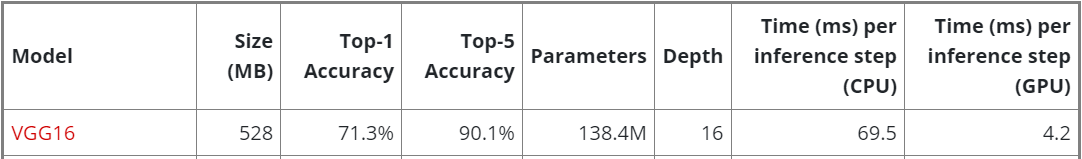

La precisión del top 1 y del top 5 se refiere al rendimiento del modelo en el conjunto de datos de validación de ImageNet.

La profundidad se refiere a la profundidad topológica de la red. Esto incluye capas de activación, capas de normalización por lotes, etc.

El tiempo por paso de inferencia es el promedio de 30 lotes y 10 repeticiones.

La profundidad cuenta el número de capas con parámetros.

## **3. Implementación de los modelos**
---


### **3.1. Data Augmentation**
---

Como inicialmente se tiene un conjunto de datos pequeño, se utiliza la técnica llamada **Data Augmentation** de datos que ayuda a "aumentar" el tamaño del conjunto de entrenamiento. Para esto se usa la clase ImageDataGenerator que proporciona utilidades para cargar, preprocesar y aumentar datos de imágenes en tareas de entrenamiento de modelos de aprendizaje profundo, especialmente modelos de redes neuronales convolucionales (CNN). A continuación el ejemplo de una imagen de cómo se ve el aumento:

In [39]:
from keras.preprocessing.image import ImageDataGenerator
# establecer los parámetros que queremos cambiar aleatoriamente
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

Se crea un folder de ejemplo *preview* para poder visualizar la aumentación de una imagen:

In [40]:
os.mkdir('preview')
x = X_train_crop[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

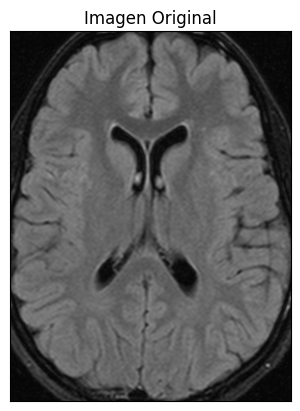

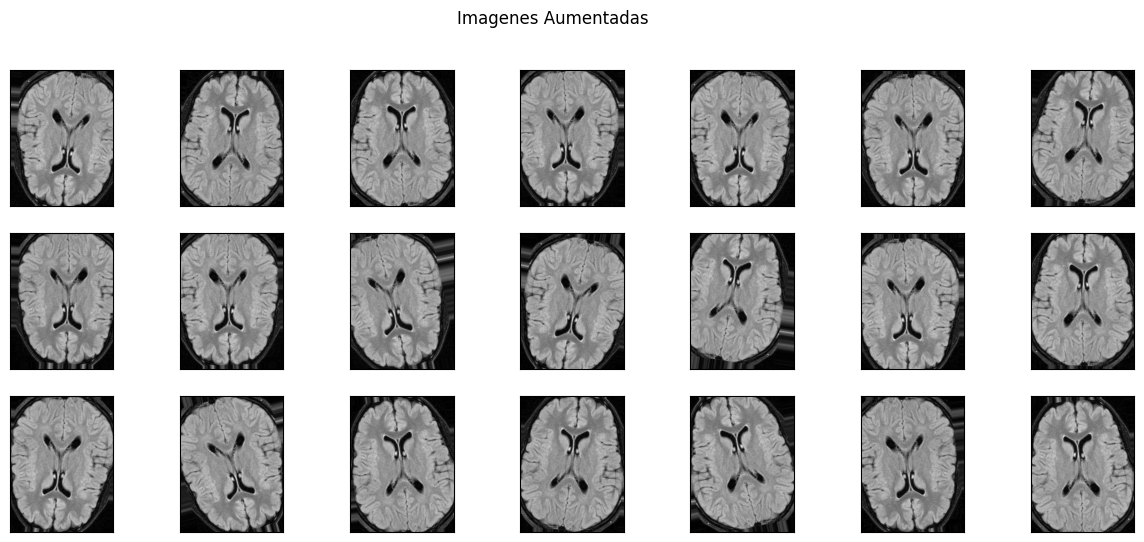

In [41]:
plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Imagen Original')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Imagenes Aumentadas')
plt.show()

In [ ]:
!rm -rf preview/

A continuación se aplica *Data Augmentation* a todos los conjuntos:

In [42]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=img_size,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [43]:
print(train_generator)

### **3.2. Construcción del modelo**
---

Para la construcción del modelo importamos todas las librerias requeridas de tensorflow y keras:

In [58]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
# Seleccionamos una semilla para los RNG
tf.random.set_seed(0)
np.random.seed(0)

Se utilizaran las técnicas de **_Transfer Learning_** y **_Fine Tuning_**, a continuación cada una detalladas.

#### **3.2.1 Transfer Learning**
---


Transfer learning (aprendizaje por transferencia) es una técnica en el campo del aprendizaje automático y la visión por computadora que implica tomar un modelo de aprendizaje profundo preentrenado en un gran conjunto de datos y utilizarlo como punto de partida para una tarea de aprendizaje similar o relacionada. Esta técnica se utiliza comúnmente cuando tenemos datasets pequeños. La idea es utilizar una representación intermedia de una red profunda para obtener una representación de los datos de entrada. Para ello utilizaremos una red VGG16 sin el top (capas densas del final), como se define a continuación:

In [64]:
# Cargamos una red VGG16 sin el top (capas densas del final)
extractor = tf.keras.applications.VGG16(weights='imagenet',
                                    include_top=False,
                                    input_shape=(224, 224, 3))
extractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Luego se congelan las capas que pertenecen al modelo original VGG 16 y  agregamos a el modelo las capas que constituyen el clasificador final, un simple perceptrón multicapa que va a actuar sobre la salida del modelo:

In [65]:
# Congelamos el extractor de características (Transfer Learning)
for layer in extractor.layers:
    layer.trainable=False
# Creamos una capa de pooling para consolidar los feature maps de salida en
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
# Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=500, activation="relu")(pool)
# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.5)(dense1)
# Agregamos una capa de salida
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")(drop1)
# Definimos nuestro modelo de transfer learning
tl_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])
# Compilamos el modelo
tl_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])
tl_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Las últimas cuatro capas del modelo anterior constituyen el clasificador.
La salida de `global_average_pooling2d` constituyen las características extraídas de la imagen que entra al modelo completo. Es decir, el extractor de características transforma cada imagen en un vector de tamaño 512. Este vector entra entonces a un modelo de dos capas densas: una capa oculta de 500 neuronas con _dropout_, y la capa de salida de dos neuronas. Estas capas aportan los 257502 parámetros que se van a entrenar. Note que los parámetros del modelo base no cuentan como parámetros entrenables.

Para el entrenamiento, utilizaremos un _Callback_ para guardar el modelo con menor pérdida en validación; guardaremos los pesos del mejor modelo en un archivo llamado: `transfer_learning.h5`.

> **Nota**:  `transfer_learning.h5` se guardará temporalmente solo mientras el entorno de ejecución está conectado.

In [66]:
# Definimos el callback
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="transfer_learning.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")

In [67]:
# Obtener el número total de muestras en los generadores de datos
train_samples = len(train_generator)-1
val_samples = len(validation_generator)-1

El modelo se entrenara en el siguiente capitulo.

#### **3.2.2 Fine Tuning**
---


El "fine-tuning" o "ajuste fino" es una técnica común en el campo del aprendizaje profundo que implica tomar un modelo preentrenado y realizar un entrenamiento adicional en un conjunto de datos específico o una tarea específica. Esta técnica se utiliza en el contexto del transfer learning para adaptar un modelo preentrenado a una tarea más específica o para afinar sus parámetros para una tarea particular. *Fine Tuning* permite de **aprender mejores parámetros a cambio de un mayor tiempo de entrenamiento**.


Así mismo, se trata de un método que requiere una buena experimentación para poder converger. Para esta técnica se utiliza la misma arquitectura que usamos en Transfer Learning, debido a esto se evita el retrabajo de entrenar denuevo el modelo para el calentamiento, ya que con ayuda del transfer learning se guardo en el archivo "transfer_learning.h5" los pesos de calentamiento inicial del modelo, con lo cual cargamos los pesos obtenidos durante el calentamiento y bajamos la tasa de aprendizaje a $10^{-4}$, ya que solo queremos hacer ajustes muy ligeros a los pesos del modelo.

In [74]:
# Congelamos el extractor de características (Transfer Learning)
for layer in extractor.layers:
    layer.trainable=False
# Creamos una capa de pooling para consolidar los feature maps de salida en
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
# Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=500, activation="relu")(pool)
# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.5)(dense1)
# Agregamos una capa de salida
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")(drop1)
# Definimos nuestro modelo de transfer learning
ft_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])
# Compilamos el modelo
ft_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                 metrics=["accuracy"])
ft_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [75]:
# Hacemos entrenables todas las capas
for layer in ft_model.layers:
    layer.trainable = True

# Disminuímos el learning rate
ft_model.compile(loss="binary_crossentropy",
                 optimizer=tf.optimizers.Adam(learning_rate=1e-4),
                 metrics=["accuracy"])

# Cargamos los pesos del calentamiento
ft_model.load_weights("transfer_learning.h5")

# Definimos el callback
best_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath="fine_tuning.h5",
                                                   monitor="val_loss",
                                                   verbose=True,
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="min")

El modelo se entrenara en el siguiente capitulo.

# **Entrenamiento y Validación**
---


## **1. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Despues de la construcción de ambos modelos realizada en el capitulo *3.2. Construcción del modelo* se procede a realizar el entrenamiento de ambos modelos:

### **1.1. Transfer Learning**
---


Se entrena el modelo con la técnica de transfer learning:

In [68]:
# Entrenamos el modelo
hist_tl = tl_model.fit(x=train_generator,
                       validation_data=validation_generator,
                       epochs=50,
                       steps_per_epoch=train_samples,
                       validation_steps=val_samples,
                       callbacks=[best_callback])

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 2.8600 - accuracy: 0.5901
Epoch 1: val_loss improved from inf to 1.51139, saving model to transfer_learning.h5
6/6 [==============================] - 5s 645ms/step - loss: 2.8600 - accuracy: 0.5901 - val_loss: 1.5114 - val_accuracy: 0.6875
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 1.8692 - accuracy: 0.6025
Epoch 2: val_loss improved from 1.51139 to 0.96847, saving model to transfer_learning.h5
6/6 [==============================] - 3s 434ms/step - loss: 1.8692 - accuracy: 0.6025 - val_loss: 0.9685 - val_accuracy: 0.7292
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 0.9467 - accuracy: 0.7764
Epoch 3: val_loss improved from 0.96847 to 0.44543, saving model to transfer_learning.h5
6/6 [==============================] - 3s 420ms/step - loss: 0.9467 - accuracy: 0.7764 - val_loss: 0.4454 - val_accuracy: 0.7708
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 1.1949 -

Se observa que llego a el mejor accuracy de 95% con una perdida de 14%, lo cual indica que es un modelo con buen desempeño, a continuación se validara la técnica *Fine Tuning*.

### **1.2. Fine Tuning**
---

Se entrena el modelo con la técnica de fine tuning:

In [76]:
# Entrenamos
hist_ft = ft_model.fit(x=train_generator,
                       validation_data=validation_generator,
                       epochs=50,
                       steps_per_epoch=train_samples,
                       validation_steps=val_samples,
                       callbacks=[best_callback2])

Epoch 1/50
5/6 [========================>.....] - ETA: 0s - loss: 1.0208 - accuracy: 0.6313
Epoch 1: val_loss improved from inf to 0.64924, saving model to fine_tuning.h5
6/6 [==============================] - 8s 580ms/step - loss: 1.0193 - accuracy: 0.6273 - val_loss: 0.6492 - val_accuracy: 0.6250
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.6025
Epoch 2: val_loss improved from 0.64924 to 0.64228, saving model to fine_tuning.h5
6/6 [==============================] - 3s 470ms/step - loss: 0.7478 - accuracy: 0.6025 - val_loss: 0.6423 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.5963
Epoch 3: val_loss did not improve from 0.64228
6/6 [==============================] - 4s 749ms/step - loss: 0.6759 - accuracy: 0.5963 - val_loss: 0.6497 - val_accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.6250
Epoch 4: val_loss did not improve fr

Se observa que llego a el mejor accuracy de 66% con una perdida de 64%, lo cual indica que es un modelo con menor desempeño usando la técnica Fine Tuning a comparación del modelo inicial usando la técnica Transfer Learning.

Al final se observa en la estructura de carpetas que quedaron guardados ambos archivos con pesos de los mejores modelos para ambas técnicas:

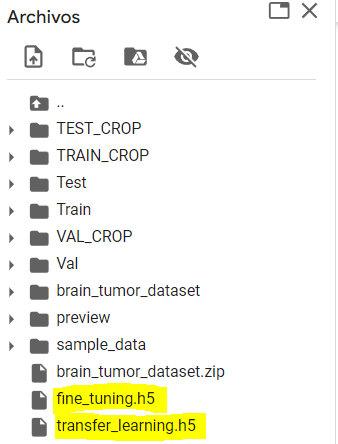

## **2. Evaluación o Aplicación del modelo**
---


A continuación se valida el desempeño de ambos modelos comparando las metricas de accuracy y loss en los conjuntos de entrenamiento y validación, adicional se define la siguiente función para graficar la matriz de confusión:

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz Confusion',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
     La normalización se puede aplicar configurando `normalize=True.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.show()

### **2.1. Transfer Learning**
---

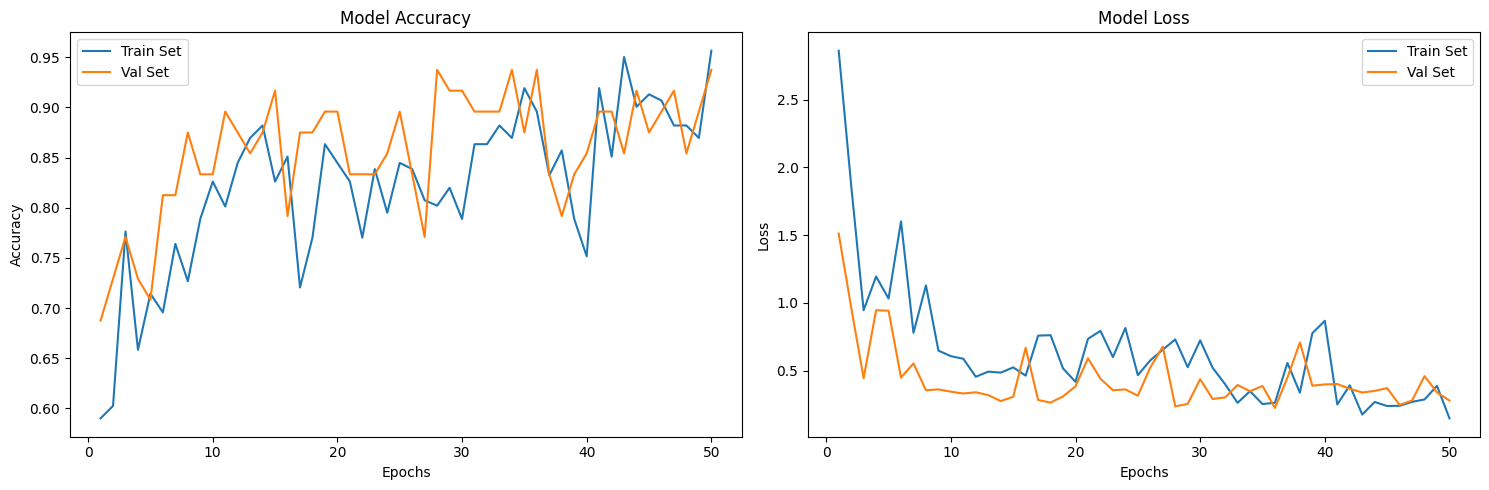

In [70]:
# Grafica del desempeño del modelo
acc = hist_tl.history['accuracy']
val_acc = hist_tl.history['val_accuracy']
loss = hist_tl.history['loss']
val_loss = hist_tl.history['val_loss']
epochs_range = range(1, len(hist_tl.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

A continuación se generan algunas predicciones para observar en una matriz de confusión el accuracy:

2/2 [==============================] - 0s 40ms/step
Val Accuracy = 0.94


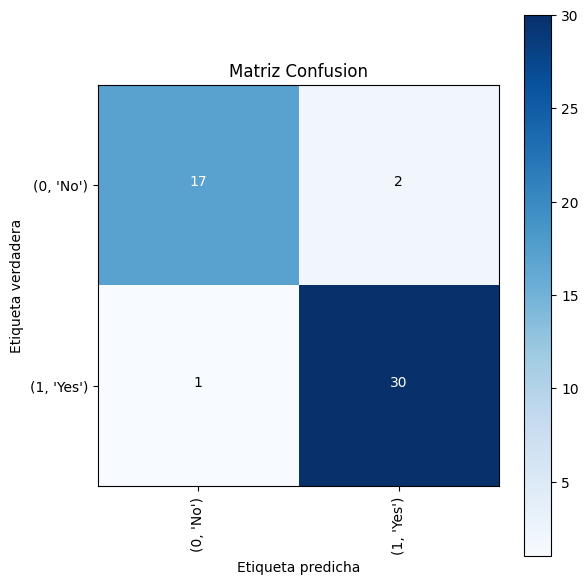

In [71]:
# Validación en el conjunto val
predictions = tl_model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

1/1 [==============================] - 0s 21ms/step
Test Accuracy = 0.70


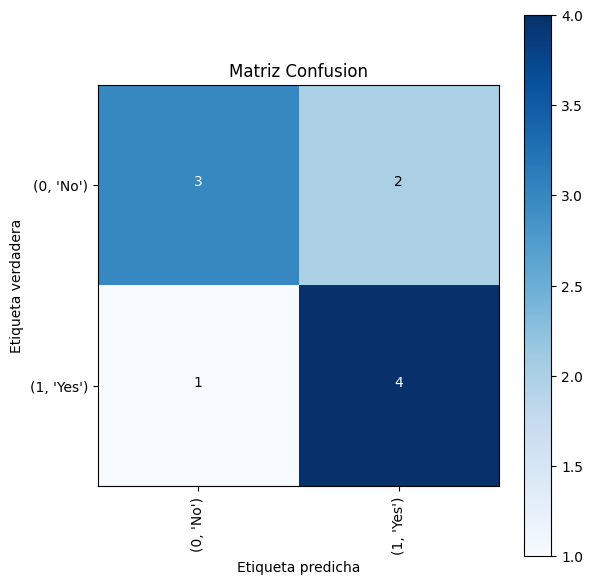

In [72]:
# Validación en el conjunto test
predictions = tl_model.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

Se observa que este modelo tiene un buen desempeño en la clasificación de imagenes de tumores cerebrales.

Ahora se revisan las imágenes del conjunto de prueba que fueron mal clasificadas:

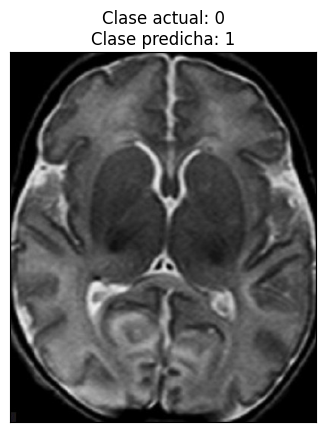

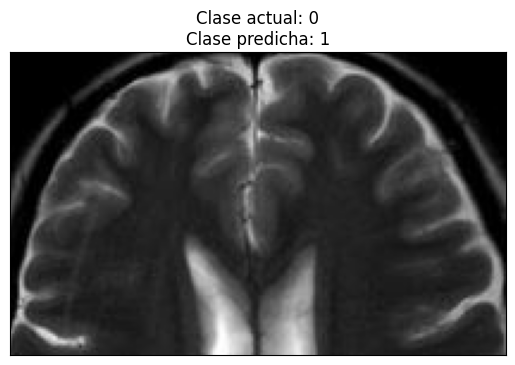

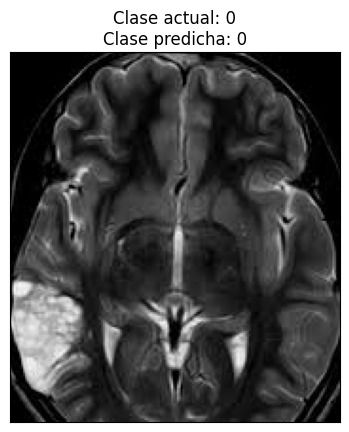

In [73]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('No hay imágenes mal clasificadas.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Clase actual: {y_val[i]}\nClase predicha: {predictions[i]}')
        plt.show()

### **2.2. Fine Tuning**
---

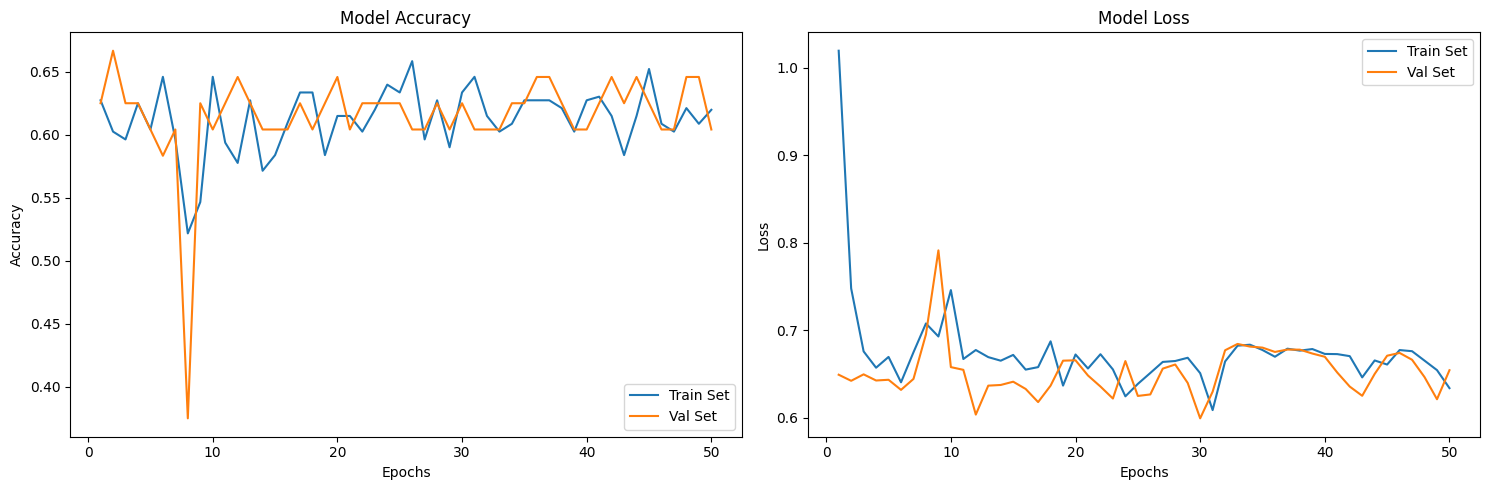

In [77]:
# Grafica del desempeño del modelo
acc = hist_ft.history['accuracy']
val_acc = hist_ft.history['val_accuracy']
loss = hist_ft.history['loss']
val_loss = hist_ft.history['val_loss']
epochs_range = range(1, len(hist_ft.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

A continuación se generan algunas predicciones para observar en una matriz de confusión el accuracy:

2/2 [==============================] - 0s 40ms/step
Val Accuracy = 0.62


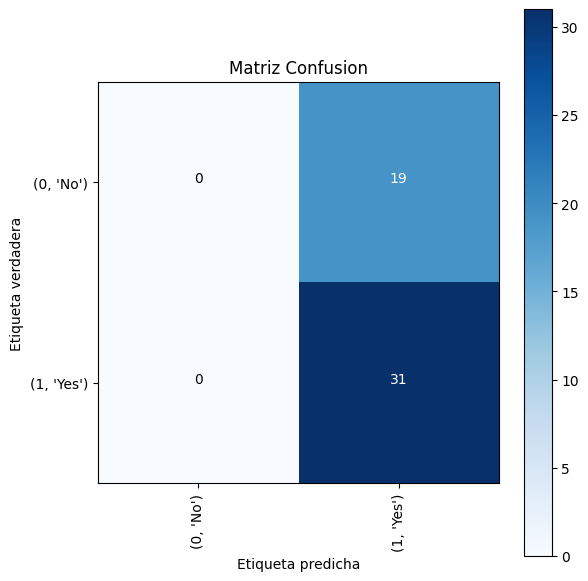

In [78]:
# Validación en el conjunto val
predictions = ft_model.predict(X_val_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_val, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

1/1 [==============================] - 0s 22ms/step
Test Accuracy = 0.50


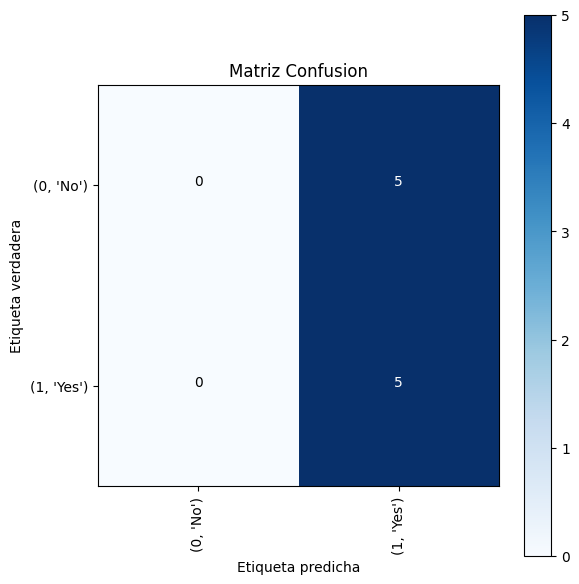

In [79]:
# Validación en el conjunto test
predictions = ft_model.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

Como se observa este modelo clasifica todas las etiquetas de imagenes con Yes correctamente sin mebargo las otras etiquetas No las clasifica mal.

Ahora se revisan las imágenes del conjunto de prueba que fueron mal clasificadas:

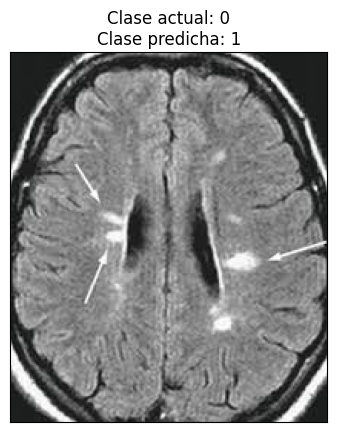

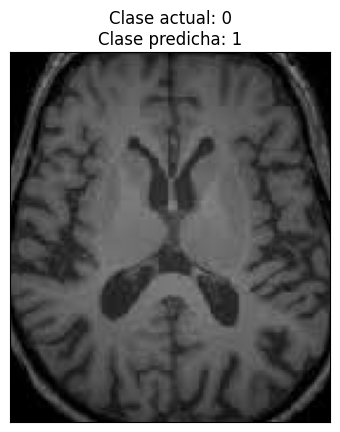

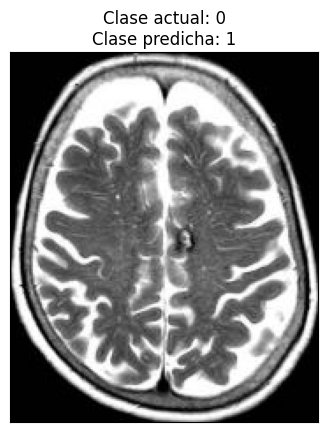

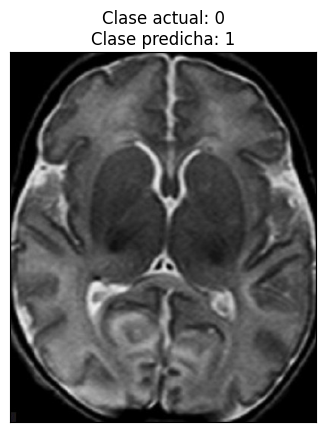

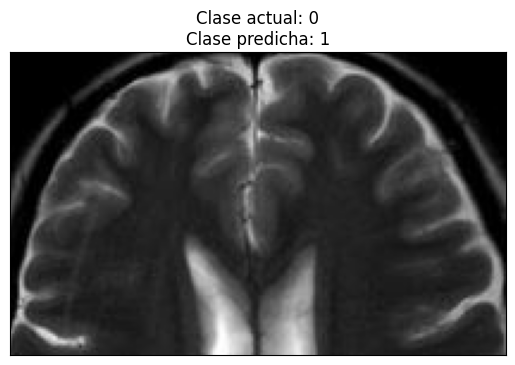

In [80]:
ind_list = np.argwhere((y_test == predictions) == False)[:, -1]
if ind_list.size == 0:
    print('No hay imágenes mal clasificadas.')
else:
    for i in ind_list:
        plt.figure()
        plt.imshow(X_test_crop[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Clase actual: {y_val[i]}\nClase predicha: {predictions[i]}')
        plt.show()

Por ultimo se guarda el mejor modelo:

In [81]:
# Limpiar el espacio
!rm -rf TRAIN TEST VAL TRAIN_CROP TEST_CROP VAL_CROP
# Guardar el modelo
tl_model.save('2023-10-24_VGG_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


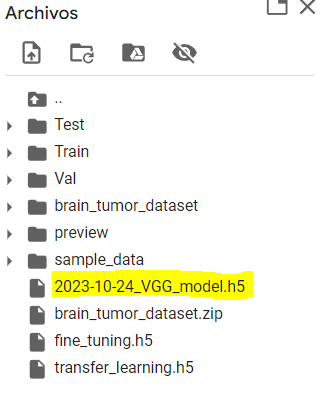

En conclusión este proyecto fue una combinación de un problema de clasificación del modelo CNN (para predecir si el sujeto tiene un tumor cerebral o no) y un problema de visión por computadora (para automatizar el proceso de recorte del cerebro a partir de exploraciones por resonancia magnética). La precisión final es mucho mayor que el valor inicial del 50 % (conjetura aleatoria). Sin embargo, podría aumentarse mediante un mayor número de imágenes en entrenamiento o mediante el ajuste de hiperparámetros del modelo.

## **Créditos**

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*